In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-traffic-time-series-forecasting/sample_submission_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/sample_submission_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip


> Task summary -

To forecast future web traffic as time series for approximately 145,000 wikipedia articles.

> Concepts

- Univariate models are statistical analysis approaches that involve the analysis of a single dependent variable. Only one variable varies over time. For ex- Sensor measuring temperature of a room per second.

- Multi variate analysis examines two or more dependent variables and multiple independent variables. Multiple variables are varying over time

- Time series is a data that occurs chronologically one after the other.
- Time series forecasting is using the data of the past to detect the future.
- Forecasting values in dynamic system(i.e source of values is dynamic) is hard.
- Every being, global event, their lives are dynamic system for the web traffic. For example - Whenever a semester starts in a university then that corresponding major's wikipedia may be getting a hit to know more about it.

- We usually tend to remove anomaly from time series dataset i.e abnormal behaviour.

> Steps

1. Data cleaning.
2. Visualisation.
3. Remove anomalies.
4. Apply ARMA Model.
5. Apply ARIMA Model.
6. Apply Exponential Smoothing Model.
7. Apply Prophet approach(fbprophet, future)
8. Apply Auto Arima.
9. Apply DL Model(LSTM).
10. Apply DL model(CNN1D).

In [ ]:
!pip install statsmodels


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/10.2 MB 8.5 MB/s eta 0:00:02

     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/10.2 MB 30.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 7.0/10.2 MB 66.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 78.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 78.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 19.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn

import seaborn as sns
import scipy
from datetime import timedelta
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#from fbprophet import Prophet
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow import keras

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import r2_score
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/293.3 KB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.9 MB 9.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.9/1.9 MB 28.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/11.1 MB 119.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 8.5/11.1 MB 122.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 11.0/11.1 MB 127.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 69.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.6 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 1.8/3.6 MB 53.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/302.0 KB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 KB 25.0 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


D0726 01:00:48.184698399      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0726 01:00:48.184726166      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0726 01:00:48.184730215      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0726 01:00:48.184733934      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0726 01:00:48.184737120      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0726 01:00:48.184740453      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0726 01:00:48.184743660      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0726 01:00:48.

In [ ]:
!unzip /kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip


Archive:  /kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip
  inflating: train_1.csv             

In [ ]:
!ls

__notebook__.ipynb  train_1.csv


In [ ]:
data_path = "train_1.csv"


In [ ]:
df = pd.read_csv(data_path)
df.head()
# these are page views per days spread across various columns

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## 1. Data Cleaning

In [ ]:
# Fill missing values
df = df.fillna(0)

In [ ]:
# sept to dec data
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [ ]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


## 2. Data Visualization

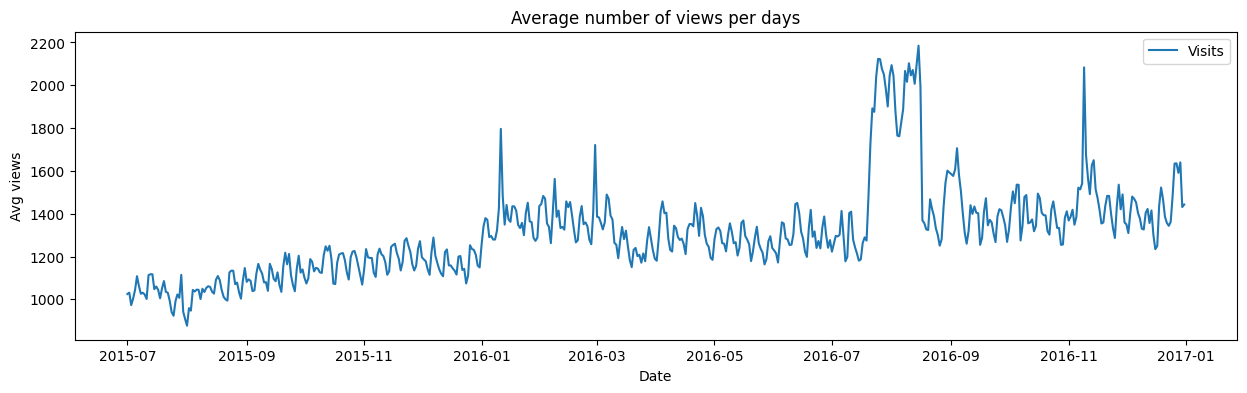

In [ ]:
#visualising
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Avg views')
plt.title('Average number of views per days')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

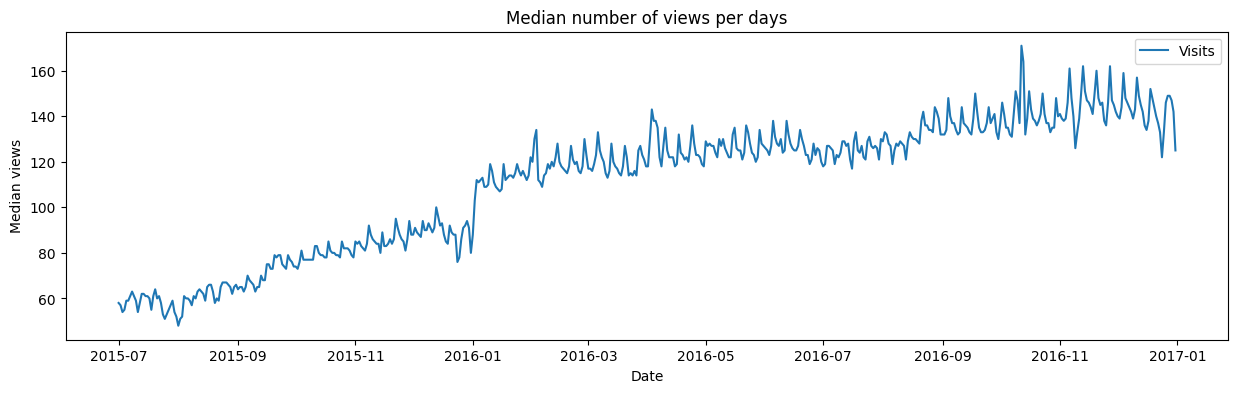

In [ ]:
#visualising
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Median views')
plt.title('Median number of views per days')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [ ]:
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


In [ ]:
train_data['year']=train_data.Date.dt.year
train_data['month']=train_data.Date.dt.month
train_data['day']=train_data.Date.dt.day

In [ ]:
#plotting web traffic over days of month using heatmap
# data is of 9th month to 12th
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace=True)
train_data['month'].replace('10','10 - October',inplace=True)
train_data['month'].replace('11','11 - November',inplace=True)
train_data['month'].replace('12','12 - December',inplace=True)

In [ ]:
train_data


,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7
...,...,...,...,...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,2016,12,31,12
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0,2016,12,31,12
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0,2016,12,31,12
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0,2016,12,31,12


In [ ]:
train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())


In [ ]:
train_data['weekday#'] = train_data['weekday']
train_data['weekday'].replace(0,'01 - Monday',inplace=True)
train_data['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_data['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_data['weekday'].replace(3,'04 - Thursday',inplace=True)
train_data['weekday'].replace(4,'05 - Friday',inplace=True)
train_data['weekday'].replace(5,'06 - Saturday',inplace=True)
train_data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [ ]:
train_data


,Page,Date,Visits,year,month,day,month_num,weekday,weekday#
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7,03 - Wednesday,2
...,...,...,...,...,...,...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,2016,12,31,12,06 - Saturday,5
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5


In [ ]:
train_group = train_data.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group

,month,weekday,Visits
0,1,01 - Monday,1513.386099
1,1,02 - Tuesday,1387.743387
2,1,03 - Wednesday,1338.449062
3,1,04 - Thursday,1335.111541
4,1,05 - Friday,1307.738341
...,...,...,...
79,12,03 - Wednesday,1290.200544
80,12,04 - Thursday,1271.235403
81,12,05 - Friday,1239.405814
82,12,06 - Saturday,1263.923195


In [ ]:
train_group = train_group.pivot(index='weekday',columns='month',values='Visits')
train_group.sort_index(inplace=True)

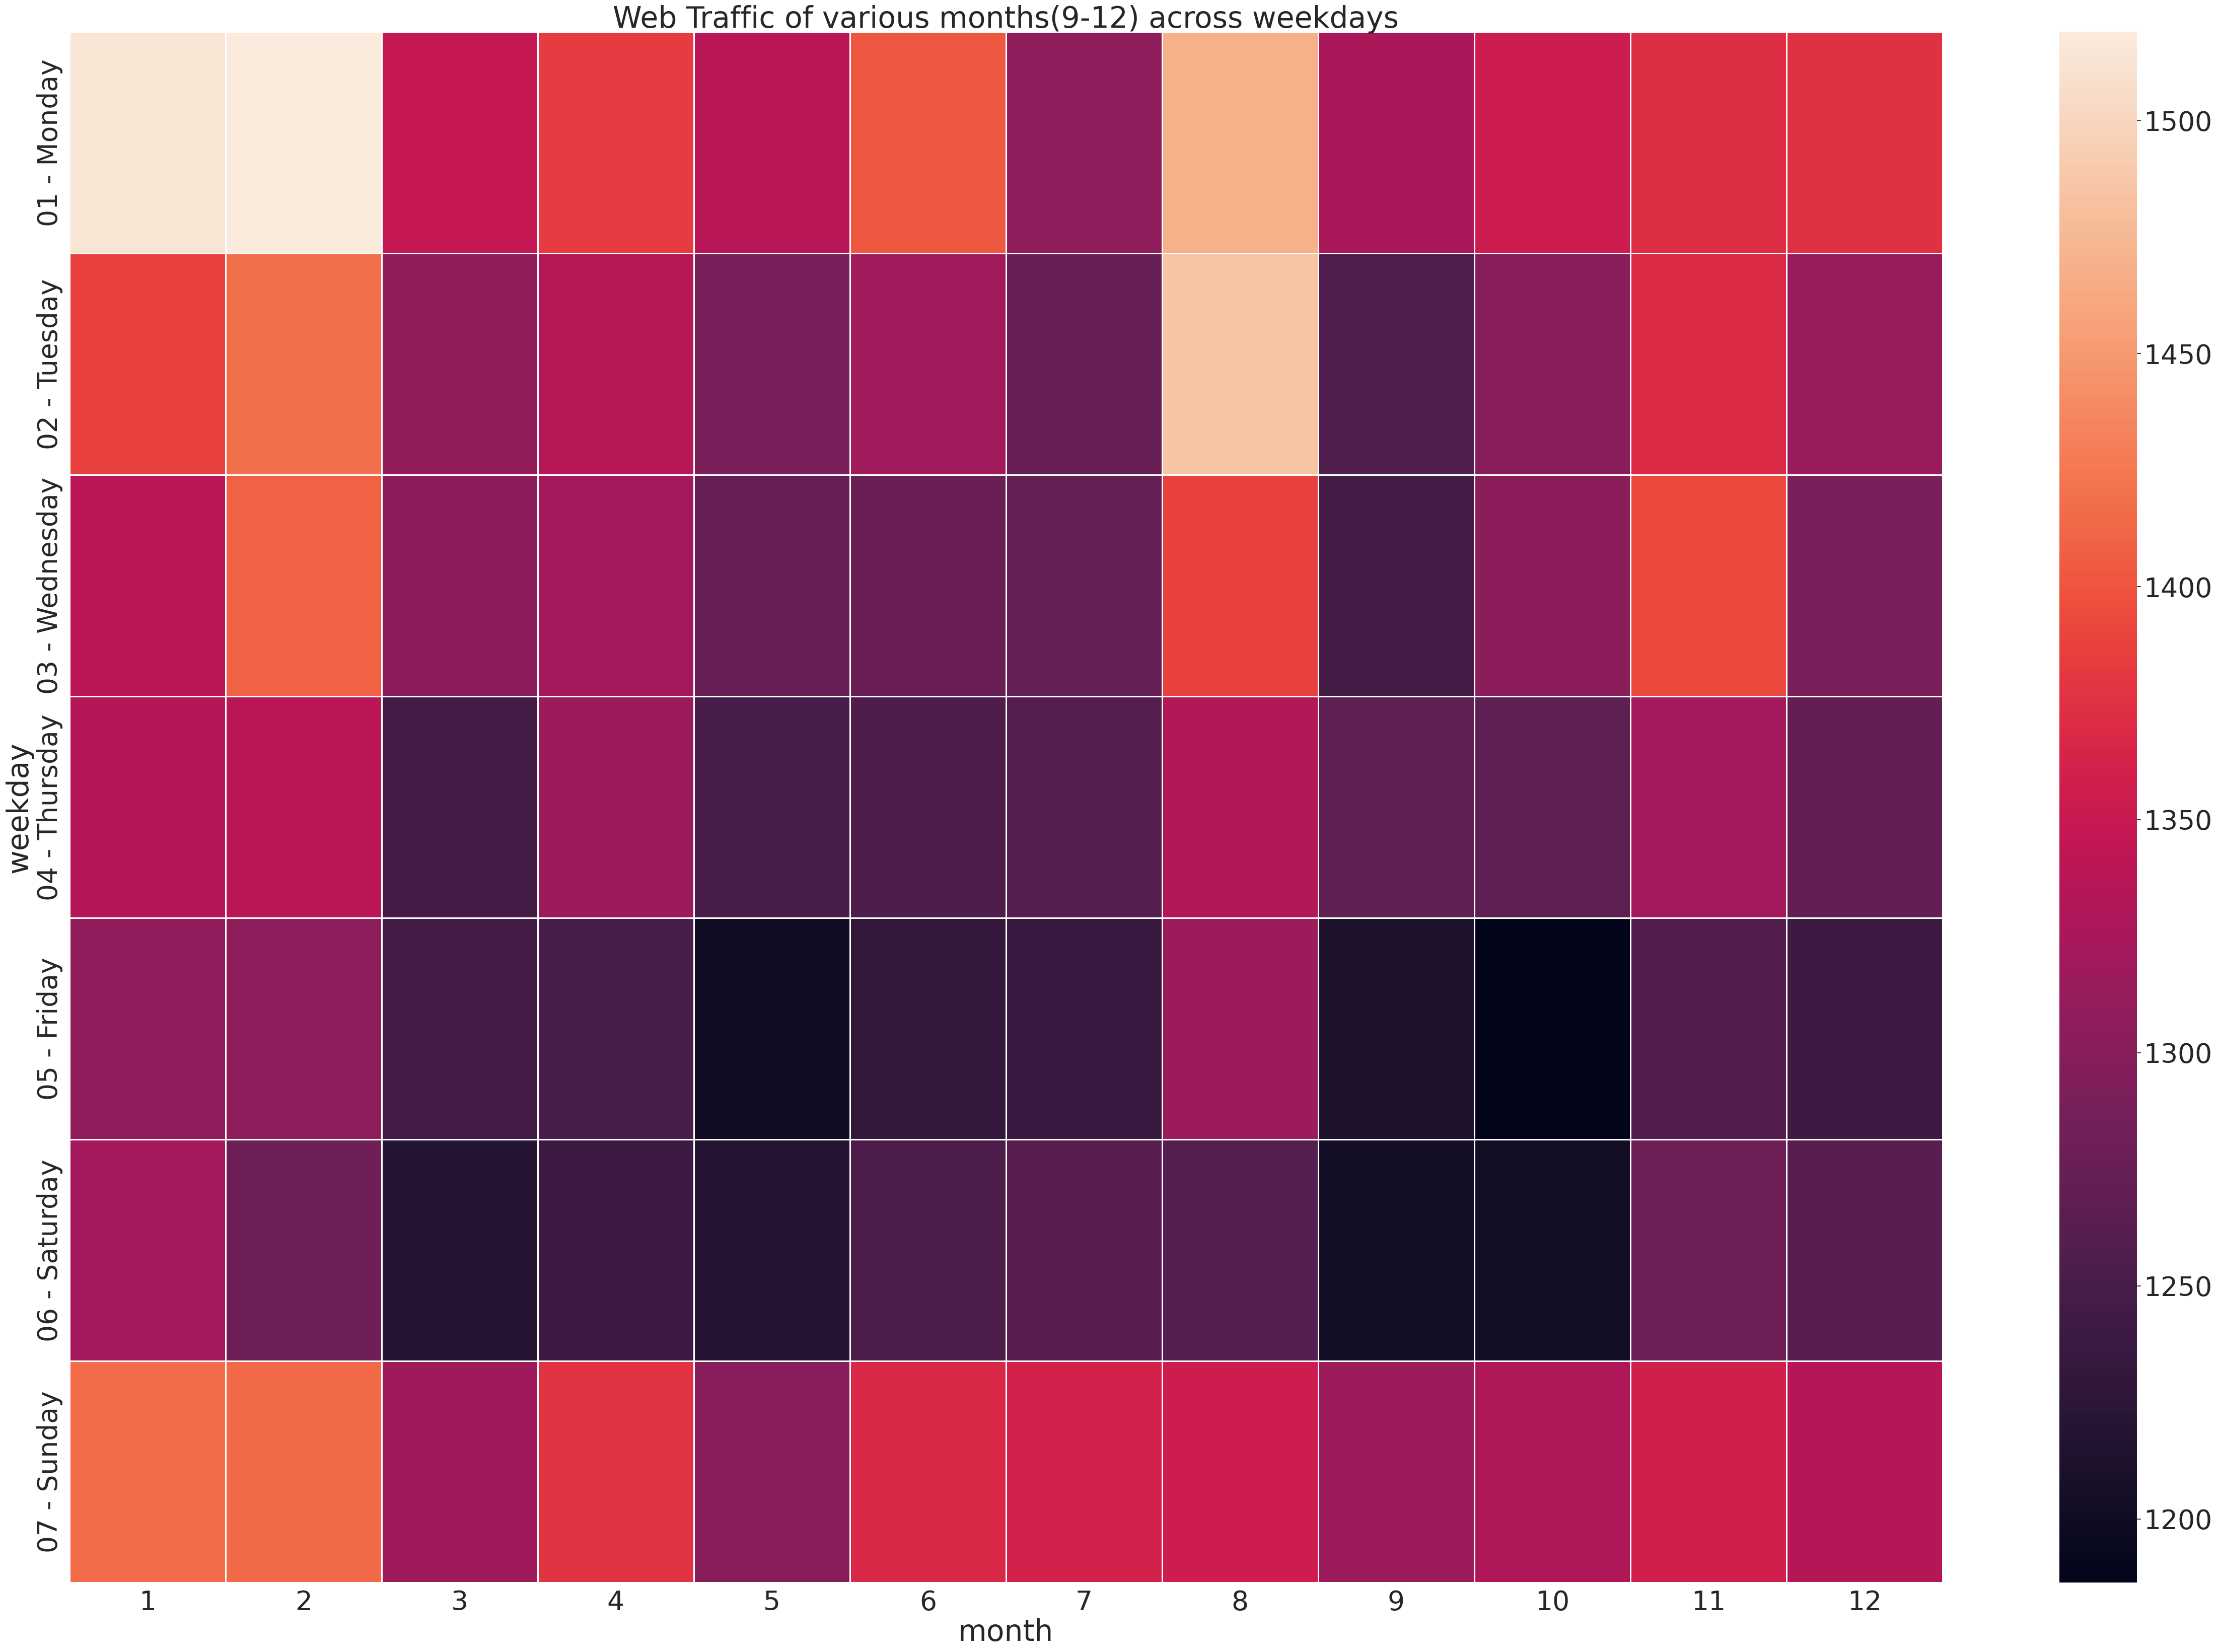

In [ ]:
sns.set(font_scale=3.5)
f, ax = plt.subplots(figsize=(60, 40))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.show()

We can see that the traffic is maximum on fridays and saturdays on most of the months during the span of Sept to Dec.



In [ ]:
cols_to_drop = ['year','month','day','month_num','weekday','weekday','weekday#']
train_data.drop(cols_to_drop,axis=1,inplace=True)
train_data


,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


In [ ]:
# top 5 pages with maximum number of views
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(5,'Visits')['Page'].tolist()

In [ ]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]
top5_pages_df

,Page,Date,Visits
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0
...,...,...,...
79649361,Main_Page_en.wikipedia.org_desktop_all-agents,2016-12-31,19591761.0
79678160,Main_Page_en.wikipedia.org_all-access_all-agents,2016-12-31,26149541.0
79678767,Special:Search_en.wikipedia.org_all-access_all...,2016-12-31,1576945.0
79713701,Main_Page_en.wikipedia.org_mobile-web_all-agents,2016-12-31,3939419.0


In [ ]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else:
        return 'none'

In [ ]:
temp1 = train_data
temp1['Wikipedia_page'] = temp1.Page.apply(detect_language)

In [ ]:
def lang_code(code):
    if code == 'zh':
        return 'Chinese'
    elif code == 'fr':
        return 'French'
    elif code == 'en':
        return 'English'
    elif code == 'ru':
        return 'Russian'
    elif code == 'de':
        return 'German'
    elif code == 'ja':
        return 'Japanese'
    elif code == 'es':
        return 'Spanish'
    else:
        return 'None'

In [ ]:
temp1['Page_language'] = temp1.Wikipedia_page.apply(lang_code)


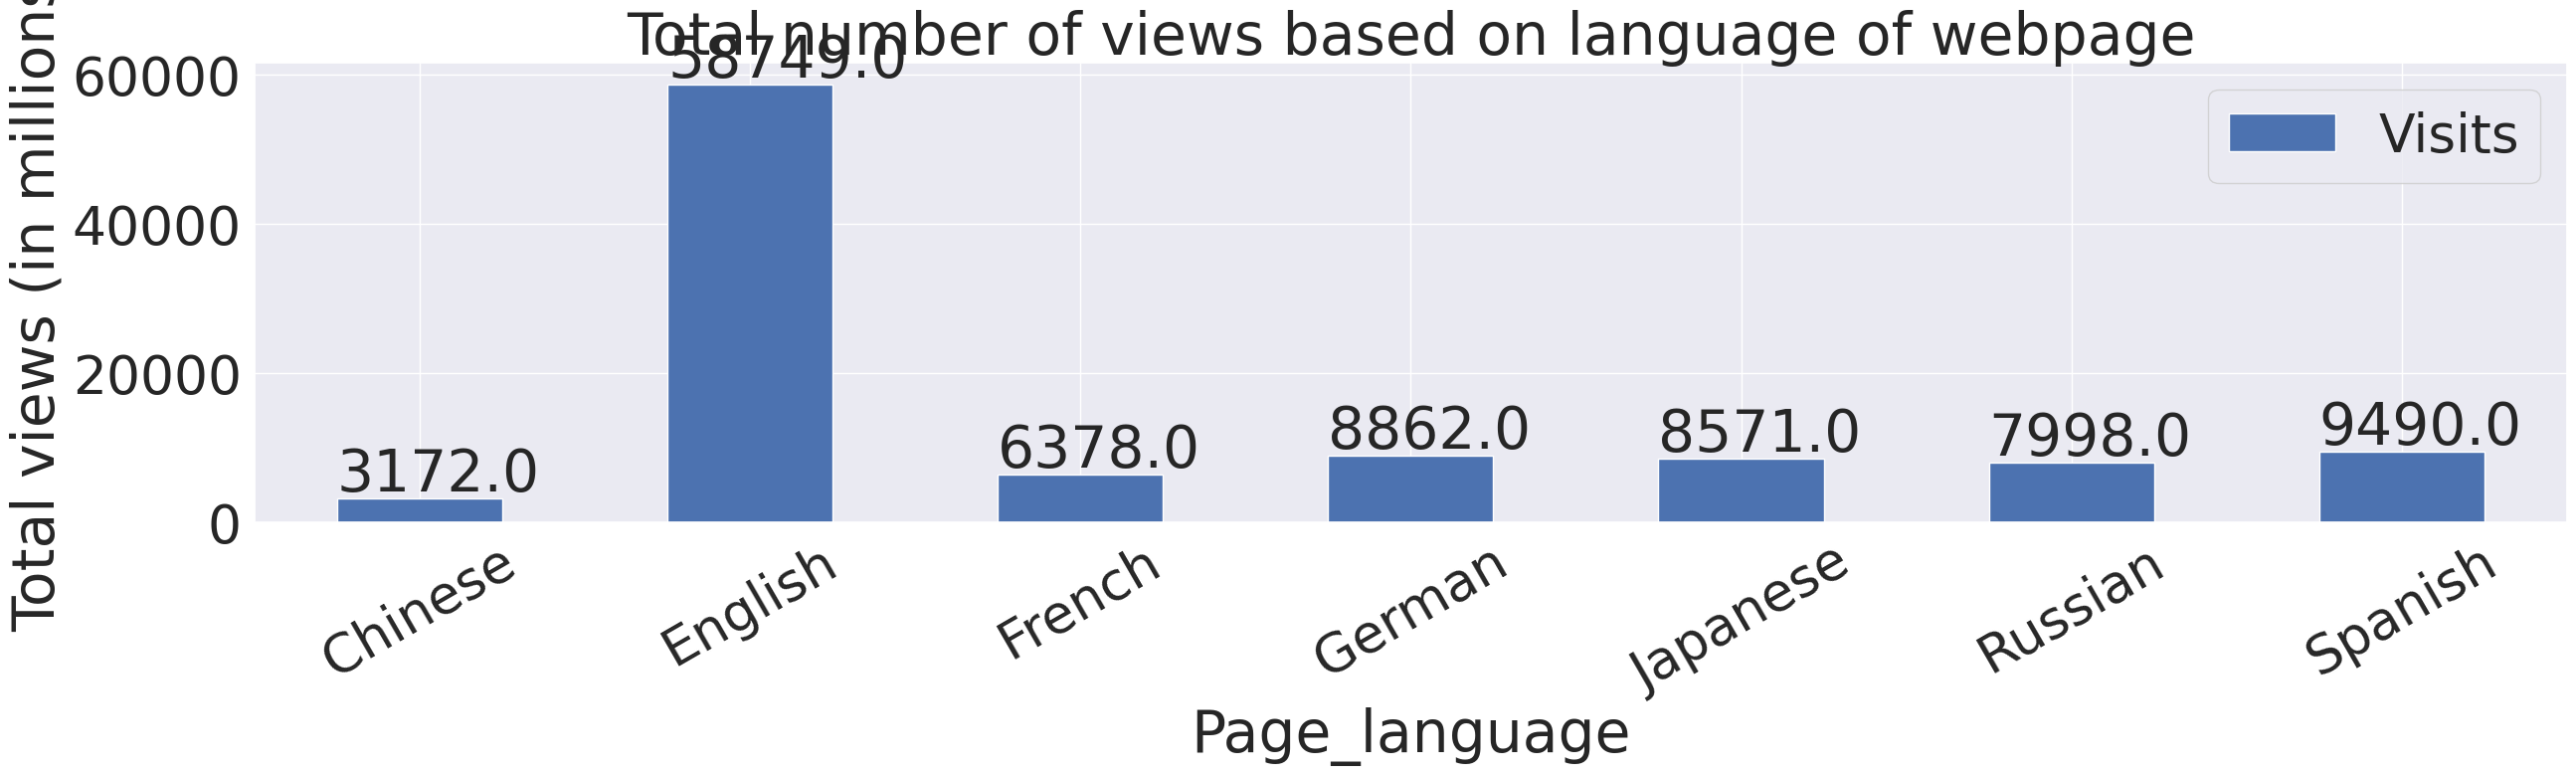

In [ ]:
# Total number of views based on language of Wikipedia webpage
fig,ax = plt.subplots(figsize=(30,6))
lang_df = temp1.groupby('Page_language')['Visits'].sum().reset_index()
lang_df = lang_df[lang_df['Page_language']!='None']
lang_df['Visits'] = round(lang_df['Visits']/1000000,0)

bar_graph = lang_df.plot.bar(x='Page_language',y='Visits',rot=30,ax=ax)
bar_graph.set_ylabel('Total views (in millions)')
bar_graph.set_title('Total number of views based on language of webpage')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+1000))
ax.legend()
plt.show()

In [ ]:
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(5,'Visits')['Page'].tolist()
print(top_pages_list)

['Main_Page_en.wikipedia.org_all-access_all-agents', 'Main_Page_en.wikipedia.org_desktop_all-agents', 'Main_Page_en.wikipedia.org_mobile-web_all-agents', 'Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents', 'Special:Search_en.wikipedia.org_all-access_all-agents']


In [ ]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]


In [ ]:
top5_pages_df


,Page,Date,Visits,Wikipedia_page,Page_language
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,en,English
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,en,English
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,en,English
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0,en,English
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0,de,German
...,...,...,...,...,...
79649361,Main_Page_en.wikipedia.org_desktop_all-agents,2016-12-31,19591761.0,en,English
79678160,Main_Page_en.wikipedia.org_all-access_all-agents,2016-12-31,26149541.0,en,English
79678767,Special:Search_en.wikipedia.org_all-access_all...,2016-12-31,1576945.0,en,English
79713701,Main_Page_en.wikipedia.org_mobile-web_all-agents,2016-12-31,3939419.0,en,English


In [ ]:
# Time-series of page with maximum views
top_page_df = train_data[train_data.Page == top_pages_list[0]]
#top_page_df = top_page_df['Visits']
top_page_df['Visits'] = top_page_df['Visits'].div(1000000).round(2)
top_page_df.drop(['Page','Wikipedia_page','Page_language'],axis=1,inplace=True)
top_page_df.head()

/tmp/ipykernel_14/2886216711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_page_df['Visits'] = top_page_df['Visits'].div(1000000).round(2)
/tmp/ipykernel_14/2886216711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_page_df.drop(['Page','Wikipedia_page','Page_language'],axis=1,inplace=True)


,Date,Visits
38573,2015-07-01,20.38
183636,2015-07-02,20.75
328699,2015-07-03,19.57
473762,2015-07-04,20.44
618825,2015-07-05,20.77


In [ ]:
top_page_df.reset_index(inplace=True)


In [ ]:
top_page_df.head()


,index,Date,Visits
0,38573,2015-07-01,20.38
1,183636,2015-07-02,20.75
2,328699,2015-07-03,19.57
3,473762,2015-07-04,20.44
4,618825,2015-07-05,20.77


In [ ]:
top_page_df.drop('index',axis=1,inplace=True)


/tmp/ipykernel_14/2429970149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_page_df.drop('index',axis=1,inplace=True)


In [ ]:
top_page_df = top_page_df.set_index('Date')
top_page_df.head()

,Visits
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


<Axes: xlabel='Date'>

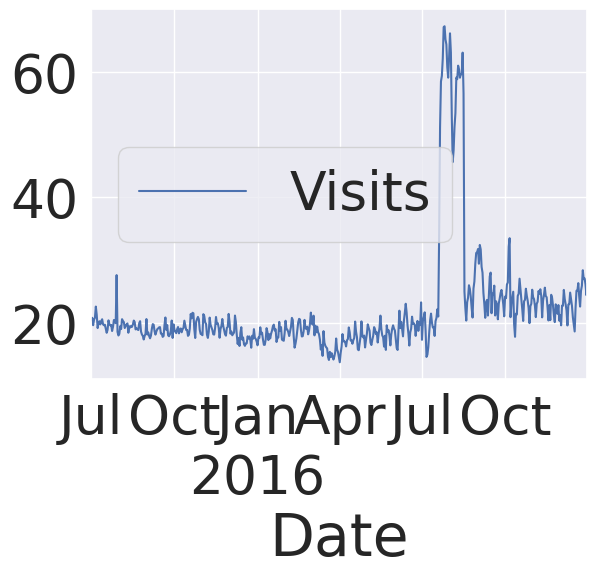

In [ ]:
top_page_df.plot()


## 3. Anomaly Detection
Using isolation forest since as seen in the figure above, There are anomalies in the data. Using data with anomalies for forecasting will affect the accuracy of the model. Hence anomalies are removed using Isolation forest.

In [ ]:
isolation_forest_model = IsolationForest(contamination=0.05)
isolation_forest_model.fit(top_page_df)
top_page_df['anomaly'] = isolation_forest_model.predict(top_page_df)

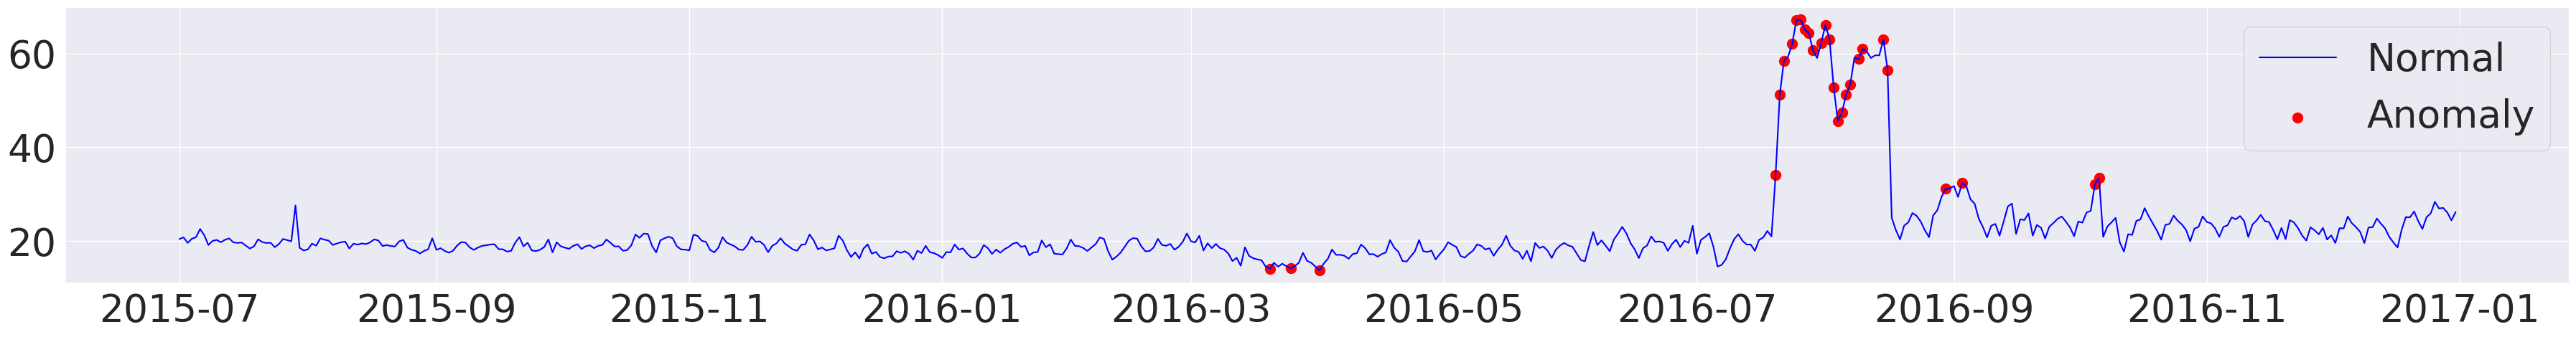

In [ ]:
fig, ax = plt.subplots(figsize=(45,5))
anomaly_df = top_page_df.loc[top_page_df['anomaly'] == -1].copy()
ax.plot(top_page_df.index,top_page_df['Visits'],color='blue', label = 'Normal')
plt.scatter(anomaly_df.index,anomaly_df['Visits'],color='red',s=100,label = 'Anomaly')
plt.legend()
plt.show()

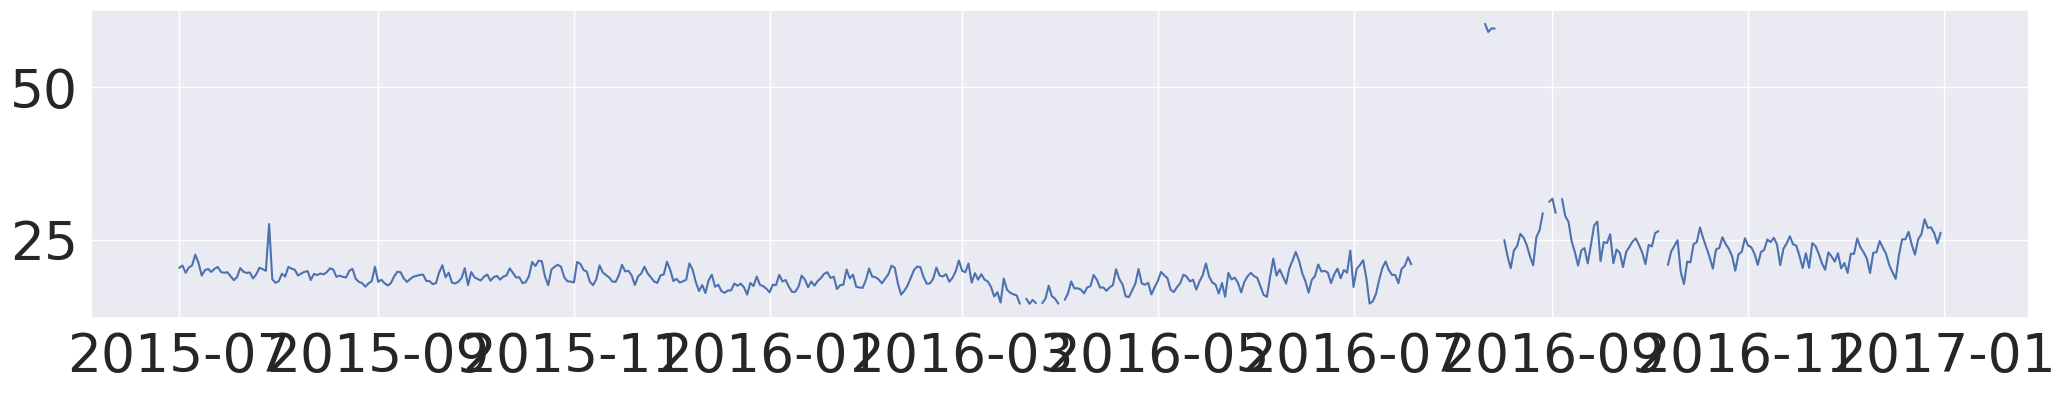

In [ ]:
# Removing anomalies from the data
top_page_df['new_visits'] = top_page_df.apply(lambda row: row.Visits if row.anomaly == 1 else None, axis='columns')
plt.figure(figsize=(25,4))
plt.plot(top_page_df.index,top_page_df.new_visits)

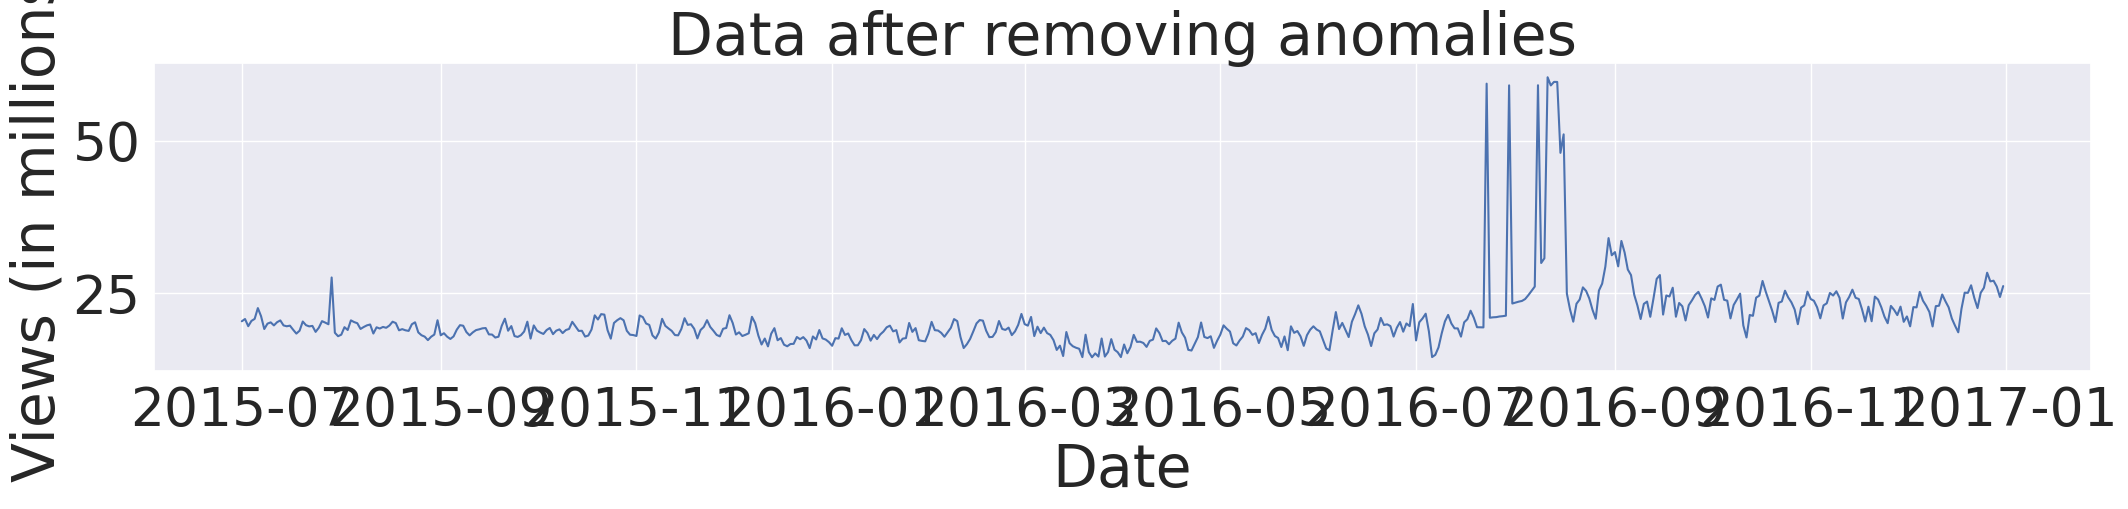

In [ ]:
# Filling missing data with rolling mean
top_page_df = top_page_df.assign(rolling_mean=top_page_df.new_visits.fillna(top_page_df.new_visits.rolling(30,min_periods=1).mean()))

plt.figure(figsize=(25,4))
plt.plot(top_page_df.index,top_page_df.rolling_mean)
plt.title('Data after removing anomalies')
plt.xlabel('Date')
plt.ylabel('Views (in millions)')
plt.show()

In [ ]:
top_page_df = top_page_df.drop(columns=['Visits','anomaly','new_visits']).rename(columns={'rolling_mean':'Views'})


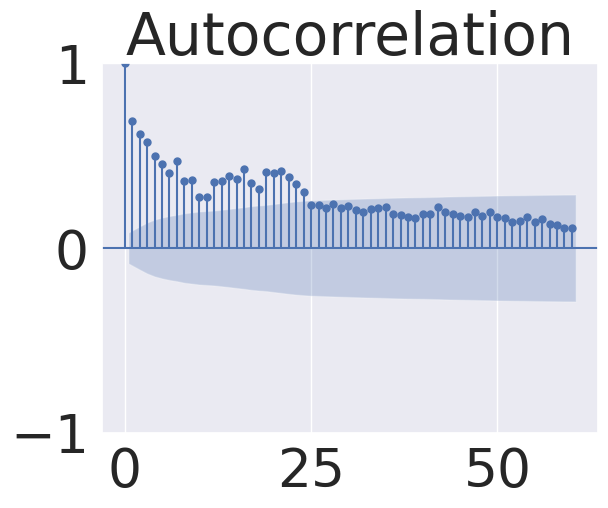

In [ ]:
fig = tsaplots.plot_acf(top_page_df['Views'], lags=60)
plt.show()

## Augmented Dicky Fuller Test
First element of output is the test statistic. Test statistic shows how likely the data is stationary
Second element indicates the p-value. If p-value is >0.05, reject null hypothesis or else not, The null hypothesis is that data is not stationary.

In [ ]:
test = adfuller(top_page_df['Views'])
print(test)

(-2.015126348027104, 0.27998035887935424, 18, 531, {'1%': -3.4427251295084678, '5%': -2.8669984098683736, '10%': -2.5696771375119254}, 2872.629462063125)


The data is not stationary as per the values.



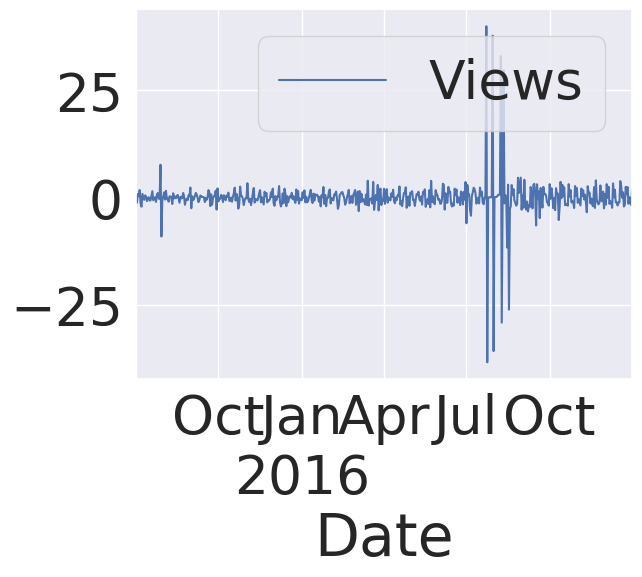

In [ ]:
# Differencing the data to make it stationary
top_page_stationary_df = top_page_df.diff().dropna()
ax = top_page_stationary_df.plot()

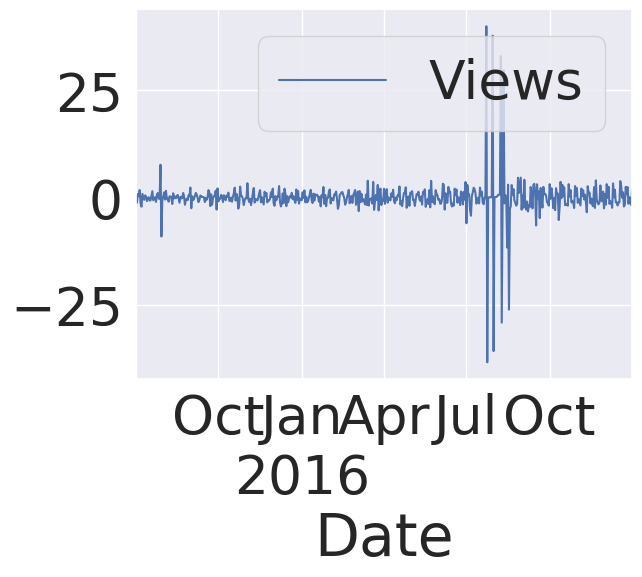

In [ ]:
# Differencing the data to make it stationary
top_page_stationary_df = top_page_df.diff().dropna()
ax = top_page_stationary_df.plot()

In [ ]:
# Augmented dicky-fuller test on stationary data
test2 = adfuller(top_page_stationary_df['Views'])
print(test2)

(-9.14130067099049, 2.844563409967588e-15, 17, 531, {'1%': -3.4427251295084678, '5%': -2.8669984098683736, '10%': -2.5696771375119254}, 2870.4609696757852)


Data is stationary



In [ ]:
top_page_df


,Views
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77
...,...
2016-12-27,26.92
2016-12-28,27.03
2016-12-29,26.07


In [ ]:
# preparing data for modelling
train = top_page_df[:'2016-09']
test = top_page_df['2016-10':]

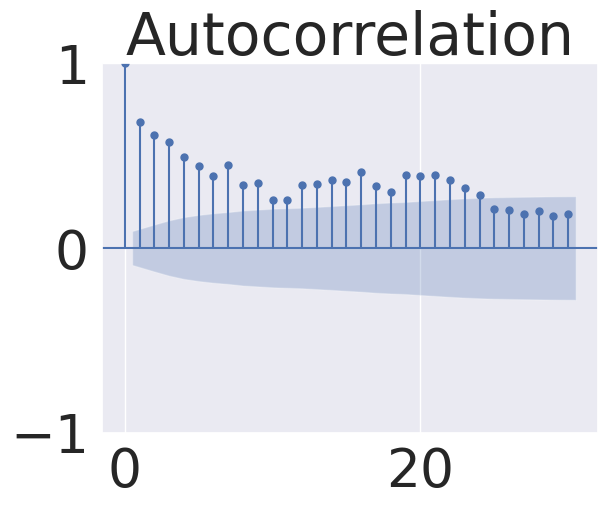

In [ ]:
fig = tsaplots.plot_acf(train['Views'], lags=30)
plt.show()

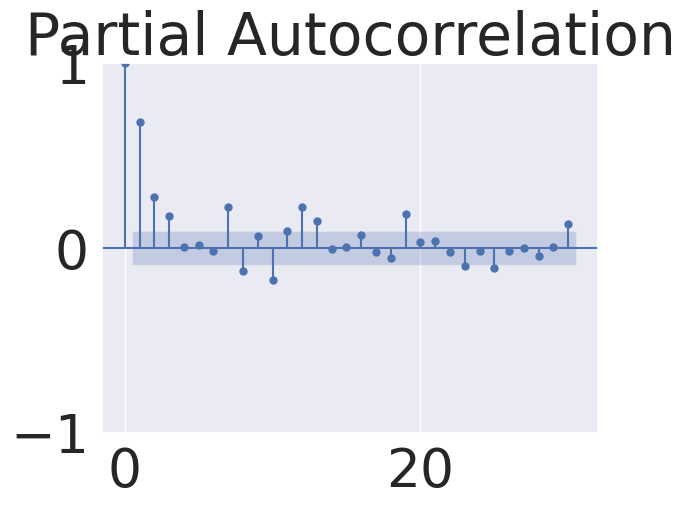

In [ ]:
fig = tsaplots.plot_pacf(train['Views'], lags=30)
plt.show()

## 4. ARMA Model


In [ ]:
aic_bic_values = []
for p in range(7):
    for q in range(7):
        try:
            model = SARIMAX(train, order=(p,0,q))
            result = model.fit()
            aic_bic_values.append((p,q,result.aic,result.bic))
        except:
            continue

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46673D+00    |proj g|=  2.24709D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.247D-08   4.467D+00
  F =   4.4667278527326877     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.1


At iterate   10    f=  3.66062D+00    |proj g|=  1.37088D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   6.059D-06   3.660D+00
  F =   3.6603633207083992     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05507D+00    |proj g|=  9.77406D-02

At iterate    5    f=  3.70964D+00    |proj g|=  2.13197D-01

At iterate   10    f=  3.54642D+00    |proj g|=  1.26370D-01

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.75802D+00    |proj g|=  2.26845D-01

At iterate   10    f=  3.42506D+00    |proj g|=  4.08969D-01

At iterate   15    f=  3.36742D+00    |proj g|=  1.49852D-01

At iterate   20    f=  3.35357D+00    |proj g|=  2.39955D-02

At iterate   25    f=  3.35322D+00    |proj g|=  2.60888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     43      1     0     0   2.609D-05   3.353D+00
  F =   3.3532210209365902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01814D+00    |proj g|=  9.29975D-02

At iterate    5    f=  3.64243D+00    |proj g|=  7.09316D-01

At iterate   10    f=  3.25969D+00    |proj g|=  1.61953D-01

At iterate   15    f=  3.21847D+00    |proj g|=  2.82896D-02

At iterate   20    f=  3.21752D+00    |proj g|=  1.77535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     32      1     0     0   3.193D-06   3.218D+00
  F =   3.2175191436582509     

CONVERG

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01565D+00    |proj g|=  7.31288D-02

At iterate    5    f=  3.68878D+00    |proj g|=  9.88884D-01



At iterate   10    f=  3.45178D+00    |proj g|=  3.60710D-01

At iterate   15    f=  3.26241D+00    |proj g|=  2.09296D-01

At iterate   20    f=  3.20370D+00    |proj g|=  1.01341D-01

At iterate   25    f=  3.19374D+00    |proj g|=  9.57503D-03



At iterate   30    f=  3.19357D+00    |proj g|=  1.06163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     52      1     0     0   8.832D-06   3.194D+00
  F =   3.1935682217925598     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98413D+00    |proj g|=  3.20050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87124D+00    |proj g|=  6.59900D-02

At iterate    5    f=  2.86658D+00    |proj g|=  1.07034D-03

At iterate   10    f=  2.86652D+00    |proj g|=  2.18397D-03

At iterate   15    f=  2.86573D+00    |proj g|=  1.87725D-03

At iterate   20    f=  2.86567D+00    |proj g|=  5.42843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   9.415D-06   2.866D+00
  F =   2.8656739541287513     

CONVERG

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.84275D+00    |proj g|=  2.10138D-03

At iterate   20    f=  2.84255D+00    |proj g|=  1.02640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     26      1     0     0   4.651D-05   2.843D+00
  F =   2.8425469053274592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86015D+00    |proj g|=  4.72064D-02

At iterate    5    f=  2.84960D+00    |proj g|=  1.31137D-02

At iter


At iterate   15    f=  2.84622D+00    |proj g|=  3.70837D-02

At iterate   20    f=  2.84112D+00    |proj g|=  5.05704D-03

At iterate   25    f=  2.84074D+00    |proj g|=  7.00720D-04

At iterate   30    f=  2.84073D+00    |proj g|=  2.11976D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     35      1     0     0   3.469D-06   2.841D+00
  F =   2.8407324621018146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.84047D+00    |proj g|=  1.34899D-02

At iterate   10    f=  2.84010D+00    |proj g|=  6.75683D-04

At iterate   15    f=  2.83988D+00    |proj g|=  5.32161D-03

At iterate   20    f=  2.83724D+00    |proj g|=  7.71688D-03

At iterate   25    f=  2.83693D+00    |proj g|=  1.79063D-03



At iterate   30    f=  2.83691D+00    |proj g|=  1.26398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     35      1     0     0   8.416D-06   2.837D+00
  F =   2.8369113178550736     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90378D+00    |proj g|=  8.02625D-04

At iterate    5    f=  2.90377D+00    |proj g|=  1.25877D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s


At iterate    5    f=  2.85536D+00    |proj g|=  2.76936D-03

At iterate   10    f=  2.85427D+00    |proj g|=  1.75104D-03

At iterate   15    f=  2.85421D+00    |proj g|=  8.72808D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     20      1     0     0   8.728D-06   2.854D+00
  F =   2.8542051009690907     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86820D+00    |proj g|=  3.53065D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  2.85419D+00    |proj g|=  1.01945D-03

At iterate   30    f=  2.85418D+00    |proj g|=  1.87174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   6.585D-07   2.854D+00
  F =   2.8541835015648060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85225D+00    |proj g|=  4.59608D-02

At iterate    5    f=  2.84680D+00    |proj g|=  2.62828D-03

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.84451D+00    |proj g|=  1.58237D-03

At iterate   25    f=  2.84446D+00    |proj g|=  3.31767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     31      1     0     0   1.459D-05   2.844D+00
  F =   2.8444544090086756     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87562D+00    |proj g|=  1.72139D-01

At iterate    5    f=  2.83987D+00    |proj g|=  7.03619D-03

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.83873D+00    |proj g|=  1.09530D-03

At iterate   20    f=  2.83859D+00    |proj g|=  3.06511D-03

At iterate   25    f=  2.83750D+00    |proj g|=  1.32717D-02

At iterate   30    f=  2.83686D+00    |proj g|=  1.40625D-03

At iterate   35    f=  2.83684D+00    |proj g|=  2.67167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     36     41      1     0     0   1.733D-05   2.837D+00
  F =   2.8368441235505926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82925D+00    |proj g|=  6.39826D-02

At iterate    5    f=  2.82211D+00    |proj g|=  2.40357D-02

At iterate   10    f=  2.81940D+00    |proj g|=  8.51222D-03

At iterate   15    f=  2.81928D+00    |proj g|=  4.77050D-05



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     22      1     0     0   3.822D-05   2.819D+00
  F =   2.8192768942314643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87526D+00    |proj g|=  1.03544D-03

At iterate    5    f=  2.87526D+00    |proj g|=  3.70228D-05

At iterate   10    f=  2.87526D+00    |proj g|=  4.88232D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  2.85415D+00    |proj g|=  8.01629D-03

At iterate   25    f=  2.85242D+00    |proj g|=  8.02356D-04

At iterate   30    f=  2.85238D+00    |proj g|=  6.06401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     37      1     0     0   6.064D-05   2.852D+00
  F =   2.8523845286606724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86404D+00    |proj g|=  6.04799D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros 


At iterate    5    f=  2.92673D+00    |proj g|=  1.59996D-01

At iterate   10    f=  2.87795D+00    |proj g|=  2.76714D-02

At iterate   15    f=  2.86807D+00    |proj g|=  1.03112D-02

At iterate   20    f=  2.86680D+00    |proj g|=  6.19679D-03

At iterate   25    f=  2.86496D+00    |proj g|=  3.07101D-02

At iterate   30    f=  2.86414D+00    |proj g|=  1.56313D-02

At iterate   35    f=  2.86386D+00    |proj g|=  2.90664D-03



At iterate   40    f=  2.86360D+00    |proj g|=  2.35985D-02

At iterate   45    f=  2.86300D+00    |proj g|=  9.70551D-03

At iterate   50    f=  2.86124D+00    |proj g|=  8.17910D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   8.179D-03   2.861D+00
  F =   2.8612382408375643     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05362D+00    |proj g|=  5.60789D-01

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  2.84545D+00    |proj g|=  2.17525D-03

At iterate   20    f=  2.84376D+00    |proj g|=  5.38772D-03

At iterate   25    f=  2.83910D+00    |proj g|=  1.76082D-02

At iterate   30    f=  2.83082D+00    |proj g|=  1.43773D-03

At iterate   35    f=  2.83025D+00    |proj g|=  9.53384D-03

At iterate   40    f=  2.82970D+00    |proj g|=  8.48669D-04



At iterate   45    f=  2.82970D+00    |proj g|=  1.08249D-04

At iterate   50    f=  2.82970D+00    |proj g|=  3.26228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   3.262D-05   2.830D+00
  F =   2.8296967092732070     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90459D+00    |proj g|=  2.39649D-01

At iterate    5    f=  2.84781D+00    |proj g|=  3.10555D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.84030D+00    |proj g|=  7.86608D-03

At iterate   20    f=  2.83862D+00    |proj g|=  2.51793D-03

At iterate   25    f=  2.83846D+00    |proj g|=  1.49017D-03

At iterate   30    f=  2.83843D+00    |proj g|=  1.20256D-03



At iterate   35    f=  2.83834D+00    |proj g|=  3.46734D-03

At iterate   40    f=  2.83755D+00    |proj g|=  1.81619D-02

At iterate   45    f=  2.83419D+00    |proj g|=  9.47459D-03


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.83146D+00    |proj g|=  1.30505D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   1.305D-02   2.831D+00
  F =   2.8314554021169434     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82751D+00    |proj g|=  5.95084D-02

At iterate    5    f=  2.81845D+00    |proj g|=  3.01965D-02

At iterate   10    f=  2.80939D+00    |proj g|=  1.17262D-02



At iterate   15    f=  2.80656D+00    |proj g|=  1.88920D-02

At iterate   20    f=  2.79857D+00    |proj g|=  1.55260D-02

At iterate   25    f=  2.79684D+00    |proj g|=  1.34858D-02



At iterate   30    f=  2.79676D+00    |proj g|=  1.35586D-04

At iterate   35    f=  2.79676D+00    |proj g|=  1.45236D-03

At iterate   40    f=  2.79665D+00    |proj g|=  6.24745D-03



At iterate   45    f=  2.79513D+00    |proj g|=  1.83640D-02

At iterate   50    f=  2.79416D+00    |proj g|=  4.52146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     63      1     0     0   4.521D-03   2.794D+00
  F =   2.7941552648926953     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87358D+00    |proj g|=  1.53673D-03

At iterate    5    f=  2.87357D+00    |proj g|=  2.81792D-05

       

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f


At iterate    5    f=  2.87388D+00    |proj g|=  5.68546D-03

At iterate   10    f=  2.87379D+00    |proj g|=  7.15520D-04

At iterate   15    f=  2.87311D+00    |proj g|=  2.87306D-02

At iterate   20    f=  2.85856D+00    |proj g|=  4.63243D-02

At iterate   25    f=  2.84694D+00    |proj g|=  6.39411D-03

At iterate   30    f=  2.84602D+00    |proj g|=  4.07210D-03

At iterate   35    f=  2.84547D+00    |proj g|=  3.37742D-04



At iterate   40    f=  2.84546D+00    |proj g|=  2.73197D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     45      1     0     0   2.732D-05   2.845D+00
  F =   2.8454638776945065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44539D+01    |proj g|=  2.34829D+01

At iterate    5    f=  2.88798D+00    |proj g|=  7.58041D-02

At iterate   10    f=  2.88108D+00    |proj g|=  1.65424D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   30    f=  2.84652D+00    |proj g|=  5.00715D-02

At iterate   35    f=  2.83312D+00    |proj g|=  5.40399D-03

At iterate   40    f=  2.83024D+00    |proj g|=  1.76258D-03

At iterate   45    f=  2.82996D+00    |proj g|=  1.40378D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     59      1     0     0   3.987D-05   2.830D+00
  F =   2.8299547105292748     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  2.87315D+00    |proj g|=  4.12090D-02

At iterate   15    f=  2.84856D+00    |proj g|=  2.13974D-02

At iterate   20    f=  2.84447D+00    |proj g|=  4.40946D-03

At iterate   25    f=  2.84346D+00    |proj g|=  2.98318D-02

At iterate   30    f=  2.84326D+00    |proj g|=  1.40968D-03



At iterate   35    f=  2.84321D+00    |proj g|=  1.49020D-03

At iterate   40    f=  2.84321D+00    |proj g|=  5.10685D-04

At iterate   45    f=  2.84321D+00    |proj g|=  3.51631D-04

At iterate   50    f=  2.84318D+00    |proj g|=  1.13328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   1.133D-03   2.843D+00
  F =   2.8431841843042553     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete


At iterate    5    f=  2.89275D+00    |proj g|=  1.00982D-01

At iterate   10    f=  2.87067D+00    |proj g|=  4.43694D-02

At iterate   15    f=  2.85221D+00    |proj g|=  9.43082D-03

At iterate   20    f=  2.84623D+00    |proj g|=  7.38440D-02



At iterate   25    f=  2.84102D+00    |proj g|=  9.41011D-02

At iterate   30    f=  2.83767D+00    |proj g|=  7.98001D-02

At iterate   35    f=  2.83640D+00    |proj g|=  9.68660D-02

At iterate   40    f=  2.83570D+00    |proj g|=  3.17558D-02



At iterate   45    f=  2.83534D+00    |proj g|=  9.91598D-03

At iterate   50    f=  2.83506D+00    |proj g|=  5.84159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   5.842D-03   2.835D+00
  F =   2.8350618899747762     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88511D+00    |proj g|=  2.12129D-01

At iterate    5    f=  2.85594D+00    |proj g|=  6.35790D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.84396D+00    |proj g|=  1.82896D-02

At iterate   15    f=  2.83817D+00    |proj g|=  2.02529D-02

At iterate   20    f=  2.83655D+00    |proj g|=  7.34018D-03



At iterate   25    f=  2.83376D+00    |proj g|=  1.89170D-02

At iterate   30    f=  2.83241D+00    |proj g|=  1.08958D-03

At iterate   35    f=  2.83225D+00    |proj g|=  6.86419D-03



At iterate   40    f=  2.83213D+00    |proj g|=  3.39732D-03

At iterate   45    f=  2.83203D+00    |proj g|=  1.75177D-03

At iterate   50    f=  2.83199D+00    |proj g|=  1.49991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.500D-03   2.832D+00
  F =   2.8319926950350696     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81954D+00    |proj g|=  5.24603D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.81241D+00    |proj g|=  8.57249D-03

At iterate   10    f=  2.81114D+00    |proj g|=  1.06545D-02

At iterate   15    f=  2.80858D+00    |proj g|=  1.49842D-02



At iterate   20    f=  2.80808D+00    |proj g|=  8.34105D-03

At iterate   25    f=  2.80664D+00    |proj g|=  1.65540D-02



At iterate   30    f=  2.80081D+00    |proj g|=  3.10160D-02

At iterate   35    f=  2.79617D+00    |proj g|=  8.38353D-03

At iterate   40    f=  2.79487D+00    |proj g|=  8.58597D-03



At iterate   45    f=  2.79427D+00    |proj g|=  1.74449D-03

At iterate   50    f=  2.79421D+00    |proj g|=  1.95729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   1.957D-04   2.794D+00
  F =   2.7942108929297755     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87162D+00    |proj g|=  2.03658D-03

At iterate    5    f=  2.87160D+00    |proj g|=  2.07914D-05

       

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f


At iterate    5    f=  2.87160D+00    |proj g|=  1.25248D-03

At iterate   10    f=  2.87060D+00    |proj g|=  9.07308D-02

At iterate   15    f=  2.85506D+00    |proj g|=  1.18825D-02

At iterate   20    f=  2.85427D+00    |proj g|=  9.73671D-04

At iterate   25    f=  2.85423D+00    |proj g|=  3.77013D-03



At iterate   30    f=  2.85317D+00    |proj g|=  2.22501D-02

At iterate   35    f=  2.85181D+00    |proj g|=  4.96968D-03

At iterate   40    f=  2.85176D+00    |proj g|=  6.41456D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     60      1     0     0   6.415D-06   2.852D+00
  F =   2.8517641361196828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86289D+00    |proj g|=  1.12336D-01

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.83895D+00    |proj g|=  4.70761D-03

At iterate   20    f=  2.83321D+00    |proj g|=  4.73268D-02

At iterate   25    f=  2.83055D+00    |proj g|=  1.06285D-02

At iterate   30    f=  2.82986D+00    |proj g|=  4.45729D-03

At iterate   35    f=  2.82983D+00    |proj g|=  1.78093D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     39      1     0     0   1.879D-05   2.830D+00
  F =   2.8298333253919132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50322D+01    |proj g|=  2.46543D+01

At iterate    5    f=  2.86411D+00    |proj g|=  4.05438D-02

At iterate   10    f=  2.85126D+00    |proj g|=  8.14928D-03

At iterate   15    f=  2.84933D+00    |proj g|=  1.87574D-02

At iterate   20    f=  2.84746D+00    |proj g|=  9.56841D-03



At iterate   25    f=  2.84713D+00    |proj g|=  2.74406D-03

At iterate   30    f=  2.84704D+00    |proj g|=  5.99195D-03

At iterate   35    f=  2.84700D+00    |proj g|=  1.10541D-03

At iterate   40    f=  2.84697D+00    |proj g|=  2.64514D-03

At iterate   45    f=  2.84697D+00    |proj g|=  5.41241D-05



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     55      1     0     0   1.938D-04   2.847D+00
  F =   2.8469702935179386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50308D+01    |proj g|=  2.46515D+01

At iterate    5    f=  2.86386D+00    |proj g|=  6.67551D-02

At iterate   10    f=  2.85076D+00    |proj g|=  8.79430D-02

At iterate   15    f=  2.84880D+00    |proj g|=  9.55608D-03


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  2.84833D+00    |proj g|=  4.32852D-03

At iterate   25    f=  2.84805D+00    |proj g|=  3.11906D-03

At iterate   30    f=  2.84787D+00    |proj g|=  5.49922D-03

At iterate   35    f=  2.84781D+00    |proj g|=  9.01924D-04



At iterate   40    f=  2.84771D+00    |proj g|=  8.43489D-03

At iterate   45    f=  2.84743D+00    |proj g|=  3.25014D-03

At iterate   50    f=  2.84740D+00    |proj g|=  1.73717D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.737D-03   2.847D+00
  F =   2.8473974949919389     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90749D+00    |proj g|=  3.32567D-01


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.83673D+00    |proj g|=  2.93242D-02

At iterate   10    f=  2.83214D+00    |proj g|=  4.50218D-02

At iterate   15    f=  2.82996D+00    |proj g|=  9.82654D-03



At iterate   20    f=  2.82876D+00    |proj g|=  1.73479D-02

At iterate   25    f=  2.82545D+00    |proj g|=  8.70345D-02



At iterate   30    f=  2.82082D+00    |proj g|=  1.91566D-01

At iterate   35    f=  2.81876D+00    |proj g|=  3.75244D-02

At iterate   40    f=  2.81796D+00    |proj g|=  3.68153D-02



At iterate   45    f=  2.81720D+00    |proj g|=  3.99424D-02

At iterate   50    f=  2.81703D+00    |proj g|=  5.22669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   5.227D-02   2.817D+00
  F =   2.8170297807135389     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81904D+00    |proj g|=  6.47306D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.81096D+00    |proj g|=  1.36790D-02

At iterate   10    f=  2.80520D+00    |proj g|=  2.95918D-02

At iterate   15    f=  2.79454D+00    |proj g|=  1.53641D-02



At iterate   20    f=  2.79265D+00    |proj g|=  4.90916D-03

At iterate   25    f=  2.79215D+00    |proj g|=  3.63704D-03

At iterate   30    f=  2.79209D+00    |proj g|=  9.26770D-04



At iterate   35    f=  2.79209D+00    |proj g|=  4.09006D-04

At iterate   40    f=  2.79207D+00    |proj g|=  1.39605D-03

At iterate   45    f=  2.79192D+00    |proj g|=  3.83225D-03


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f


At iterate   50    f=  2.79139D+00    |proj g|=  1.12149D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     56      1     0     0   1.121D-02   2.791D+00
  F =   2.7913948971684119     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87115D+00    |proj g|=  2.38775D-03

At iterate    5    f=  2.87112D+00    |proj g|=  1.56800D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu


At iterate   10    f=  2.87160D+00    |proj g|=  7.72076D-04

At iterate   15    f=  2.86723D+00    |proj g|=  5.08569D-02

At iterate   20    f=  2.85286D+00    |proj g|=  6.05133D-03

At iterate   25    f=  2.85263D+00    |proj g|=  3.07876D-03



At iterate   30    f=  2.85024D+00    |proj g|=  1.14344D-02

At iterate   35    f=  2.84975D+00    |proj g|=  2.82272D-04

At iterate   40    f=  2.84975D+00    |proj g|=  1.46065D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     57      1     0     0   1.461D-06   2.850D+00
  F =   2.8497501504524219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87304D+00    |proj g|=  2.67119D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.85110D+00    |proj g|=  3.87830D-02

At iterate   15    f=  2.84782D+00    |proj g|=  3.92481D-03

At iterate   20    f=  2.84582D+00    |proj g|=  1.82657D-02

At iterate   25    f=  2.83325D+00    |proj g|=  1.29283D-02

At iterate   30    f=  2.82991D+00    |proj g|=  5.39448D-03



At iterate   35    f=  2.82804D+00    |proj g|=  3.03449D-03

At iterate   40    f=  2.82781D+00    |proj g|=  8.51430D-04

At iterate   45    f=  2.82781D+00    |proj g|=  2.54183D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     51      1     0     0   5.711D-06   2.828D+00
  F =   2.8278073183958830     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53917D+01    |proj g|=  2.53815D+01


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  2.87783D+00    |proj g|=  5.56306D-02

At iterate   10    f=  2.86713D+00    |proj g|=  6.69468D-02

At iterate   15    f=  2.85089D+00    |proj g|=  1.02039D-02

At iterate   20    f=  2.84891D+00    |proj g|=  1.88416D-02



At iterate   25    f=  2.84719D+00    |proj g|=  1.18776D-02

At iterate   30    f=  2.84685D+00    |proj g|=  2.21580D-03

At iterate   35    f=  2.84675D+00    |proj g|=  8.47306D-03

At iterate   40    f=  2.84672D+00    |proj g|=  4.90423D-03



At iterate   45    f=  2.84669D+00    |proj g|=  8.47902D-04

At iterate   50    f=  2.84669D+00    |proj g|=  7.24746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   7.247D-05   2.847D+00
  F =   2.8466866215400914     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50457D+01    |proj g|=  2.46816D+01

At iterate    5    f=  2.88322D+00    |proj g|=  5.79008D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete


At iterate   10    f=  2.86264D+00    |proj g|=  5.98753D-02

At iterate   15    f=  2.85121D+00    |proj g|=  1.78913D-02

At iterate   20    f=  2.84787D+00    |proj g|=  1.54291D-02



At iterate   25    f=  2.84767D+00    |proj g|=  6.35962D-03

At iterate   30    f=  2.84732D+00    |proj g|=  6.88554D-03

At iterate   35    f=  2.84603D+00    |proj g|=  2.75607D-02



At iterate   40    f=  2.84446D+00    |proj g|=  2.99180D-02

At iterate   45    f=  2.84292D+00    |proj g|=  1.99981D-02

At iterate   50    f=  2.84212D+00    |proj g|=  2.18132D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     60      1     0     0   2.181D-02   2.842D+00
  F =   2.8421221599292448     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62971D+00    |proj g|=  1.30582D+00


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  2.86370D+00    |proj g|=  3.32081D-01

At iterate   10    f=  2.83624D+00    |proj g|=  8.20449D-02

At iterate   15    f=  2.82479D+00    |proj g|=  2.54754D-02



At iterate   20    f=  2.82247D+00    |proj g|=  3.93393D-02

At iterate   25    f=  2.82108D+00    |proj g|=  1.29872D-02

At iterate   30    f=  2.82008D+00    |proj g|=  7.04053D-03



At iterate   35    f=  2.81938D+00    |proj g|=  1.41885D-02

At iterate   40    f=  2.81548D+00    |proj g|=  5.51610D-02

At iterate   45    f=  2.80973D+00    |proj g|=  2.96580D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.80774D+00    |proj g|=  9.40640D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     60      1     0     0   9.406D-03   2.808D+00
  F =   2.8077366510608122     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81754D+00    |proj g|=  6.88089D-02

At iterate    5    f=  2.80676D+00    |proj g|=  3.04637D-02



At iterate   10    f=  2.79893D+00    |proj g|=  1.49845D-02

At iterate   15    f=  2.79727D+00    |proj g|=  3.12106D-03

At iterate   20    f=  2.79715D+00    |proj g|=  3.33238D-03



At iterate   25    f=  2.79711D+00    |proj g|=  1.25471D-03

At iterate   30    f=  2.79711D+00    |proj g|=  2.66938D-04

At iterate   35    f=  2.79711D+00    |proj g|=  5.13635D-04



At iterate   40    f=  2.79710D+00    |proj g|=  6.02756D-04

At iterate   45    f=  2.79710D+00    |proj g|=  1.27756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     49     54      1     0     0   4.450D-05   2.797D+00
  F =   2.7971006254526718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [ ]:
aic_bic_df = pd.DataFrame(aic_bic_values,columns=['p','q','aic','bic'])
aic_bic_df = aic_bic_df.sort_values(by=['aic','bic'])

In [ ]:
# prediction using ARMA model
model = SARIMAX(train,order=(int(aic_bic_df.iloc[0]['p']),0,int(aic_bic_df.iloc[0]['q'])))
result = model.fit()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82751D+00    |proj g|=  5.95084D-02

At iterate    5    f=  2.81845D+00    |proj g|=  3.01965D-02

At iterate   10    f=  2.80939D+00    |proj g|=  1.17262D-02



At iterate   15    f=  2.80656D+00    |proj g|=  1.88920D-02

At iterate   20    f=  2.79857D+00    |proj g|=  1.55260D-02

At iterate   25    f=  2.79684D+00    |proj g|=  1.34858D-02



At iterate   30    f=  2.79676D+00    |proj g|=  1.35586D-04

At iterate   35    f=  2.79676D+00    |proj g|=  1.45236D-03

At iterate   40    f=  2.79665D+00    |proj g|=  6.24745D-03



At iterate   45    f=  2.79513D+00    |proj g|=  1.83640D-02

At iterate   50    f=  2.79416D+00    |proj g|=  4.52146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     63      1     0     0   4.521D-03   2.794D+00
  F =   2.7941552648926953     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import pickle
with open('arma_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
forecast = result.get_prediction(start=-30)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

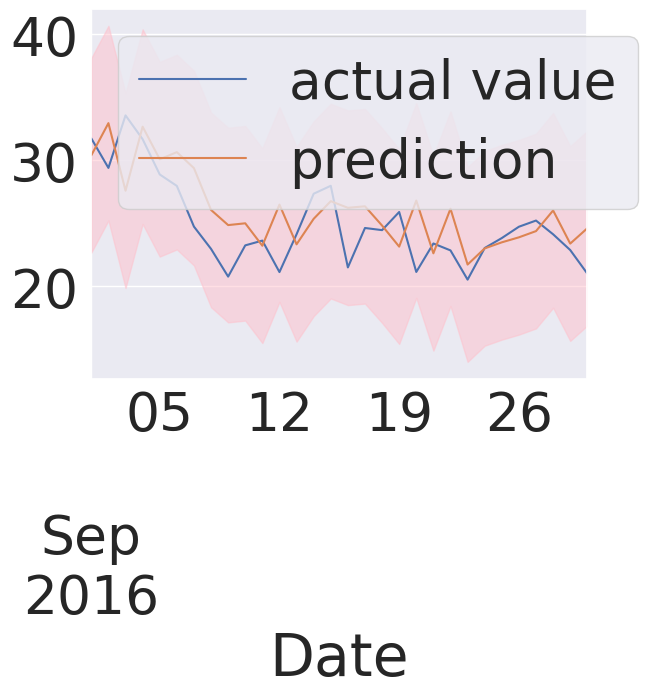

In [ ]:
fig,ax=plt.subplots()
train[-30:].rename(columns={'Views':'actual value'}).plot(ax=ax)
forecast_mean.plot(ax=ax,label='prediction')
plt.fill_between(confidence_interval.index, \
                confidence_interval['lower Views'], \
                confidence_interval['upper Views'], \
                color='pink', alpha=0.5)
plt.legend()
plt.show()

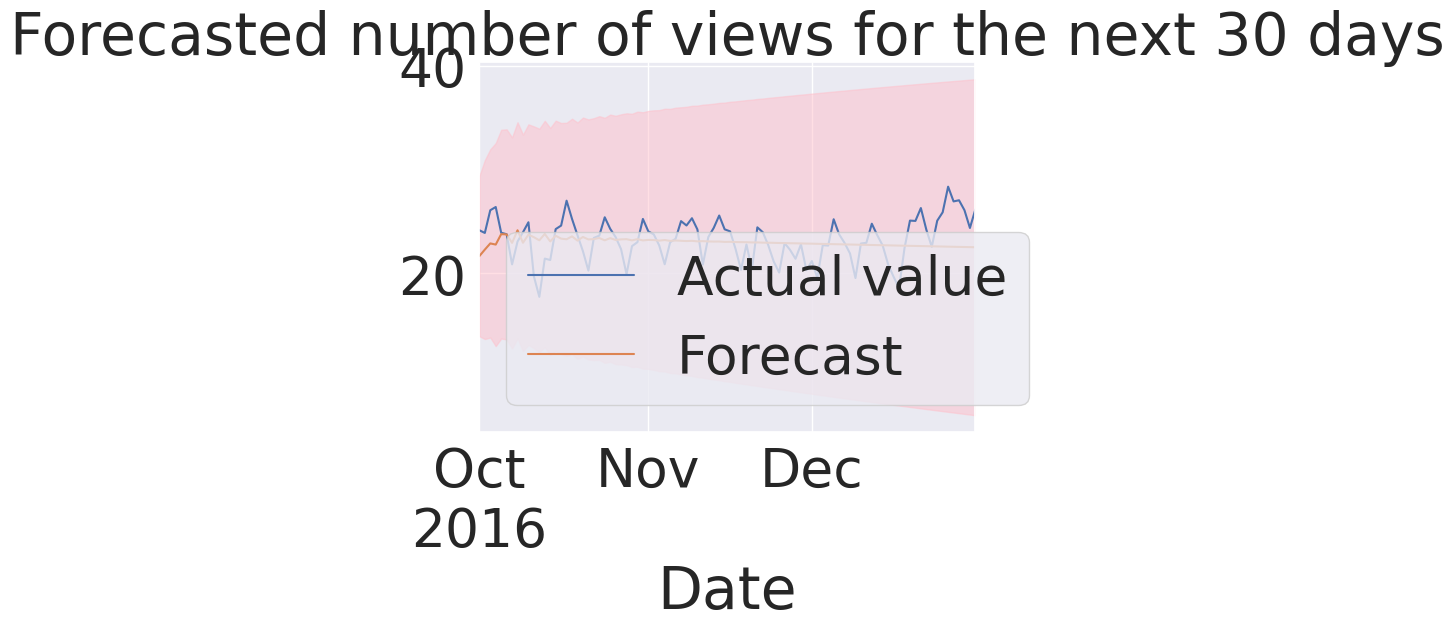

In [ ]:
# forecasting using ARMA model
forecast_values = result.get_forecast(steps=test.shape[0])
forecast_values_mean = forecast_values.predicted_mean
conf_interval = forecast_values.conf_int()

arma_forecast_df = pd.DataFrame({'Date':test.index,'Views':forecast_values.predicted_mean,'lower_views':conf_interval['lower Views'].values,'upper_views':conf_interval['upper Views'].values})
arma_forecast_df = arma_forecast_df.set_index('Date')

fig,ax=plt.subplots()
test.rename(columns={'Views':'Actual value'}).plot(ax=ax)
arma_forecast_df[['Views']].rename(columns={'Views':'Forecast'}).plot(ax=ax,label='Forecast')
plt.fill_between(arma_forecast_df.index, \
                arma_forecast_df.lower_views, \
                arma_forecast_df.upper_views, \
                color='pink', alpha=0.5)
plt.title('Forecasted number of views for the next 30 days')
plt.legend()
plt.show()

In [ ]:
rmse_values = []
rmse_values.append(('ARMA',np.sqrt(np.mean(np.square(forecast_values_mean.values - test.Views.values)))))

In [ ]:
print(rmse_values)

[('ARMA', 2.164010587578305)]


## 5. ARIMA Model


In [ ]:
arima_aic_bic = []
for p in range(7):
    for q in range(7):
        try:
            arima_model = SARIMAX(train, order=(p,1,q))
            arima_result = arima_model.fit()
            arima_aic_bic.append((p,q,arima_result.aic,arima_result.bic))
        except:
            continue

arima_aic_bic_df = pd.DataFrame(arima_aic_bic,columns=['p','q','aic','bic'])
arima_aic_bic_df = arima_aic_bic_df.sort_values(by=['aic','bic'])

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98093D+00    |proj g|=  4.54983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   7.954D-08   2.981D+00
  F =   2.9809327222110129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.8


At iterate   10    f=  2.83286D+00    |proj g|=  3.42503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   2.315D-06   2.833D+00
  F =   2.8328644064148070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84238D+00    |proj g|=  4.66357D-02

At iterate    5    f=  2.83117D+00    |proj g|=  7.60972D-03

At iterate   10    f=  2.83100D+00    |proj g|=  2.35168D-04

       

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.82778D+00    |proj g|=  2.22188D-02

At iterate   10    f=  2.82715D+00    |proj g|=  2.54262D-03

At iterate   15    f=  2.82714D+00    |proj g|=  8.74709D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   8.747D-06   2.827D+00
  F =   2.8271362293269924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89689D+00    |proj g|=  7.89870D-04

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99649D+00    |proj g|=  4.99768D-01

At iterate    5    f=  2.85851D+00    |proj g|=  2.50292D-03

At iterate   10    f=  2.85847D+00    |proj g|=  1.34595D-03
  ys=-3.911E-04  -gs= 5.195E-04 BFGS update SKIPPED

At iterate   15    f=  2.84623D+00    |proj g|=  1.82299D-02

At iterate   20    f=  2.84536D+00    |proj g|=  2.88849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     1     0   8.488D-06 

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   6.198D-06   2.845D+00
  F =   2.8453023334307530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85840D+00    |proj g|=  5.74385D-02

At iterate    5    f=  2.84221D+00    |proj g|=  6.50237D-03

At iterate   10    f=  2.83772D+00    |proj g|=  1.60652D-02

At iterate   15    f=  2.83496D+00    |proj g|=  1.77632D-03

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.82961D+00    |proj g|=  1.30682D-02

At iterate   10    f=  2.82850D+00    |proj g|=  7.90137D-03

At iterate   15    f=  2.82721D+00    |proj g|=  1.03486D-03

At iterate   20    f=  2.82720D+00    |proj g|=  1.81731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     24      1     0     0   1.149D-05   2.827D+00
  F =   2.8272026375257981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.81192D+00    |proj g|=  1.99939D-02

At iterate   10    f=  2.80956D+00    |proj g|=  7.84670D-03

At iterate   15    f=  2.80947D+00    |proj g|=  1.29182D-04

At iterate   20    f=  2.80947D+00    |proj g|=  3.46851D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     25      1     0     0   3.469D-06   2.809D+00
  F =   2.8094679132450366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86726D+00    |proj g|=  9.93757D-04

At iterate    5    f=  2.86725D+00    |proj g|=  4.25889D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   2.442D-06   2.867D+00
  F =   2.8672509220616305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v


At iterate   10    f=  2.85470D+00    |proj g|=  4.12777D-03

At iterate   15    f=  2.85404D+00    |proj g|=  2.53835D-02

At iterate   20    f=  2.84331D+00    |proj g|=  4.25427D-02

At iterate   25    f=  2.83855D+00    |proj g|=  2.28140D-03

At iterate   30    f=  2.83843D+00    |proj g|=  1.26288D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   8.861D-06   2.838D+00
  F =   2.8384278618524097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  2.83974D+00    |proj g|=  1.07474D-02

At iterate   15    f=  2.83596D+00    |proj g|=  1.56329D-03

At iterate   20    f=  2.83585D+00    |proj g|=  1.16716D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.126D-05   2.836D+00
  F =   2.8358517646593535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85261D+00    |proj g|=  4.84779D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  2.83806D+00    |proj g|=  6.47237D-04

At iterate   15    f=  2.83806D+00    |proj g|=  9.09571D-05

At iterate   20    f=  2.83799D+00    |proj g|=  3.36318D-02

At iterate   25    f=  2.83193D+00    |proj g|=  1.89831D-02

At iterate   30    f=  2.82855D+00    |proj g|=  1.87816D-02



At iterate   35    f=  2.82767D+00    |proj g|=  8.01711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     52      1     0     0   2.375D-06   2.828D+00
  F =   2.8276686410281524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85582D+00    |proj g|=  1.59249D-01

At iterate    5    f=  2.82308D+00    |proj g|=  3.55643D-02

At iterate   10    f=  2.82043D+00    |proj g|=  1.82972D-03


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.82001D+00    |proj g|=  1.28663D-02

At iterate   20    f=  2.81979D+00    |proj g|=  9.59438D-04

At iterate   25    f=  2.81978D+00    |proj g|=  1.78680D-04

At iterate   30    f=  2.81978D+00    |proj g|=  2.70673D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     34      1     0     0   2.707D-05   2.820D+00
  F =   2.8197834627815821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81668D+00    |proj g|=  6.67356D-02

At iterate    5    f=  2.80613D+00    |proj g|=  2.57134D-02

At iterate   10    f=  2.79820D+00    |proj g|=  2.24682D-02



At iterate   15    f=  2.79513D+00    |proj g|=  5.03102D-02

At iterate   20    f=  2.78820D+00    |proj g|=  4.15484D-02

At iterate   25    f=  2.78496D+00    |proj g|=  1.83585D-02



At iterate   30    f=  2.78445D+00    |proj g|=  2.97836D-03

At iterate   35    f=  2.78442D+00    |proj g|=  3.03800D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     41      1     0     0   1.054D-05   2.784D+00
  F =   2.7844167776914275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86536D+00    |proj g|=  1.49363D-03

At iterate    5    f=  2.86535D+00    |proj g|=  2.68295D-05

       

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, s


At iterate   10    f=  2.84423D+00    |proj g|=  8.11659D-02

At iterate   15    f=  2.83592D+00    |proj g|=  9.86042D-03

At iterate   20    f=  2.83561D+00    |proj g|=  1.02103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   2.396D-06   2.836D+00
  F =   2.8356061339150149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99653D+00    |proj g|=  4.99913D-01

At iter


At iterate   20    f=  2.82013D+00    |proj g|=  1.08457D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   9.077D-07   2.820D+00
  F =   2.8201326762257732     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10141D+00    |proj g|=  5.97041D-01

At iterate    5    f=  2.87850D+00    |proj g|=  6.78269D-02

At iterate   10    f=  2.83946D+00    |proj g|=  1.64863D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  2.83611D+00    |proj g|=  1.61106D-03

At iterate   25    f=  2.83581D+00    |proj g|=  5.52473D-03

At iterate   30    f=  2.83518D+00    |proj g|=  2.00896D-03

At iterate   35    f=  2.83515D+00    |proj g|=  3.32081D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     43      1     0     0   3.321D-06   2.835D+00
  F =   2.8351537357655494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98654D+00    |proj g|=  2.22043D-01

At iterate    5    f=  2.85132D+00    |proj g|=  4.03236D-02

At iterate   10    f=  2.83968D+00    |proj g|=  2.45767D-02

At iterate   15    f=  2.83669D+00    |proj g|=  4.18202D-03



At iterate   20    f=  2.83453D+00    |proj g|=  1.59928D-02

At iterate   25    f=  2.82522D+00    |proj g|=  5.98607D-02

At iterate   30    f=  2.81885D+00    |proj g|=  2.45464D-02

At iterate   35    f=  2.81654D+00    |proj g|=  8.22002D-03



At iterate   40    f=  2.81531D+00    |proj g|=  1.70609D-02

At iterate   45    f=  2.81500D+00    |proj g|=  2.10704D-03

At iterate   50    f=  2.81500D+00    |proj g|=  1.28726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.287D-05   2.815D+00
  F =   2.8149963477354061     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84830D+00    |proj g|=  1.05505D-01


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.82002D+00    |proj g|=  3.73846D-02

At iterate   10    f=  2.81570D+00    |proj g|=  6.10391D-03

At iterate   15    f=  2.81399D+00    |proj g|=  5.23104D-03

At iterate   20    f=  2.81292D+00    |proj g|=  9.04441D-03



At iterate   25    f=  2.81265D+00    |proj g|=  1.27567D-03

At iterate   30    f=  2.81265D+00    |proj g|=  1.74964D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     37      1     0     0   3.094D-05   2.813D+00
  F =   2.8126510567372343     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81143D+00    |proj g|=  6.81941D-02


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.80282D+00    |proj g|=  1.06018D-02

At iterate   10    f=  2.80130D+00    |proj g|=  1.08448D-02

At iterate   15    f=  2.79888D+00    |proj g|=  8.14607D-03



At iterate   20    f=  2.79801D+00    |proj g|=  4.31314D-03

At iterate   25    f=  2.79569D+00    |proj g|=  2.45425D-02



At iterate   30    f=  2.78662D+00    |proj g|=  1.62942D-02

At iterate   35    f=  2.78401D+00    |proj g|=  5.92693D-03

At iterate   40    f=  2.78359D+00    |proj g|=  2.71161D-03



At iterate   45    f=  2.78354D+00    |proj g|=  7.09641D-04

At iterate   50    f=  2.78354D+00    |proj g|=  3.10269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   3.103D-05   2.784D+00
  F =   2.7835419116382210     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86320D+00    |proj g|=  1.99908D-03

At iterate    5    f=  2.86318D+00    |proj g|=  5.07518D-06

       

/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f


At iterate    5    f=  2.85691D+00    |proj g|=  6.70096D-02

At iterate   10    f=  2.84075D+00    |proj g|=  3.90252D-02

At iterate   15    f=  2.83576D+00    |proj g|=  2.87614D-02

At iterate   20    f=  2.83508D+00    |proj g|=  7.04133D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   2.371D-05   2.835D+00
  F =   2.8350761821047099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  2.83530D+00    |proj g|=  4.71397D-02

At iterate   15    f=  2.82013D+00    |proj g|=  4.32744D-03

At iterate   20    f=  2.82000D+00    |proj g|=  6.91591D-04

At iterate   25    f=  2.82000D+00    |proj g|=  5.66582D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   5.666D-06   2.820D+00
  F =   2.8200001607237741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  2.83122D+00    |proj g|=  9.38341D-03

At iterate   15    f=  2.82780D+00    |proj g|=  2.19419D-02

At iterate   20    f=  2.81990D+00    |proj g|=  1.27703D-02

At iterate   25    f=  2.81533D+00    |proj g|=  5.35735D-03

At iterate   30    f=  2.81513D+00    |proj g|=  1.17130D-03



At iterate   35    f=  2.80977D+00    |proj g|=  3.22473D-02

At iterate   40    f=  2.80171D+00    |proj g|=  2.67186D-03

At iterate   45    f=  2.79928D+00    |proj g|=  4.87993D-03

At iterate   50    f=  2.79906D+00    |proj g|=  6.71539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   6.715D-04   2.799D+00
  F =   2.7990562605028337     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00129D+00    |proj g|=  5.16496D-01

At iterate    5    f=  2.82889D+00    |proj g|=  1.58422D-01

At iterate   10    f=  2.81215D+00    |proj g|=  1.87467D-02

At iterate   15    f=  2.81028D+00    |proj g|=  9.09753D-03



At iterate   20    f=  2.80985D+00    |proj g|=  4.92261D-04

At iterate   25    f=  2.80985D+00    |proj g|=  9.62022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     34      1     0     0   1.519D-05   2.810D+00
  F =   2.8098453631090949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94691D+00    |proj g|=  1.75337D+00


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.89087D+00    |proj g|=  2.21511D-01

At iterate   10    f=  2.85012D+00    |proj g|=  1.56751D-01

At iterate   15    f=  2.84341D+00    |proj g|=  1.60959D-01



At iterate   20    f=  2.83925D+00    |proj g|=  1.38729D-01

At iterate   25    f=  2.83905D+00    |proj g|=  4.78802D-02

At iterate   30    f=  2.83719D+00    |proj g|=  3.45400D-02



At iterate   35    f=  2.83638D+00    |proj g|=  1.44344D-02

At iterate   40    f=  2.83448D+00    |proj g|=  5.02471D-02

At iterate   45    f=  2.83207D+00    |proj g|=  3.02083D-02


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.83186D+00    |proj g|=  1.06156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.062D-02   2.832D+00
  F =   2.8318575382403259     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81139D+00    |proj g|=  7.98461D-02

At iterate    5    f=  2.80165D+00    |proj g|=  2.41440D-02



At iterate   10    f=  2.79768D+00    |proj g|=  1.60666D-02

At iterate   15    f=  2.78946D+00    |proj g|=  6.31886D-02

At iterate   20    f=  2.78458D+00    |proj g|=  9.92908D-03



At iterate   25    f=  2.78240D+00    |proj g|=  5.88942D-03

At iterate   30    f=  2.78175D+00    |proj g|=  8.05967D-03

At iterate   35    f=  2.78164D+00    |proj g|=  9.05146D-04



At iterate   40    f=  2.78163D+00    |proj g|=  5.80889D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     50      1     0     0   7.507D-05   2.782D+00
  F =   2.7816306935327577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86264D+00    |proj g|=  2.38581D-03

At iterate    5    f=  2.86261D+00    |proj g|=  8.86344D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.83466D+00    |proj g|=  5.94302D-04

At iterate   20    f=  2.83465D+00    |proj g|=  2.84541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     24      1     0     0   3.173D-05   2.835D+00
  F =   2.8346523699789454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00425D+00    |proj g|=  5.25978D-01

At iterate    5    f=  2.85682D+00    |proj g|=  1.67953D-02

At iter

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  2.81924D+00    |proj g|=  3.39989D-03

At iterate   20    f=  2.81812D+00    |proj g|=  4.85519D-03

At iterate   25    f=  2.81795D+00    |proj g|=  1.49027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     30      1     0     0   1.690D-04   2.818D+00
  F =   2.8179450411845739     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99770D+00    |proj g|=  5.04160D-01


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  2.85615D+00    |proj g|=  2.98973D-02

At iterate   10    f=  2.83968D+00    |proj g|=  6.17795D-02

At iterate   15    f=  2.82581D+00    |proj g|=  5.85924D-02



At iterate   20    f=  2.81370D+00    |proj g|=  1.63950D-02

At iterate   25    f=  2.81133D+00    |proj g|=  2.79429D-03

At iterate   30    f=  2.81120D+00    |proj g|=  4.50598D-03

At iterate   35    f=  2.81114D+00    |proj g|=  5.88236D-05



At iterate   40    f=  2.81114D+00    |proj g|=  3.98058D-04

At iterate   45    f=  2.81109D+00    |proj g|=  6.92982D-03


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete


At iterate   50    f=  2.81060D+00    |proj g|=  1.81551D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67      1     0     0   1.816D-02   2.811D+00
  F =   2.8106047904911051     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00366D+00    |proj g|=  5.24149D-01

At iterate    5    f=  2.83216D+00    |proj g|=  1.59812D-01

At iterate   10    f=  2.80926D+00    |proj g|=  1.26920D-02



At iterate   15    f=  2.80395D+00    |proj g|=  8.93293D-02

At iterate   20    f=  2.80057D+00    |proj g|=  1.14117D-02

At iterate   25    f=  2.80001D+00    |proj g|=  2.95641D-03



At iterate   30    f=  2.79985D+00    |proj g|=  1.78479D-03

At iterate   35    f=  2.79981D+00    |proj g|=  1.61911D-03

At iterate   40    f=  2.79979D+00    |proj g|=  1.29471D-03



At iterate   45    f=  2.79979D+00    |proj g|=  4.53533D-04


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f=  2.79979D+00    |proj g|=  2.46840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     66      1     0     0   2.468D-05   2.800D+00
  F =   2.7997893829674960     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41982D+00    |proj g|=  8.38910D-01

At iterate    5    f=  2.85672D+00    |proj g|=  2.76516D-01



At iterate   10    f=  2.82084D+00    |proj g|=  3.80922D-02

At iterate   15    f=  2.81118D+00    |proj g|=  2.29004D-02

At iterate   20    f=  2.80640D+00    |proj g|=  1.49402D-02



At iterate   25    f=  2.80484D+00    |proj g|=  2.21516D-02

At iterate   30    f=  2.80133D+00    |proj g|=  5.19154D-02

At iterate   35    f=  2.79762D+00    |proj g|=  2.74828D-02



At iterate   40    f=  2.79443D+00    |proj g|=  1.31356D-02

At iterate   45    f=  2.79274D+00    |proj g|=  2.40252D-02

At iterate   50    f=  2.79067D+00    |proj g|=  2.64397D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   2.644D-02   2.791D+00
  F =   2.7906689709066979     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81088D+00    |proj g|=  8.15309D-02

At iterate    5    f=  2.80069D+00    |proj g|=  2.52584D-02

At iterate   10    f=  2.78954D+00    |proj g|=  1.93977D-02



At iterate   15    f=  2.78748D+00    |proj g|=  5.44155D-03

At iterate   20    f=  2.78737D+00    |proj g|=  1.91472D-03

At iterate   25    f=  2.78728D+00    |proj g|=  3.42718D-04



At iterate   30    f=  2.78728D+00    |proj g|=  6.11641D-04

At iterate   35    f=  2.78728D+00    |proj g|=  1.01064D-04

At iterate   40    f=  2.78728D+00    |proj g|=  3.38246D-04



At iterate   45    f=  2.78727D+00    |proj g|=  4.23628D-03

At iterate   50    f=  2.78700D+00    |proj g|=  7.03348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     60      1     0     0   7.033D-03   2.787D+00
  F =   2.7869970018263990     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82851D+00    |proj g|=  3.10306D-03

At iterate    5    f=  2.82847D+00    |proj g|=  2.37496D-04


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     10      1     0     0   1.378D-05   2.828D+00
  F =   2.8284667101474397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83887D+00    |proj g|=  4.80916D-02

At iterate    5    f=  2.83341D+00    |proj g|=  4.64761D-02

At iterate   10    f=  2.81681D+00    |proj g|=  3.87265D-02

At iterate   15    f=  2.81513D+00    |proj g|=  2.43004D-03



At iterate   20    f=  2.81510D+00    |proj g|=  9.94425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22     24      1     0     0   3.477D-05   2.815D+00
  F =   2.8150973951466840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83498D+00    |proj g|=  3.60961D-02

At iterate    5    f=  2.82115D+00    |proj g|=  9.81142D-02

At iterate   10    f=  2.80745D+00    |proj g|=  1.53472D-02


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  2.80451D+00    |proj g|=  5.04434D-03

At iterate   20    f=  2.80447D+00    |proj g|=  7.46042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     25      1     0     0   4.592D-06   2.804D+00
  F =   2.8044673245143135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10036D+00    |proj g|=  5.24321D-01

At iterate    5    f=  2.87506D+00    |proj g|=  6.24693D-02


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  2.84216D+00    |proj g|=  1.05747D-01

At iterate   15    f=  2.83202D+00    |proj g|=  1.44362D-02

At iterate   20    f=  2.83184D+00    |proj g|=  2.81341D-03



At iterate   25    f=  2.83179D+00    |proj g|=  1.78067D-03

At iterate   30    f=  2.83070D+00    |proj g|=  1.68516D-02



At iterate   35    f=  2.82973D+00    |proj g|=  4.64921D-02

At iterate   40    f=  2.82934D+00    |proj g|=  1.23618D-03

At iterate   45    f=  2.82932D+00    |proj g|=  6.56478D-04


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.82931D+00    |proj g|=  1.64026D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.640D-04   2.829D+00
  F =   2.8293128662197473     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03480D+00    |proj g|=  4.65849D-01

At iterate    5    f=  2.83112D+00    |proj g|=  2.93054D-02



At iterate   10    f=  2.82039D+00    |proj g|=  1.84535D-02

At iterate   15    f=  2.81725D+00    |proj g|=  1.31566D-02



At iterate   20    f=  2.81618D+00    |proj g|=  7.42176D-03

At iterate   25    f=  2.81597D+00    |proj g|=  4.97805D-03

At iterate   30    f=  2.81528D+00    |proj g|=  9.91450D-03



At iterate   35    f=  2.81515D+00    |proj g|=  3.92548D-03

At iterate   40    f=  2.81512D+00    |proj g|=  2.01053D-03

At iterate   45    f=  2.81506D+00    |proj g|=  6.49027D-03


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f=  2.81450D+00    |proj g|=  1.41549D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   1.415D-02   2.815D+00
  F =   2.8145010381745030     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33223D+00    |proj g|=  7.57117D-01

At iterate    5    f=  2.83920D+00    |proj g|=  1.44219D-01



At iterate   10    f=  2.80211D+00    |proj g|=  6.43667D-02

At iterate   15    f=  2.79479D+00    |proj g|=  1.13697D-02



At iterate   20    f=  2.79318D+00    |proj g|=  1.46132D-02

At iterate   25    f=  2.79242D+00    |proj g|=  1.89803D-02

At iterate   30    f=  2.79052D+00    |proj g|=  1.39121D-02



At iterate   35    f=  2.78945D+00    |proj g|=  9.60505D-03

At iterate   40    f=  2.78924D+00    |proj g|=  1.92775D-03

At iterate   45    f=  2.78917D+00    |proj g|=  2.04020D-03


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  2.78909D+00    |proj g|=  2.95460D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   2.955D-03   2.789D+00
  F =   2.7890865977238710     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80990D+00    |proj g|=  5.98943D-02

At iterate    5    f=  2.79546D+00    |proj g|=  3.90991D-02



At iterate   10    f=  2.78897D+00    |proj g|=  1.49381D-02

At iterate   15    f=  2.78808D+00    |proj g|=  5.97256D-03

At iterate   20    f=  2.78774D+00    |proj g|=  1.10744D-02



At iterate   25    f=  2.78753D+00    |proj g|=  1.20504D-03

At iterate   30    f=  2.78751D+00    |proj g|=  1.25804D-03

At iterate   35    f=  2.78751D+00    |proj g|=  8.08773D-04



At iterate   40    f=  2.78745D+00    |proj g|=  4.13892D-03

At iterate   45    f=  2.78696D+00    |proj g|=  1.80142D-02



At iterate   50    f=  2.78457D+00    |proj g|=  1.48386D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     61      1     0     0   1.484D-02   2.785D+00
  F =   2.7845744111250199     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#predict using arima
arima_model = SARIMAX(train,order=(int(aic_bic_df.iloc[0]['p']),1,int(aic_bic_df.iloc[0]['q'])))
arima_result = arima_model.fit()
arima_forecast_mean = arima_result.get_prediction(steps=-30).predicted_mean

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81143D+00    |proj g|=  6.81941D-02

At iterate    5    f=  2.80282D+00    |proj g|=  1.06018D-02

At iterate   10    f=  2.80130D+00    |proj g|=  1.08448D-02



At iterate   15    f=  2.79888D+00    |proj g|=  8.14607D-03

At iterate   20    f=  2.79801D+00    |proj g|=  4.31314D-03



At iterate   25    f=  2.79569D+00    |proj g|=  2.45425D-02

At iterate   30    f=  2.78662D+00    |proj g|=  1.62942D-02

At iterate   35    f=  2.78401D+00    |proj g|=  5.92693D-03



At iterate   40    f=  2.78359D+00    |proj g|=  2.71161D-03

At iterate   45    f=  2.78354D+00    |proj g|=  7.09641D-04

At iterate   50    f=  2.78354D+00    |proj g|=  3.10269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     68      1     0     0   3.103D-05   2.784D+00
  F =   2.7835419116382210     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_model, f)

<Figure size 2400x400 with 0 Axes>

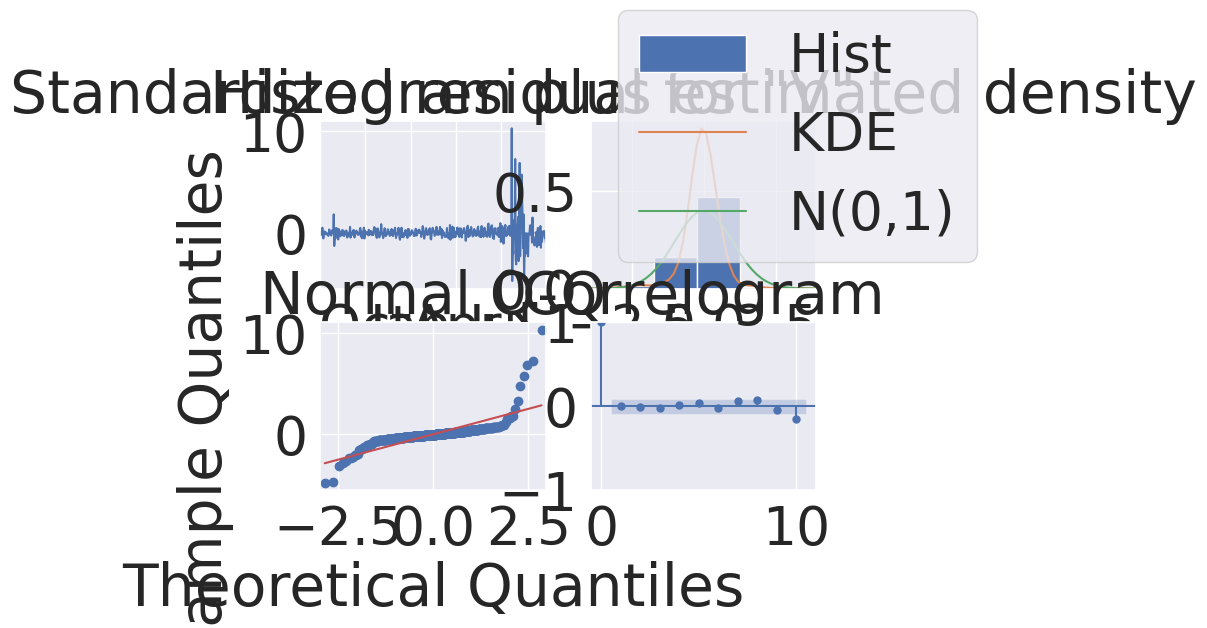

In [ ]:
plt.figure(figsize=(24,4))

arima_result.plot_diagnostics()
plt.show()

In [ ]:
arima_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Views   No. Observations:                  458
Model:               SARIMAX(3, 1, 6)   Log Likelihood               -1274.862
Date:                Wed, 26 Jul 2023   AIC                           2569.724
Time:                        01:12:09   BIC                           2610.971
Sample:                    07-01-2015   HQIC                          2585.971
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4163      0.058    -24.283      0.000      -1.531      -1.302
ar.L2         -0.6577      0.104     -6.322      0.000      -0.862      -0.454
ar.L3          0.0915      0.069      1.316      0.188      -0.045       0.228
ma.L1          0.9286      0.058     15.951      0.000       0.815       1.043
ma.L2         -0.1613      0.085     -1.901      0.057      -0.328       0.005
ma.L3         -0.4891      0.045    -10.933      0.000      -0.577      -0.401
ma.L4         -0.0566      0.059     -0.962      0.336      -0.172       0.059
ma.L5         -0.3137      0.040     -7.925      0.000      -0.391      -0.236
ma.L6         -0.4055      0.022    -18.829      0.000      -0.448      -0.363
sigma2        15.4247      0.254     60.748      0.000      14.927      15.922
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30591.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.59   Skew:                             3.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

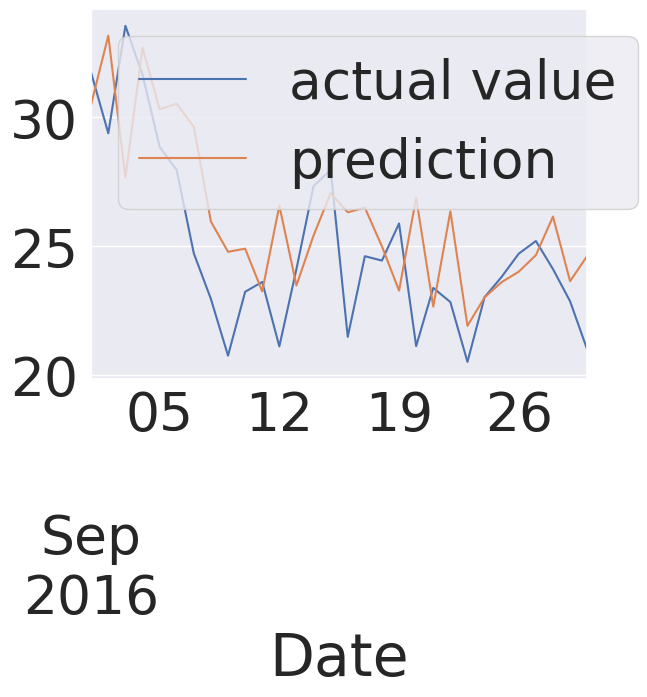

In [ ]:
fig,ax=plt.subplots()
train[-30:].rename(columns={'Views':'actual value'}).plot(ax=ax)
arima_forecast_mean[-30:].plot(ax=ax,label='prediction')
plt.legend()
plt.show()

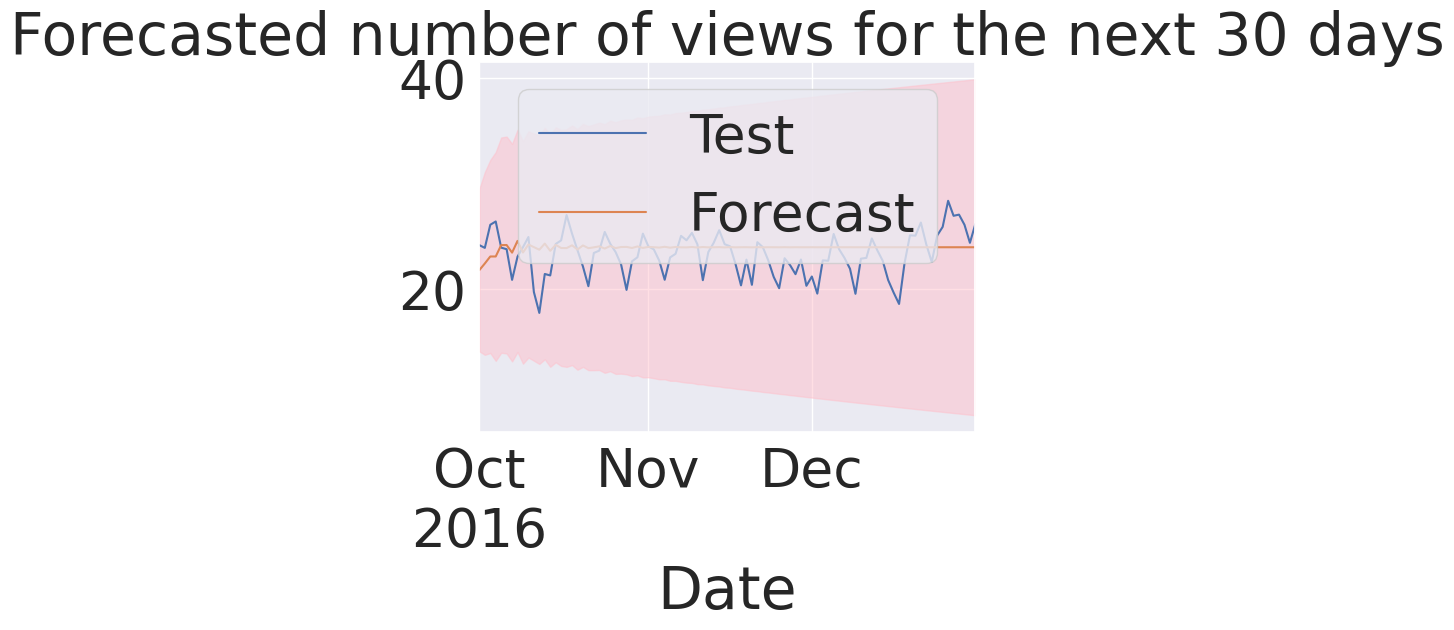

In [ ]:
# Forecasting using ARIMA moidel
arima_forecast_values = arima_result.get_forecast(steps=test.shape[0])
arima_forecast_mean = arima_forecast_values.predicted_mean
arima_conf_interval = arima_forecast_values.conf_int()

arima_forecast_df = pd.DataFrame({'Date':test.index,'Views':arima_forecast_values.predicted_mean,'lower_views':arima_conf_interval['lower Views'].values,'upper_views':arima_conf_interval['upper Views'].values})
arima_forecast_df = arima_forecast_df.set_index('Date')

fig,ax=plt.subplots()
test.rename(columns={'Views':'Test'}).plot(ax=ax)
arima_forecast_df[['Views']].rename(columns={'Views':'Forecast'}).plot(ax=ax)
plt.fill_between(arima_forecast_df.index, \
                arima_forecast_df.lower_views, \
                arima_forecast_df.upper_views, \
                color='pink', alpha=0.5)
plt.title('Forecasted number of views for the next 30 days')
plt.legend()
plt.show()

In [ ]:
rmse_values.append(('ARIMA',np.sqrt(np.mean(np.square(arima_forecast_df.Views.values - test.Views.values)))))


## 6. Exponential smoothing model


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


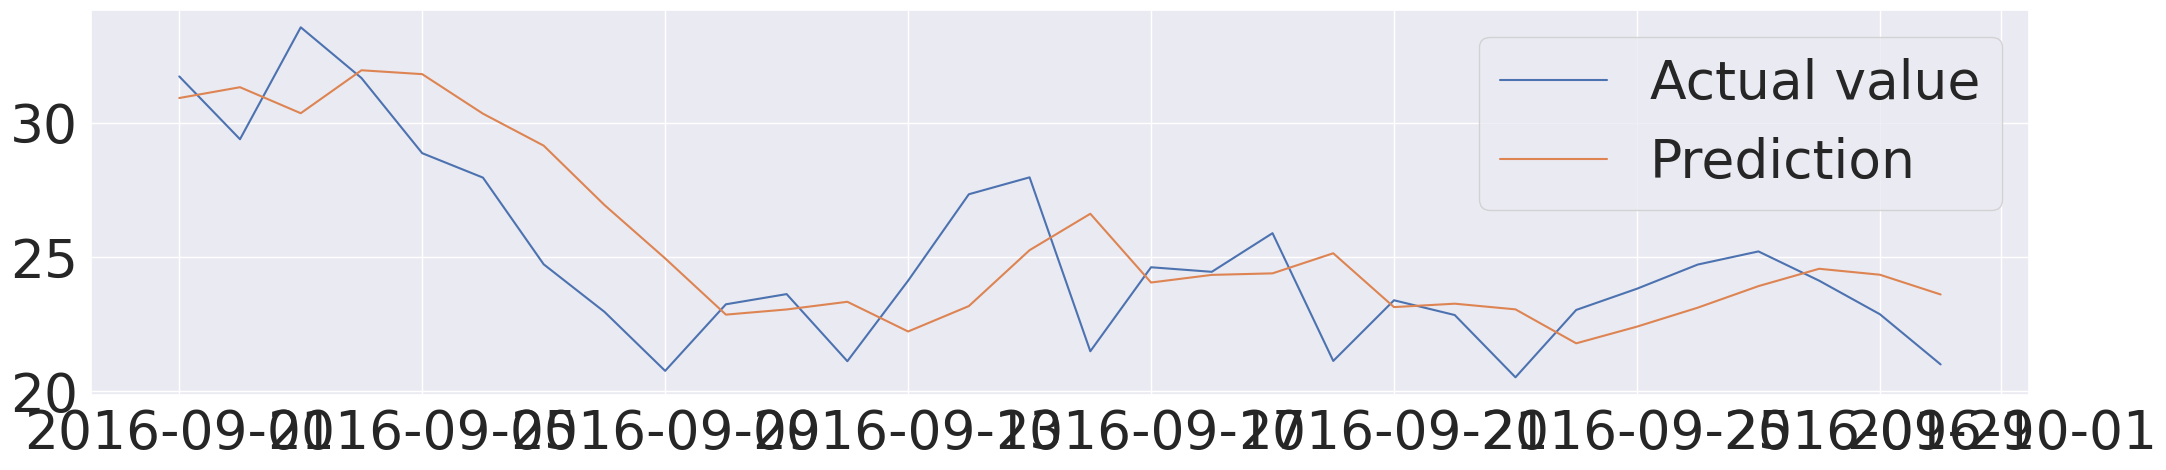

In [ ]:
exp_smoothing_model = SimpleExpSmoothing(train)
exp_smoothing_result = exp_smoothing_model.fit(smoothing_level=0.5,optimized=True)

# Prediction using Exponential Smoothing model
exp_smoothing_prediction = exp_smoothing_result.predict(start=train[-30:-29].index[0],end=train[-1:].index[0])

plt.figure(figsize=(25,5))
plt.plot(train[-30:], label='Actual value')
plt.plot(exp_smoothing_prediction, label='Prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
with open('exp_smoothing_model.pkl', 'wb') as f:
    pickle.dump(exp_smoothing_model, f)

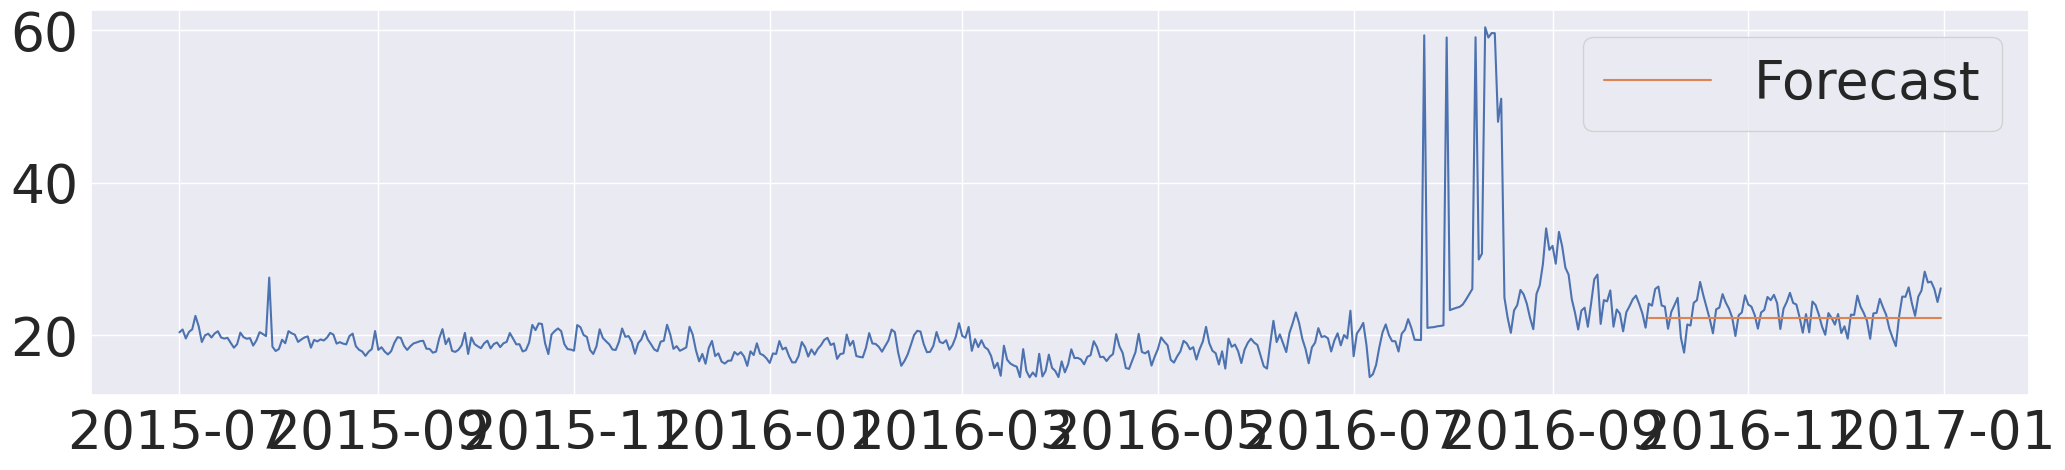

In [ ]:
# Forecasting using Exponential smoothing model
exp_smoothing_forecast = exp_smoothing_result.forecast(test.shape[0])
plt.figure(figsize=(25,5))

plt.plot(top_page_df)
plt.plot(exp_smoothing_forecast, label='Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse_values.append(('Exponential Smoothing',np.sqrt(np.mean(np.square(exp_smoothing_forecast.values - test.Views.values)))))


## 8. Auto Arima


Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2611.640, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2734.534, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2659.548, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2626.315, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2732.534, Time=0.02 sec


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2616.296, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2613.707, Time=0.18 sec


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2597.024, Time=0.34 sec


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2609.048, Time=0.27 sec


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2598.864, Time=0.41 sec


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2610.638, Time=0.32 sec


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2585.692, Time=0.79 sec


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=2593.754, Time=0.57 sec


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2596.524, Time=0.89 sec


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2598.824, Time=0.67 sec


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=2586.360, Time=0.94 sec


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0] intercept
Total fit time: 8.634 seconds


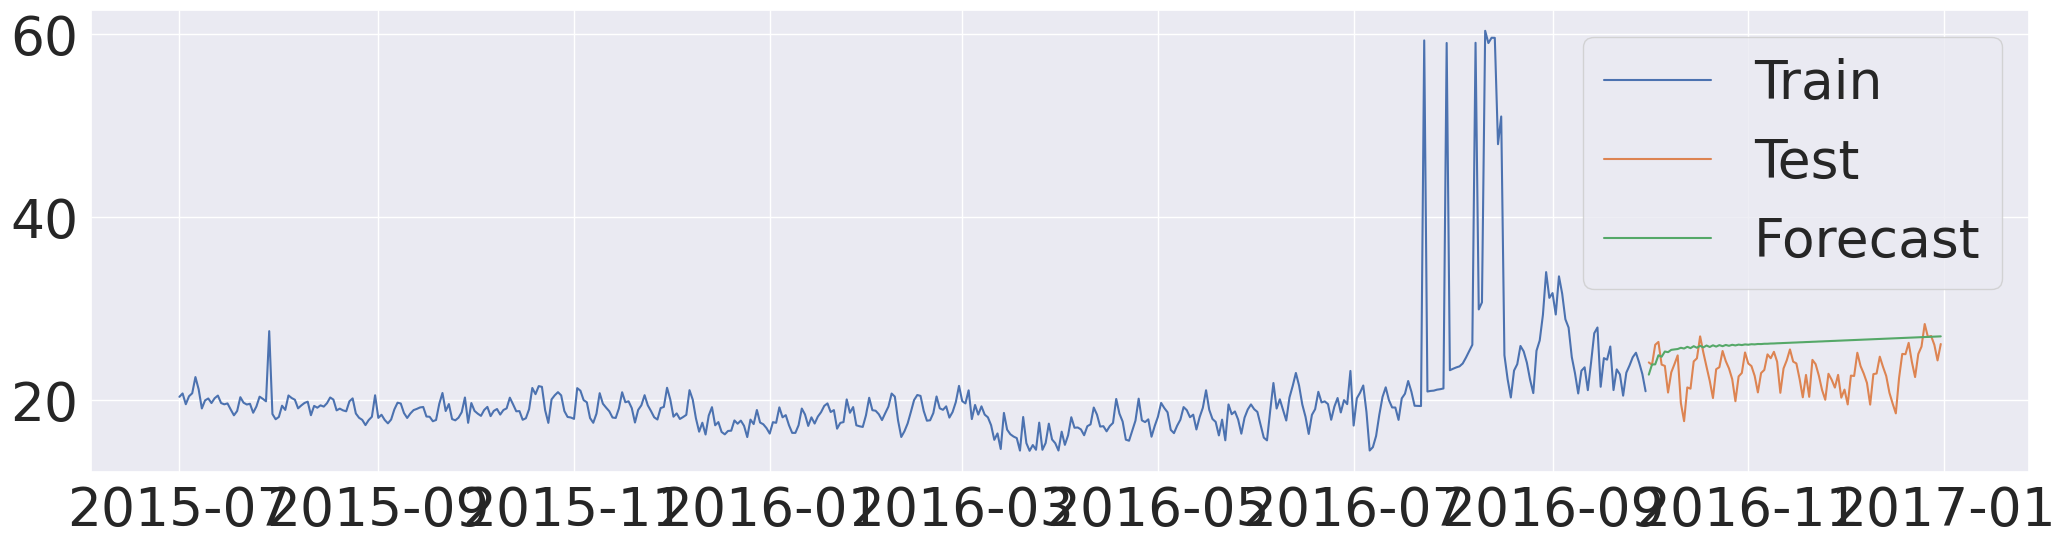

In [ ]:
auto_arima_model = auto_arima(train,start_p=2,max_p=7,start_q=2,max_q=7, m=1,stationary=False,trace=True, seasonal=False,error_action='ignore',suppress_warnings=True)
auto_arima_model.fit(train)

auto_arima_forecast = auto_arima_model.predict(n_periods=test.shape[0])
auto_arima_forecast = pd.DataFrame(auto_arima_forecast,index = test.index,columns=['Forecast'])

plt.figure(figsize=(25,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(auto_arima_forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
with open('auto_arima_model.pkl', 'wb') as f:
    pickle.dump(auto_arima_model, f)

In [ ]:
rmse_values.append(('Auto-arima',np.sqrt(np.mean(np.square(auto_arima_forecast.values - test.Views.values)))))


Compairing RMSE values

In [ ]:
# RMSE
rmse_df = pd.DataFrame(rmse_values,columns=['Model','RMSE_values']).sort_values('RMSE_values')
rmse_df

,Model,RMSE_values
0,ARMA,2.164011
1,ARIMA,2.215818
2,Exponential Smoothing,2.278368
3,Auto-arima,3.672823


## 9. LSTMs


In [ ]:
def transform_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10


In [ ]:
X_train, y_train = transform_dataset(train, train.Views, time_steps)
X_test, y_test = transform_dataset(test, test.Views, time_steps)

In [ ]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=256,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.RMSprop()
)

In [ ]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/200


 1/26 [>.............................] - ETA: 50s - loss: 363.8024

 5/26 [====>.........................] - ETA: 0s - loss: 201.7553 

10/26 [==========>...................] - ETA: 0s - loss: 117.1760

15/26 [================>.............] - ETA: 0s - loss: 79.1621 

20/26 [======================>.......] - ETA: 0s - loss: 60.0987

25/26 [===========================>..] - ETA: 0s - loss: 75.4419

26/26 [==============================] - 3s 33ms/step - loss: 83.1638 - val_loss: 19.9500


Epoch 2/200


 1/26 [>.............................] - ETA: 0s - loss: 7.6974

 6/26 [=====>........................] - ETA: 0s - loss: 9.4081

11/26 [===========>..................] - ETA: 0s - loss: 8.7313

16/26 [=================>............] - ETA: 0s - loss: 7.3611

21/26 [=======================>......] - ETA: 0s - loss: 6.2269

26/26 [==============================] - ETA: 0s - loss: 37.7127

26/26 [==============================] - 0s 14ms/step - loss: 37.7127 - val_loss: 18.4728


Epoch 3/200


 1/26 [>.............................] - ETA: 0s - loss: 7.3371

 6/26 [=====>........................] - ETA: 0s - loss: 6.9234

11/26 [===========>..................] - ETA: 0s - loss: 4.6998

16/26 [=================>............] - ETA: 0s - loss: 3.9821

20/26 [======================>.......] - ETA: 0s - loss: 3.6656

25/26 [===========================>..] - ETA: 0s - loss: 27.0176

26/26 [==============================] - 0s 14ms/step - loss: 33.5456 - val_loss: 13.1958


Epoch 4/200


 1/26 [>.............................] - ETA: 0s - loss: 16.1851

 6/26 [=====>........................] - ETA: 0s - loss: 9.6473 

11/26 [===========>..................] - ETA: 0s - loss: 6.0939

16/26 [=================>............] - ETA: 0s - loss: 4.9437

21/26 [=======================>......] - ETA: 0s - loss: 4.3109

26/26 [==============================] - ETA: 0s - loss: 32.9733

26/26 [==============================] - 0s 14ms/step - loss: 32.9733 - val_loss: 11.4338


Epoch 5/200


 1/26 [>.............................] - ETA: 0s - loss: 24.3233

 6/26 [=====>........................] - ETA: 0s - loss: 11.3953

11/26 [===========>..................] - ETA: 0s - loss: 7.0554 

16/26 [=================>............] - ETA: 0s - loss: 5.6125

21/26 [=======================>......] - ETA: 0s - loss: 4.7951

26/26 [==============================] - ETA: 0s - loss: 32.8774

26/26 [==============================] - 0s 14ms/step - loss: 32.8774 - val_loss: 11.8882


Epoch 6/200


 1/26 [>.............................] - ETA: 0s - loss: 29.9439

 6/26 [=====>........................] - ETA: 0s - loss: 14.9349

11/26 [===========>..................] - ETA: 0s - loss: 9.0561 

15/26 [================>.............] - ETA: 0s - loss: 7.0058

20/26 [======================>.......] - ETA: 0s - loss: 6.0116

25/26 [===========================>..] - ETA: 0s - loss: 26.2946

26/26 [==============================] - 0s 14ms/step - loss: 31.5926 - val_loss: 13.8185


Epoch 7/200


 1/26 [>.............................] - ETA: 0s - loss: 40.3634

 6/26 [=====>........................] - ETA: 0s - loss: 17.0186

10/26 [==========>...................] - ETA: 0s - loss: 10.8910

15/26 [================>.............] - ETA: 0s - loss: 7.7269 

20/26 [======================>.......] - ETA: 0s - loss: 6.5289

25/26 [===========================>..] - ETA: 0s - loss: 26.0126

26/26 [==============================] - 0s 14ms/step - loss: 30.9119 - val_loss: 15.7466


Epoch 8/200


 1/26 [>.............................] - ETA: 0s - loss: 45.5851

 6/26 [=====>........................] - ETA: 0s - loss: 16.7408

10/26 [==========>...................] - ETA: 0s - loss: 10.6952

14/26 [===============>..............] - ETA: 0s - loss: 8.0358 

19/26 [====================>.........] - ETA: 0s - loss: 6.6732

24/26 [==========================>...] - ETA: 0s - loss: 10.0725

26/26 [==============================] - 0s 15ms/step - loss: 29.8157 - val_loss: 18.7970


Epoch 9/200


 1/26 [>.............................] - ETA: 0s - loss: 51.2306

 5/26 [====>.........................] - ETA: 0s - loss: 19.7842

10/26 [==========>...................] - ETA: 0s - loss: 10.7035

14/26 [===============>..............] - ETA: 0s - loss: 8.0305 

18/26 [===================>..........] - ETA: 0s - loss: 6.9298

22/26 [========================>.....] - ETA: 0s - loss: 6.0803

26/26 [==============================] - 0s 14ms/step - loss: 28.9761 - val_loss: 23.2895


Epoch 10/200


 1/26 [>.............................] - ETA: 0s - loss: 59.5035

 6/26 [=====>........................] - ETA: 0s - loss: 17.7894

11/26 [===========>..................] - ETA: 0s - loss: 10.4135

16/26 [=================>............] - ETA: 0s - loss: 7.8676 

21/26 [=======================>......] - ETA: 0s - loss: 6.4554

26/26 [==============================] - ETA: 0s - loss: 28.5197

26/26 [==============================] - 0s 14ms/step - loss: 28.5197 - val_loss: 26.7508


Epoch 11/200


 1/26 [>.............................] - ETA: 0s - loss: 60.2779

 6/26 [=====>........................] - ETA: 0s - loss: 17.4778

11/26 [===========>..................] - ETA: 0s - loss: 10.2413

16/26 [=================>............] - ETA: 0s - loss: 7.7359 

21/26 [=======================>......] - ETA: 0s - loss: 6.3504

26/26 [==============================] - ETA: 0s - loss: 27.7124

26/26 [==============================] - 0s 13ms/step - loss: 27.7124 - val_loss: 31.8083


Epoch 12/200


 1/26 [>.............................] - ETA: 0s - loss: 64.1482

 6/26 [=====>........................] - ETA: 0s - loss: 17.8244

11/26 [===========>..................] - ETA: 0s - loss: 10.4158

16/26 [=================>............] - ETA: 0s - loss: 7.8471 

21/26 [=======================>......] - ETA: 0s - loss: 6.4220

26/26 [==============================] - ETA: 0s - loss: 27.2501

26/26 [==============================] - 0s 14ms/step - loss: 27.2501 - val_loss: 36.6572


Epoch 13/200


 1/26 [>.............................] - ETA: 0s - loss: 67.0005

 6/26 [=====>........................] - ETA: 0s - loss: 17.5621

11/26 [===========>..................] - ETA: 0s - loss: 10.2503

16/26 [=================>............] - ETA: 0s - loss: 7.7167 

21/26 [=======================>......] - ETA: 0s - loss: 6.3153

26/26 [==============================] - ETA: 0s - loss: 26.6758

26/26 [==============================] - 0s 14ms/step - loss: 26.6758 - val_loss: 41.8463


Epoch 14/200


 1/26 [>.............................] - ETA: 0s - loss: 69.0142

 6/26 [=====>........................] - ETA: 0s - loss: 17.7618

11/26 [===========>..................] - ETA: 0s - loss: 10.3431

16/26 [=================>............] - ETA: 0s - loss: 7.7719 

21/26 [=======================>......] - ETA: 0s - loss: 6.3482

26/26 [==============================] - ETA: 0s - loss: 26.0101

26/26 [==============================] - 0s 14ms/step - loss: 26.0101 - val_loss: 47.8875


Epoch 15/200


 1/26 [>.............................] - ETA: 0s - loss: 70.5427

 6/26 [=====>........................] - ETA: 0s - loss: 17.6640

11/26 [===========>..................] - ETA: 0s - loss: 10.2796

16/26 [=================>............] - ETA: 0s - loss: 7.7168 

20/26 [======================>.......] - ETA: 0s - loss: 6.5099

25/26 [===========================>..] - ETA: 0s - loss: 22.9348

26/26 [==============================] - 0s 14ms/step - loss: 25.4397 - val_loss: 56.0783


Epoch 16/200


 1/26 [>.............................] - ETA: 0s - loss: 73.0763

 6/26 [=====>........................] - ETA: 0s - loss: 17.9144

11/26 [===========>..................] - ETA: 0s - loss: 10.4120

16/26 [=================>............] - ETA: 0s - loss: 7.7923 

21/26 [=======================>......] - ETA: 0s - loss: 6.3534

26/26 [==============================] - ETA: 0s - loss: 25.0478

26/26 [==============================] - 0s 14ms/step - loss: 25.0478 - val_loss: 61.4601


Epoch 17/200


 1/26 [>.............................] - ETA: 0s - loss: 71.1148

 6/26 [=====>........................] - ETA: 0s - loss: 17.1003

10/26 [==========>...................] - ETA: 0s - loss: 10.8477

15/26 [================>.............] - ETA: 0s - loss: 7.6169 

20/26 [======================>.......] - ETA: 0s - loss: 6.3092

25/26 [===========================>..] - ETA: 0s - loss: 22.2654

26/26 [==============================] - 0s 14ms/step - loss: 24.3106 - val_loss: 71.1805


Epoch 18/200


 1/26 [>.............................] - ETA: 0s - loss: 74.0157

 6/26 [=====>........................] - ETA: 0s - loss: 17.3241

11/26 [===========>..................] - ETA: 0s - loss: 10.0803

16/26 [=================>............] - ETA: 0s - loss: 7.5563 

21/26 [=======================>......] - ETA: 0s - loss: 6.1617

26/26 [==============================] - ETA: 0s - loss: 23.9015

26/26 [==============================] - 0s 14ms/step - loss: 23.9015 - val_loss: 83.4315


Epoch 19/200


 1/26 [>.............................] - ETA: 0s - loss: 74.9849

 6/26 [=====>........................] - ETA: 0s - loss: 17.4475

11/26 [===========>..................] - ETA: 0s - loss: 10.1591

16/26 [=================>............] - ETA: 0s - loss: 7.6027 

21/26 [=======================>......] - ETA: 0s - loss: 6.1931

26/26 [==============================] - ETA: 0s - loss: 23.5002

26/26 [==============================] - 0s 14ms/step - loss: 23.5002 - val_loss: 90.5755


Epoch 20/200


 1/26 [>.............................] - ETA: 0s - loss: 77.7846

 5/26 [====>.........................] - ETA: 0s - loss: 21.2670

10/26 [==========>...................] - ETA: 0s - loss: 11.2884

15/26 [================>.............] - ETA: 0s - loss: 7.8922 

20/26 [======================>.......] - ETA: 0s - loss: 6.4901

25/26 [===========================>..] - ETA: 0s - loss: 21.7685

26/26 [==============================] - 0s 14ms/step - loss: 23.2897 - val_loss: 100.5011


Epoch 21/200


 1/26 [>.............................] - ETA: 0s - loss: 80.5450

 6/26 [=====>........................] - ETA: 0s - loss: 17.9681

11/26 [===========>..................] - ETA: 0s - loss: 10.4280

16/26 [=================>............] - ETA: 0s - loss: 7.7931 

21/26 [=======================>......] - ETA: 0s - loss: 6.3382

26/26 [==============================] - ETA: 0s - loss: 22.8824

26/26 [==============================] - 0s 14ms/step - loss: 22.8824 - val_loss: 111.0461


Epoch 22/200


 1/26 [>.............................] - ETA: 0s - loss: 75.8320

 5/26 [====>.........................] - ETA: 0s - loss: 20.8507

 9/26 [=========>....................] - ETA: 0s - loss: 12.0809

14/26 [===============>..............] - ETA: 0s - loss: 8.2378 

19/26 [====================>.........] - ETA: 0s - loss: 6.6784

24/26 [==========================>...] - ETA: 0s - loss: 10.1946

26/26 [==============================] - 0s 14ms/step - loss: 22.5046 - val_loss: 115.8439


Epoch 23/200


 1/26 [>.............................] - ETA: 0s - loss: 69.4548

 6/26 [=====>........................] - ETA: 0s - loss: 16.1263

11/26 [===========>..................] - ETA: 0s - loss: 9.4297 

16/26 [=================>............] - ETA: 0s - loss: 7.1193

20/26 [======================>.......] - ETA: 0s - loss: 6.0096

25/26 [===========================>..] - ETA: 0s - loss: 20.6446

26/26 [==============================] - 0s 14ms/step - loss: 21.6785 - val_loss: 128.7641


Epoch 24/200


 1/26 [>.............................] - ETA: 0s - loss: 74.1654

 6/26 [=====>........................] - ETA: 0s - loss: 17.1677

11/26 [===========>..................] - ETA: 0s - loss: 9.9883 

16/26 [=================>............] - ETA: 0s - loss: 7.5086

21/26 [=======================>......] - ETA: 0s - loss: 6.1230

26/26 [==============================] - ETA: 0s - loss: 21.6914

26/26 [==============================] - 0s 14ms/step - loss: 21.6914 - val_loss: 139.7792


Epoch 25/200


 1/26 [>.............................] - ETA: 0s - loss: 68.6069

 6/26 [=====>........................] - ETA: 0s - loss: 16.0530

11/26 [===========>..................] - ETA: 0s - loss: 9.3672 

16/26 [=================>............] - ETA: 0s - loss: 7.0986

21/26 [=======================>......] - ETA: 0s - loss: 5.8078

26/26 [==============================] - ETA: 0s - loss: 20.8049

26/26 [==============================] - 0s 14ms/step - loss: 20.8049 - val_loss: 153.0708


Epoch 26/200


 1/26 [>.............................] - ETA: 0s - loss: 74.4789

 6/26 [=====>........................] - ETA: 0s - loss: 16.8333

11/26 [===========>..................] - ETA: 0s - loss: 9.8137 

16/26 [=================>............] - ETA: 0s - loss: 7.3995

21/26 [=======================>......] - ETA: 0s - loss: 6.0329

26/26 [==============================] - ETA: 0s - loss: 20.6679

26/26 [==============================] - 0s 14ms/step - loss: 20.6679 - val_loss: 171.1344


Epoch 27/200


 1/26 [>.............................] - ETA: 0s - loss: 69.8238

 5/26 [====>.........................] - ETA: 0s - loss: 18.6576

 9/26 [=========>....................] - ETA: 0s - loss: 10.8675

14/26 [===============>..............] - ETA: 0s - loss: 7.4562 

19/26 [====================>.........] - ETA: 0s - loss: 6.0800

24/26 [==========================>...] - ETA: 0s - loss: 9.6739

26/26 [==============================] - 0s 15ms/step - loss: 19.9775 - val_loss: 153.1763


Epoch 28/200


 1/26 [>.............................] - ETA: 0s - loss: 65.5732

 5/26 [====>.........................] - ETA: 0s - loss: 18.9807

 9/26 [=========>....................] - ETA: 0s - loss: 11.0443

14/26 [===============>..............] - ETA: 0s - loss: 7.5718 

19/26 [====================>.........] - ETA: 0s - loss: 6.1795

24/26 [==========================>...] - ETA: 0s - loss: 9.7669

26/26 [==============================] - 0s 14ms/step - loss: 20.3329 - val_loss: 181.3822


Epoch 29/200


 1/26 [>.............................] - ETA: 0s - loss: 45.6657

 5/26 [====>.........................] - ETA: 0s - loss: 14.2162

10/26 [==========>...................] - ETA: 0s - loss: 7.7903 

15/26 [================>.............] - ETA: 0s - loss: 5.5769

20/26 [======================>.......] - ETA: 0s - loss: 4.7809

25/26 [===========================>..] - ETA: 0s - loss: 19.4736

26/26 [==============================] - 0s 14ms/step - loss: 19.9132 - val_loss: 139.7493


Epoch 30/200


 1/26 [>.............................] - ETA: 0s - loss: 42.2340

 6/26 [=====>........................] - ETA: 0s - loss: 12.6115

11/26 [===========>..................] - ETA: 0s - loss: 7.5029 

16/26 [=================>............] - ETA: 0s - loss: 5.7704

21/26 [=======================>......] - ETA: 0s - loss: 4.7938

26/26 [==============================] - ETA: 0s - loss: 18.5586

26/26 [==============================] - 0s 14ms/step - loss: 18.5586 - val_loss: 144.4592


Epoch 31/200


 1/26 [>.............................] - ETA: 0s - loss: 44.0790

 6/26 [=====>........................] - ETA: 0s - loss: 10.2537

11/26 [===========>..................] - ETA: 0s - loss: 6.2397 

16/26 [=================>............] - ETA: 0s - loss: 4.9497

21/26 [=======================>......] - ETA: 0s - loss: 4.1717

26/26 [==============================] - ETA: 0s - loss: 20.1907

26/26 [==============================] - 0s 14ms/step - loss: 20.1907 - val_loss: 145.5913


Epoch 32/200


 1/26 [>.............................] - ETA: 0s - loss: 35.5865

 6/26 [=====>........................] - ETA: 0s - loss: 8.9910 

11/26 [===========>..................] - ETA: 0s - loss: 5.5540

16/26 [=================>............] - ETA: 0s - loss: 4.5856

21/26 [=======================>......] - ETA: 0s - loss: 3.9132

26/26 [==============================] - ETA: 0s - loss: 18.4078

26/26 [==============================] - 0s 14ms/step - loss: 18.4078 - val_loss: 175.2755


Epoch 33/200


 1/26 [>.............................] - ETA: 0s - loss: 39.5395

 6/26 [=====>........................] - ETA: 0s - loss: 11.3728

11/26 [===========>..................] - ETA: 0s - loss: 6.8112 

16/26 [=================>............] - ETA: 0s - loss: 5.2849

21/26 [=======================>......] - ETA: 0s - loss: 4.4153

26/26 [==============================] - ETA: 0s - loss: 17.5020

26/26 [==============================] - 0s 14ms/step - loss: 17.5020 - val_loss: 123.1848


Epoch 34/200


 1/26 [>.............................] - ETA: 0s - loss: 38.0129

 6/26 [=====>........................] - ETA: 0s - loss: 8.7635 

11/26 [===========>..................] - ETA: 0s - loss: 5.3924

16/26 [=================>............] - ETA: 0s - loss: 4.3546

21/26 [=======================>......] - ETA: 0s - loss: 3.7045

26/26 [==============================] - ETA: 0s - loss: 16.2030

26/26 [==============================] - 0s 14ms/step - loss: 16.2030 - val_loss: 320.0493


Epoch 35/200


 1/26 [>.............................] - ETA: 0s - loss: 60.1199

 6/26 [=====>........................] - ETA: 0s - loss: 14.0213

11/26 [===========>..................] - ETA: 0s - loss: 8.2480 

16/26 [=================>............] - ETA: 0s - loss: 6.2762

21/26 [=======================>......] - ETA: 0s - loss: 5.1710

26/26 [==============================] - ETA: 0s - loss: 17.2982

26/26 [==============================] - 0s 14ms/step - loss: 17.2982 - val_loss: 127.8162


Epoch 36/200


 1/26 [>.............................] - ETA: 0s - loss: 37.1002

 6/26 [=====>........................] - ETA: 0s - loss: 8.5428 

11/26 [===========>..................] - ETA: 0s - loss: 5.2558

16/26 [=================>............] - ETA: 0s - loss: 4.2365

21/26 [=======================>......] - ETA: 0s - loss: 3.6127

26/26 [==============================] - ETA: 0s - loss: 15.5093

26/26 [==============================] - 0s 13ms/step - loss: 15.5093 - val_loss: 371.8824


Epoch 37/200


 1/26 [>.............................] - ETA: 0s - loss: 74.7087

 6/26 [=====>........................] - ETA: 0s - loss: 17.0125

11/26 [===========>..................] - ETA: 0s - loss: 9.8809 

16/26 [=================>............] - ETA: 0s - loss: 7.3785

21/26 [=======================>......] - ETA: 0s - loss: 6.0173

26/26 [==============================] - ETA: 0s - loss: 17.5425

26/26 [==============================] - 0s 14ms/step - loss: 17.5425 - val_loss: 136.2631


Epoch 38/200


 1/26 [>.............................] - ETA: 0s - loss: 32.4406

 6/26 [=====>........................] - ETA: 0s - loss: 7.6638 

11/26 [===========>..................] - ETA: 0s - loss: 4.7664

16/26 [=================>............] - ETA: 0s - loss: 3.8713

21/26 [=======================>......] - ETA: 0s - loss: 3.3299

26/26 [==============================] - ETA: 0s - loss: 16.0151

26/26 [==============================] - 0s 14ms/step - loss: 16.0151 - val_loss: 247.4405


Epoch 39/200


 1/26 [>.............................] - ETA: 0s - loss: 44.1951

 6/26 [=====>........................] - ETA: 0s - loss: 11.4362

11/26 [===========>..................] - ETA: 0s - loss: 6.8174 

16/26 [=================>............] - ETA: 0s - loss: 5.2554

21/26 [=======================>......] - ETA: 0s - loss: 4.3768

26/26 [==============================] - ETA: 0s - loss: 18.1570

26/26 [==============================] - 0s 14ms/step - loss: 18.1570 - val_loss: 144.2735


Epoch 40/200


 1/26 [>.............................] - ETA: 0s - loss: 27.6012

 6/26 [=====>........................] - ETA: 0s - loss: 7.0122 

11/26 [===========>..................] - ETA: 0s - loss: 4.5981

16/26 [=================>............] - ETA: 0s - loss: 3.7751

21/26 [=======================>......] - ETA: 0s - loss: 3.2722

26/26 [==============================] - ETA: 0s - loss: 18.3249

26/26 [==============================] - 0s 14ms/step - loss: 18.3249 - val_loss: 94.9089


Epoch 41/200


 1/26 [>.............................] - ETA: 0s - loss: 19.7464

 6/26 [=====>........................] - ETA: 0s - loss: 5.7139 

11/26 [===========>..................] - ETA: 0s - loss: 3.6774

16/26 [=================>............] - ETA: 0s - loss: 3.0838

21/26 [=======================>......] - ETA: 0s - loss: 2.7286

26/26 [==============================] - ETA: 0s - loss: 15.7880

26/26 [==============================] - 0s 14ms/step - loss: 15.7880 - val_loss: 140.8537


Epoch 42/200


 1/26 [>.............................] - ETA: 0s - loss: 28.0296

 6/26 [=====>........................] - ETA: 0s - loss: 6.9007 

11/26 [===========>..................] - ETA: 0s - loss: 4.4194

16/26 [=================>............] - ETA: 0s - loss: 3.6745

21/26 [=======================>......] - ETA: 0s - loss: 3.1762

26/26 [==============================] - ETA: 0s - loss: 18.1527

26/26 [==============================] - 0s 14ms/step - loss: 18.1527 - val_loss: 90.6713


Epoch 43/200


 1/26 [>.............................] - ETA: 0s - loss: 19.2592

 6/26 [=====>........................] - ETA: 0s - loss: 5.7594 

11/26 [===========>..................] - ETA: 0s - loss: 3.6956

15/26 [================>.............] - ETA: 0s - loss: 2.9955

20/26 [======================>.......] - ETA: 0s - loss: 2.7811

25/26 [===========================>..] - ETA: 0s - loss: 15.5048

26/26 [==============================] - 0s 14ms/step - loss: 15.5632 - val_loss: 108.1025


Epoch 44/200


 1/26 [>.............................] - ETA: 0s - loss: 24.5935

 6/26 [=====>........................] - ETA: 0s - loss: 6.2739 

11/26 [===========>..................] - ETA: 0s - loss: 3.9794

16/26 [=================>............] - ETA: 0s - loss: 3.3273

21/26 [=======================>......] - ETA: 0s - loss: 2.9098

26/26 [==============================] - ETA: 0s - loss: 15.9191

26/26 [==============================] - 0s 14ms/step - loss: 15.9191 - val_loss: 136.0617


Epoch 45/200


 1/26 [>.............................] - ETA: 0s - loss: 29.8540

 6/26 [=====>........................] - ETA: 0s - loss: 7.9063 

11/26 [===========>..................] - ETA: 0s - loss: 4.9009

16/26 [=================>............] - ETA: 0s - loss: 3.9683

21/26 [=======================>......] - ETA: 0s - loss: 3.4004

26/26 [==============================] - ETA: 0s - loss: 17.9331

26/26 [==============================] - 0s 15ms/step - loss: 17.9331 - val_loss: 83.0058


Epoch 46/200


 1/26 [>.............................] - ETA: 0s - loss: 16.9641

 6/26 [=====>........................] - ETA: 0s - loss: 5.0332 

11/26 [===========>..................] - ETA: 0s - loss: 3.2926

16/26 [=================>............] - ETA: 0s - loss: 2.8261

21/26 [=======================>......] - ETA: 0s - loss: 2.5275

26/26 [==============================] - ETA: 0s - loss: 14.8961

26/26 [==============================] - 0s 14ms/step - loss: 14.8961 - val_loss: 123.5159


Epoch 47/200


 1/26 [>.............................] - ETA: 0s - loss: 26.8559

 6/26 [=====>........................] - ETA: 0s - loss: 6.9899 

11/26 [===========>..................] - ETA: 0s - loss: 4.3855

16/26 [=================>............] - ETA: 0s - loss: 3.5875

21/26 [=======================>......] - ETA: 0s - loss: 3.0911

26/26 [==============================] - ETA: 0s - loss: 17.8611

26/26 [==============================] - 0s 14ms/step - loss: 17.8611 - val_loss: 83.9516


Epoch 48/200


 1/26 [>.............................] - ETA: 0s - loss: 14.0597

 6/26 [=====>........................] - ETA: 0s - loss: 4.5326 

11/26 [===========>..................] - ETA: 0s - loss: 3.0245

16/26 [=================>............] - ETA: 0s - loss: 2.6410

21/26 [=======================>......] - ETA: 0s - loss: 2.3921

26/26 [==============================] - ETA: 0s - loss: 15.1387

26/26 [==============================] - 0s 14ms/step - loss: 15.1387 - val_loss: 124.2362


Epoch 49/200


 1/26 [>.............................] - ETA: 0s - loss: 23.0479

 6/26 [=====>........................] - ETA: 0s - loss: 6.2643 

11/26 [===========>..................] - ETA: 0s - loss: 3.9428

16/26 [=================>............] - ETA: 0s - loss: 3.2674

21/26 [=======================>......] - ETA: 0s - loss: 2.8496

26/26 [==============================] - ETA: 0s - loss: 16.4935

26/26 [==============================] - 0s 13ms/step - loss: 16.4935 - val_loss: 95.2378


Epoch 50/200


 1/26 [>.............................] - ETA: 0s - loss: 17.4803

 6/26 [=====>........................] - ETA: 0s - loss: 5.2416 

11/26 [===========>..................] - ETA: 0s - loss: 3.3906

16/26 [=================>............] - ETA: 0s - loss: 2.8819

21/26 [=======================>......] - ETA: 0s - loss: 2.5680

26/26 [==============================] - ETA: 0s - loss: 14.9805

26/26 [==============================] - 0s 14ms/step - loss: 14.9805 - val_loss: 91.3017


Epoch 51/200


 1/26 [>.............................] - ETA: 0s - loss: 18.5997

 6/26 [=====>........................] - ETA: 0s - loss: 5.0262 

11/26 [===========>..................] - ETA: 0s - loss: 3.3038

16/26 [=================>............] - ETA: 0s - loss: 2.8661

21/26 [=======================>......] - ETA: 0s - loss: 2.5610

26/26 [==============================] - ETA: 0s - loss: 13.8935

26/26 [==============================] - 0s 13ms/step - loss: 13.8935 - val_loss: 86.8047


Epoch 52/200


 1/26 [>.............................] - ETA: 0s - loss: 23.5436

 6/26 [=====>........................] - ETA: 0s - loss: 5.9115 

11/26 [===========>..................] - ETA: 0s - loss: 3.7924

16/26 [=================>............] - ETA: 0s - loss: 3.2113

21/26 [=======================>......] - ETA: 0s - loss: 2.8230

26/26 [==============================] - ETA: 0s - loss: 14.2018

26/26 [==============================] - 0s 14ms/step - loss: 14.2018 - val_loss: 202.0577


Epoch 53/200


 1/26 [>.............................] - ETA: 0s - loss: 57.3627

 6/26 [=====>........................] - ETA: 0s - loss: 12.6306

11/26 [===========>..................] - ETA: 0s - loss: 7.7488 

16/26 [=================>............] - ETA: 0s - loss: 6.2047

21/26 [=======================>......] - ETA: 0s - loss: 5.1561

26/26 [==============================] - ETA: 0s - loss: 20.2522

26/26 [==============================] - 0s 13ms/step - loss: 20.2522 - val_loss: 71.5786


Epoch 54/200


 1/26 [>.............................] - ETA: 0s - loss: 10.5030

 6/26 [=====>........................] - ETA: 0s - loss: 3.6132 

11/26 [===========>..................] - ETA: 0s - loss: 2.5363

16/26 [=================>............] - ETA: 0s - loss: 2.3051

21/26 [=======================>......] - ETA: 0s - loss: 2.1334

25/26 [===========================>..] - ETA: 0s - loss: 14.0243

26/26 [==============================] - 0s 14ms/step - loss: 14.1025 - val_loss: 84.0994


Epoch 55/200


 1/26 [>.............................] - ETA: 0s - loss: 17.3057

 6/26 [=====>........................] - ETA: 0s - loss: 4.8901 

11/26 [===========>..................] - ETA: 0s - loss: 3.2267

16/26 [=================>............] - ETA: 0s - loss: 2.8052

21/26 [=======================>......] - ETA: 0s - loss: 2.5093

26/26 [==============================] - ETA: 0s - loss: 13.5350

26/26 [==============================] - 0s 14ms/step - loss: 13.5350 - val_loss: 54.3632


Epoch 56/200


 1/26 [>.............................] - ETA: 0s - loss: 16.7068

 6/26 [=====>........................] - ETA: 0s - loss: 4.5187 

11/26 [===========>..................] - ETA: 0s - loss: 3.0160

16/26 [=================>............] - ETA: 0s - loss: 2.6719

21/26 [=======================>......] - ETA: 0s - loss: 2.4053

26/26 [==============================] - ETA: 0s - loss: 15.1645

26/26 [==============================] - 0s 14ms/step - loss: 15.1645 - val_loss: 124.6812


Epoch 57/200


 1/26 [>.............................] - ETA: 0s - loss: 46.6675

 6/26 [=====>........................] - ETA: 0s - loss: 10.6002

11/26 [===========>..................] - ETA: 0s - loss: 6.3332 

16/26 [=================>............] - ETA: 0s - loss: 4.9031

21/26 [=======================>......] - ETA: 0s - loss: 4.1137

26/26 [==============================] - ETA: 0s - loss: 15.3418

26/26 [==============================] - 0s 14ms/step - loss: 15.3418 - val_loss: 41.4897


Epoch 58/200


 1/26 [>.............................] - ETA: 0s - loss: 12.3505

 6/26 [=====>........................] - ETA: 0s - loss: 3.8176 

11/26 [===========>..................] - ETA: 0s - loss: 2.6441

16/26 [=================>............] - ETA: 0s - loss: 2.4124

21/26 [=======================>......] - ETA: 0s - loss: 2.2134

26/26 [==============================] - ETA: 0s - loss: 15.1869

26/26 [==============================] - 0s 14ms/step - loss: 15.1869 - val_loss: 108.9586


Epoch 59/200


 1/26 [>.............................] - ETA: 0s - loss: 39.3267

 6/26 [=====>........................] - ETA: 0s - loss: 9.6023 

11/26 [===========>..................] - ETA: 0s - loss: 5.7911

16/26 [=================>............] - ETA: 0s - loss: 4.5239

21/26 [=======================>......] - ETA: 0s - loss: 3.8214

26/26 [==============================] - ETA: 0s - loss: 14.6140

26/26 [==============================] - 0s 14ms/step - loss: 14.6140 - val_loss: 83.3437


Epoch 60/200


 1/26 [>.............................] - ETA: 0s - loss: 20.8254

 6/26 [=====>........................] - ETA: 0s - loss: 5.1796 

11/26 [===========>..................] - ETA: 0s - loss: 3.3716

16/26 [=================>............] - ETA: 0s - loss: 2.8989

21/26 [=======================>......] - ETA: 0s - loss: 2.5772

25/26 [===========================>..] - ETA: 0s - loss: 13.2276

26/26 [==============================] - 0s 14ms/step - loss: 13.3118 - val_loss: 157.4852


Epoch 61/200


 1/26 [>.............................] - ETA: 0s - loss: 48.5498

 6/26 [=====>........................] - ETA: 0s - loss: 11.1457

11/26 [===========>..................] - ETA: 0s - loss: 6.6021 

16/26 [=================>............] - ETA: 0s - loss: 5.0870

21/26 [=======================>......] - ETA: 0s - loss: 4.2424

26/26 [==============================] - ETA: 0s - loss: 15.7403

26/26 [==============================] - 0s 14ms/step - loss: 15.7403 - val_loss: 76.2098


Epoch 62/200


 1/26 [>.............................] - ETA: 0s - loss: 43.9909

 5/26 [====>.........................] - ETA: 0s - loss: 10.6552

10/26 [==========>...................] - ETA: 0s - loss: 5.9162 

15/26 [================>.............] - ETA: 0s - loss: 4.2675

19/26 [====================>.........] - ETA: 0s - loss: 3.8756

23/26 [=========================>....] - ETA: 0s - loss: 3.6301

26/26 [==============================] - 0s 14ms/step - loss: 15.9225 - val_loss: 143.7821


Epoch 63/200


 1/26 [>.............................] - ETA: 0s - loss: 53.9567

 5/26 [====>.........................] - ETA: 0s - loss: 13.7160

 9/26 [=========>....................] - ETA: 0s - loss: 8.0441 

13/26 [==============>...............] - ETA: 0s - loss: 5.8938

17/26 [==================>...........] - ETA: 0s - loss: 5.0410

21/26 [=======================>......] - ETA: 0s - loss: 4.3483

25/26 [===========================>..] - ETA: 0s - loss: 15.2497

26/26 [==============================] - 0s 15ms/step - loss: 15.3180 - val_loss: 78.9324


Epoch 64/200


 1/26 [>.............................] - ETA: 0s - loss: 18.7935

 5/26 [====>.........................] - ETA: 0s - loss: 5.6758 

 9/26 [=========>....................] - ETA: 0s - loss: 3.5834

13/26 [==============>...............] - ETA: 0s - loss: 2.8134

17/26 [==================>...........] - ETA: 0s - loss: 2.7051

21/26 [=======================>......] - ETA: 0s - loss: 2.4658

25/26 [===========================>..] - ETA: 0s - loss: 13.2072

26/26 [==============================] - 0s 15ms/step - loss: 13.2860 - val_loss: 141.8797


Epoch 65/200


 1/26 [>.............................] - ETA: 0s - loss: 43.0053

 6/26 [=====>........................] - ETA: 0s - loss: 9.1116 

11/26 [===========>..................] - ETA: 0s - loss: 5.5267

15/26 [================>.............] - ETA: 0s - loss: 4.3147

19/26 [====================>.........] - ETA: 0s - loss: 3.9212

24/26 [==========================>...] - ETA: 0s - loss: 7.7400

26/26 [==============================] - 0s 17ms/step - loss: 14.6208 - val_loss: 186.2923


Epoch 66/200


 1/26 [>.............................] - ETA: 0s - loss: 53.0489

 6/26 [=====>........................] - ETA: 0s - loss: 11.1642

10/26 [==========>...................] - ETA: 0s - loss: 7.2014 

14/26 [===============>..............] - ETA: 0s - loss: 5.3790

19/26 [====================>.........] - ETA: 0s - loss: 4.5226

24/26 [==========================>...] - ETA: 0s - loss: 8.2187

26/26 [==============================] - 0s 14ms/step - loss: 14.8591 - val_loss: 48.6338


Epoch 67/200


 1/26 [>.............................] - ETA: 0s - loss: 11.0990

 6/26 [=====>........................] - ETA: 0s - loss: 3.5127 

11/26 [===========>..................] - ETA: 0s - loss: 2.4580

16/26 [=================>............] - ETA: 0s - loss: 2.2665

21/26 [=======================>......] - ETA: 0s - loss: 2.0826

26/26 [==============================] - ETA: 0s - loss: 14.8304

26/26 [==============================] - 0s 14ms/step - loss: 14.8304 - val_loss: 141.0867


Epoch 68/200


 1/26 [>.............................] - ETA: 0s - loss: 53.5192

 6/26 [=====>........................] - ETA: 0s - loss: 11.8664

11/26 [===========>..................] - ETA: 0s - loss: 7.0101 

16/26 [=================>............] - ETA: 0s - loss: 5.3483

21/26 [=======================>......] - ETA: 0s - loss: 4.4329

26/26 [==============================] - ETA: 0s - loss: 14.8115

26/26 [==============================] - 0s 14ms/step - loss: 14.8115 - val_loss: 115.0875


Epoch 69/200


 1/26 [>.............................] - ETA: 0s - loss: 21.0301

 6/26 [=====>........................] - ETA: 0s - loss: 5.1769 

11/26 [===========>..................] - ETA: 0s - loss: 3.3651

16/26 [=================>............] - ETA: 0s - loss: 2.8789

21/26 [=======================>......] - ETA: 0s - loss: 2.5497

26/26 [==============================] - ETA: 0s - loss: 12.9149

26/26 [==============================] - 0s 14ms/step - loss: 12.9149 - val_loss: 82.3616


Epoch 70/200


 1/26 [>.............................] - ETA: 0s - loss: 16.8384

 6/26 [=====>........................] - ETA: 0s - loss: 4.2990 

11/26 [===========>..................] - ETA: 0s - loss: 2.8791

16/26 [=================>............] - ETA: 0s - loss: 2.5606

21/26 [=======================>......] - ETA: 0s - loss: 2.3040

26/26 [==============================] - ETA: 0s - loss: 14.5004

26/26 [==============================] - 0s 14ms/step - loss: 14.5004 - val_loss: 162.0516


Epoch 71/200


 1/26 [>.............................] - ETA: 0s - loss: 57.6500

 6/26 [=====>........................] - ETA: 0s - loss: 12.1108

11/26 [===========>..................] - ETA: 0s - loss: 7.1783 

16/26 [=================>............] - ETA: 0s - loss: 5.4854

21/26 [=======================>......] - ETA: 0s - loss: 4.5554

26/26 [==============================] - ETA: 0s - loss: 14.4972

26/26 [==============================] - 0s 14ms/step - loss: 14.4972 - val_loss: 83.4971


Epoch 72/200


 1/26 [>.............................] - ETA: 0s - loss: 9.7039

 5/26 [====>.........................] - ETA: 0s - loss: 3.6246

10/26 [==========>...................] - ETA: 0s - loss: 2.4094

15/26 [================>.............] - ETA: 0s - loss: 1.8988

20/26 [======================>.......] - ETA: 0s - loss: 1.9902

25/26 [===========================>..] - ETA: 0s - loss: 12.3738

26/26 [==============================] - 0s 14ms/step - loss: 12.4388 - val_loss: 221.0575


Epoch 73/200


 1/26 [>.............................] - ETA: 0s - loss: 77.7153

 6/26 [=====>........................] - ETA: 0s - loss: 15.3510

11/26 [===========>..................] - ETA: 0s - loss: 8.9020 

16/26 [=================>............] - ETA: 0s - loss: 6.6537

21/26 [=======================>......] - ETA: 0s - loss: 5.4282

26/26 [==============================] - ETA: 0s - loss: 15.1395

26/26 [==============================] - 0s 14ms/step - loss: 15.1395 - val_loss: 57.0185


Epoch 74/200


 1/26 [>.............................] - ETA: 0s - loss: 9.8144

 6/26 [=====>........................] - ETA: 0s - loss: 3.2489

11/26 [===========>..................] - ETA: 0s - loss: 2.3175

16/26 [=================>............] - ETA: 0s - loss: 2.1706

21/26 [=======================>......] - ETA: 0s - loss: 2.0071

26/26 [==============================] - ETA: 0s - loss: 13.0390

26/26 [==============================] - 0s 13ms/step - loss: 13.0390 - val_loss: 217.2000


Epoch 75/200


 1/26 [>.............................] - ETA: 0s - loss: 59.5808

 6/26 [=====>........................] - ETA: 0s - loss: 12.6714

11/26 [===========>..................] - ETA: 0s - loss: 7.4312 

16/26 [=================>............] - ETA: 0s - loss: 5.6311

21/26 [=======================>......] - ETA: 0s - loss: 4.6456

26/26 [==============================] - ETA: 0s - loss: 14.1434

26/26 [==============================] - 0s 14ms/step - loss: 14.1434 - val_loss: 79.5458


Epoch 76/200


 1/26 [>.............................] - ETA: 0s - loss: 6.9961

 6/26 [=====>........................] - ETA: 0s - loss: 2.6448

11/26 [===========>..................] - ETA: 0s - loss: 2.0024

16/26 [=================>............] - ETA: 0s - loss: 1.9883

21/26 [=======================>......] - ETA: 0s - loss: 1.8771

26/26 [==============================] - ETA: 0s - loss: 12.4509

26/26 [==============================] - 0s 14ms/step - loss: 12.4509 - val_loss: 227.5877


Epoch 77/200


 1/26 [>.............................] - ETA: 0s - loss: 60.6456

 6/26 [=====>........................] - ETA: 0s - loss: 12.7225

11/26 [===========>..................] - ETA: 0s - loss: 7.4597 

16/26 [=================>............] - ETA: 0s - loss: 5.6569

21/26 [=======================>......] - ETA: 0s - loss: 4.6698

26/26 [==============================] - ETA: 0s - loss: 14.0249

26/26 [==============================] - 0s 14ms/step - loss: 14.0249 - val_loss: 76.4423


Epoch 78/200


 1/26 [>.............................] - ETA: 0s - loss: 5.8721

 6/26 [=====>........................] - ETA: 0s - loss: 2.4857

11/26 [===========>..................] - ETA: 0s - loss: 1.9152

16/26 [=================>............] - ETA: 0s - loss: 1.9268

21/26 [=======================>......] - ETA: 0s - loss: 1.8271

26/26 [==============================] - ETA: 0s - loss: 12.1949

26/26 [==============================] - 0s 14ms/step - loss: 12.1949 - val_loss: 241.9181


Epoch 79/200


 1/26 [>.............................] - ETA: 0s - loss: 55.7721

 6/26 [=====>........................] - ETA: 0s - loss: 11.7861

11/26 [===========>..................] - ETA: 0s - loss: 6.9684 

16/26 [=================>............] - ETA: 0s - loss: 5.3296

21/26 [=======================>......] - ETA: 0s - loss: 4.4269

26/26 [==============================] - ETA: 0s - loss: 13.5963

26/26 [==============================] - 0s 14ms/step - loss: 13.5963 - val_loss: 74.3866


Epoch 80/200


 1/26 [>.............................] - ETA: 0s - loss: 5.2372

 6/26 [=====>........................] - ETA: 0s - loss: 2.3689

11/26 [===========>..................] - ETA: 0s - loss: 1.8545

16/26 [=================>............] - ETA: 0s - loss: 1.8967

21/26 [=======================>......] - ETA: 0s - loss: 1.8035

26/26 [==============================] - ETA: 0s - loss: 12.0325

26/26 [==============================] - 0s 14ms/step - loss: 12.0325 - val_loss: 241.6072


Epoch 81/200


 1/26 [>.............................] - ETA: 0s - loss: 48.7794

 6/26 [=====>........................] - ETA: 0s - loss: 10.4149

11/26 [===========>..................] - ETA: 0s - loss: 6.2260 

16/26 [=================>............] - ETA: 0s - loss: 4.8280

21/26 [=======================>......] - ETA: 0s - loss: 4.0428

26/26 [==============================] - ETA: 0s - loss: 13.0953

26/26 [==============================] - 0s 14ms/step - loss: 13.0953 - val_loss: 71.5431


Epoch 82/200


 1/26 [>.............................] - ETA: 0s - loss: 4.2697

 6/26 [=====>........................] - ETA: 0s - loss: 2.1708

11/26 [===========>..................] - ETA: 0s - loss: 1.7402

16/26 [=================>............] - ETA: 0s - loss: 1.8177

21/26 [=======================>......] - ETA: 0s - loss: 1.7360

26/26 [==============================] - ETA: 0s - loss: 11.7506

26/26 [==============================] - 0s 13ms/step - loss: 11.7506 - val_loss: 245.3569


Epoch 83/200


 1/26 [>.............................] - ETA: 0s - loss: 45.0369

 6/26 [=====>........................] - ETA: 0s - loss: 9.7638 

11/26 [===========>..................] - ETA: 0s - loss: 5.8767

16/26 [=================>............] - ETA: 0s - loss: 4.5908

21/26 [=======================>......] - ETA: 0s - loss: 3.8625

26/26 [==============================] - ETA: 0s - loss: 12.8079

26/26 [==============================] - 0s 14ms/step - loss: 12.8079 - val_loss: 71.8188


Epoch 84/200


 1/26 [>.............................] - ETA: 0s - loss: 3.4425

 6/26 [=====>........................] - ETA: 0s - loss: 2.0180

11/26 [===========>..................] - ETA: 0s - loss: 1.6522

16/26 [=================>............] - ETA: 0s - loss: 1.7559

21/26 [=======================>......] - ETA: 0s - loss: 1.6878

26/26 [==============================] - ETA: 0s - loss: 11.7520

26/26 [==============================] - 0s 14ms/step - loss: 11.7520 - val_loss: 247.9098


Epoch 85/200


 1/26 [>.............................] - ETA: 0s - loss: 33.3826

 6/26 [=====>........................] - ETA: 0s - loss: 7.7328 

11/26 [===========>..................] - ETA: 0s - loss: 4.7734

16/26 [=================>............] - ETA: 0s - loss: 3.8407

21/26 [=======================>......] - ETA: 0s - loss: 3.2838

26/26 [==============================] - ETA: 0s - loss: 12.2212

26/26 [==============================] - 0s 14ms/step - loss: 12.2212 - val_loss: 75.5724


Epoch 86/200


 1/26 [>.............................] - ETA: 0s - loss: 3.1783

 6/26 [=====>........................] - ETA: 0s - loss: 1.9501

11/26 [===========>..................] - ETA: 0s - loss: 1.5861

16/26 [=================>............] - ETA: 0s - loss: 1.6949

21/26 [=======================>......] - ETA: 0s - loss: 1.6386

26/26 [==============================] - ETA: 0s - loss: 12.0402

26/26 [==============================] - 0s 14ms/step - loss: 12.0402 - val_loss: 208.8781


Epoch 87/200


 1/26 [>.............................] - ETA: 0s - loss: 25.4450

 6/26 [=====>........................] - ETA: 0s - loss: 6.3128 

11/26 [===========>..................] - ETA: 0s - loss: 4.0242

16/26 [=================>............] - ETA: 0s - loss: 3.3454

21/26 [=======================>......] - ETA: 0s - loss: 2.9075

26/26 [==============================] - ETA: 0s - loss: 12.0482

26/26 [==============================] - 0s 14ms/step - loss: 12.0482 - val_loss: 185.0148


Epoch 88/200


 1/26 [>.............................] - ETA: 0s - loss: 3.2980

 6/26 [=====>........................] - ETA: 0s - loss: 2.4593

11/26 [===========>..................] - ETA: 0s - loss: 2.0809

16/26 [=================>............] - ETA: 0s - loss: 2.1848

21/26 [=======================>......] - ETA: 0s - loss: 2.0529

26/26 [==============================] - ETA: 0s - loss: 14.9685

26/26 [==============================] - 0s 14ms/step - loss: 14.9685 - val_loss: 136.8727


Epoch 89/200


 1/26 [>.............................] - ETA: 0s - loss: 5.4663

 6/26 [=====>........................] - ETA: 0s - loss: 2.6626

11/26 [===========>..................] - ETA: 0s - loss: 2.0755

16/26 [=================>............] - ETA: 0s - loss: 2.1068

21/26 [=======================>......] - ETA: 0s - loss: 2.0318

26/26 [==============================] - ETA: 0s - loss: 11.2749

26/26 [==============================] - 0s 14ms/step - loss: 11.2749 - val_loss: 147.6400


Epoch 90/200


 1/26 [>.............................] - ETA: 0s - loss: 2.1800

 5/26 [====>.........................] - ETA: 0s - loss: 2.5271

10/26 [==========>...................] - ETA: 0s - loss: 2.0711

15/26 [================>.............] - ETA: 0s - loss: 1.7216

20/26 [======================>.......] - ETA: 0s - loss: 1.8416

25/26 [===========================>..] - ETA: 0s - loss: 11.9063

26/26 [==============================] - 0s 14ms/step - loss: 11.9799 - val_loss: 213.4398


Epoch 91/200


 1/26 [>.............................] - ETA: 0s - loss: 10.5838

 6/26 [=====>........................] - ETA: 0s - loss: 3.8154 

11/26 [===========>..................] - ETA: 0s - loss: 2.7206

16/26 [=================>............] - ETA: 0s - loss: 2.5840

21/26 [=======================>......] - ETA: 0s - loss: 2.4022

26/26 [==============================] - ETA: 0s - loss: 11.5116

26/26 [==============================] - 0s 14ms/step - loss: 11.5116 - val_loss: 181.3445


Epoch 92/200


 1/26 [>.............................] - ETA: 0s - loss: 11.1456

 6/26 [=====>........................] - ETA: 0s - loss: 3.3995 

11/26 [===========>..................] - ETA: 0s - loss: 2.4258

15/26 [================>.............] - ETA: 0s - loss: 2.0594

20/26 [======================>.......] - ETA: 0s - loss: 2.1620

25/26 [===========================>..] - ETA: 0s - loss: 13.6867

26/26 [==============================] - 0s 14ms/step - loss: 13.7158 - val_loss: 104.9791


Epoch 93/200


 1/26 [>.............................] - ETA: 0s - loss: 5.1885

 6/26 [=====>........................] - ETA: 0s - loss: 2.3992

11/26 [===========>..................] - ETA: 0s - loss: 1.8628

16/26 [=================>............] - ETA: 0s - loss: 1.8937

21/26 [=======================>......] - ETA: 0s - loss: 1.8154

26/26 [==============================] - ETA: 0s - loss: 11.1835

26/26 [==============================] - 0s 13ms/step - loss: 11.1835 - val_loss: 142.5448


Epoch 94/200


 1/26 [>.............................] - ETA: 0s - loss: 7.0976

 6/26 [=====>........................] - ETA: 0s - loss: 2.7418

11/26 [===========>..................] - ETA: 0s - loss: 2.0492

16/26 [=================>............] - ETA: 0s - loss: 2.0694

21/26 [=======================>......] - ETA: 0s - loss: 1.9435

26/26 [==============================] - ETA: 0s - loss: 11.5665

26/26 [==============================] - 0s 13ms/step - loss: 11.5665 - val_loss: 125.4097


Epoch 95/200


 1/26 [>.............................] - ETA: 0s - loss: 6.3802

 6/26 [=====>........................] - ETA: 0s - loss: 2.6009

11/26 [===========>..................] - ETA: 0s - loss: 2.0027

16/26 [=================>............] - ETA: 0s - loss: 2.0055

21/26 [=======================>......] - ETA: 0s - loss: 1.8821

26/26 [==============================] - ETA: 0s - loss: 12.5091

26/26 [==============================] - 0s 13ms/step - loss: 12.5091 - val_loss: 178.6949


Epoch 96/200


 1/26 [>.............................] - ETA: 0s - loss: 3.0949

 6/26 [=====>........................] - ETA: 0s - loss: 2.4712

11/26 [===========>..................] - ETA: 0s - loss: 2.0162

16/26 [=================>............] - ETA: 0s - loss: 2.1283

21/26 [=======================>......] - ETA: 0s - loss: 2.0510

26/26 [==============================] - ETA: 0s - loss: 10.5848

26/26 [==============================] - 0s 14ms/step - loss: 10.5848 - val_loss: 101.0256


Epoch 97/200


 1/26 [>.............................] - ETA: 0s - loss: 2.4771

 6/26 [=====>........................] - ETA: 0s - loss: 1.9071

11/26 [===========>..................] - ETA: 0s - loss: 1.5937

16/26 [=================>............] - ETA: 0s - loss: 1.7233

21/26 [=======================>......] - ETA: 0s - loss: 1.6734

26/26 [==============================] - ETA: 0s - loss: 10.9265

26/26 [==============================] - 0s 14ms/step - loss: 10.9265 - val_loss: 54.0575


Epoch 98/200


 1/26 [>.............................] - ETA: 0s - loss: 10.9231

 6/26 [=====>........................] - ETA: 0s - loss: 3.1812 

11/26 [===========>..................] - ETA: 0s - loss: 2.3546

16/26 [=================>............] - ETA: 0s - loss: 2.2282

21/26 [=======================>......] - ETA: 0s - loss: 2.1007

26/26 [==============================] - ETA: 0s - loss: 15.7077

26/26 [==============================] - 0s 13ms/step - loss: 15.7077 - val_loss: 136.1030


Epoch 99/200


 1/26 [>.............................] - ETA: 0s - loss: 11.9623

 6/26 [=====>........................] - ETA: 0s - loss: 3.8162 

11/26 [===========>..................] - ETA: 0s - loss: 2.7439

16/26 [=================>............] - ETA: 0s - loss: 2.5189

21/26 [=======================>......] - ETA: 0s - loss: 2.4839

26/26 [==============================] - ETA: 0s - loss: 11.3194

26/26 [==============================] - 0s 14ms/step - loss: 11.3194 - val_loss: 54.1442


Epoch 100/200


 1/26 [>.............................] - ETA: 0s - loss: 5.7180

 6/26 [=====>........................] - ETA: 0s - loss: 2.3650

11/26 [===========>..................] - ETA: 0s - loss: 1.8635

16/26 [=================>............] - ETA: 0s - loss: 1.8790

21/26 [=======================>......] - ETA: 0s - loss: 1.8113

26/26 [==============================] - ETA: 0s - loss: 12.0590

26/26 [==============================] - 0s 14ms/step - loss: 12.0590 - val_loss: 181.2155


Epoch 101/200


 1/26 [>.............................] - ETA: 0s - loss: 11.4159

 6/26 [=====>........................] - ETA: 0s - loss: 3.6908 

10/26 [==========>...................] - ETA: 0s - loss: 2.8115

15/26 [================>.............] - ETA: 0s - loss: 2.2423

20/26 [======================>.......] - ETA: 0s - loss: 2.4544

25/26 [===========================>..] - ETA: 0s - loss: 10.5060

26/26 [==============================] - 0s 14ms/step - loss: 10.5940 - val_loss: 97.7974


Epoch 102/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0968

 6/26 [=====>........................] - ETA: 0s - loss: 1.7629

11/26 [===========>..................] - ETA: 0s - loss: 1.5166

16/26 [=================>............] - ETA: 0s - loss: 1.6865

21/26 [=======================>......] - ETA: 0s - loss: 1.6439

26/26 [==============================] - ETA: 0s - loss: 10.1277

26/26 [==============================] - 0s 14ms/step - loss: 10.1277 - val_loss: 53.5757


Epoch 103/200


 1/26 [>.............................] - ETA: 0s - loss: 3.5798

 6/26 [=====>........................] - ETA: 0s - loss: 1.9307

11/26 [===========>..................] - ETA: 0s - loss: 1.6154

16/26 [=================>............] - ETA: 0s - loss: 1.7128

21/26 [=======================>......] - ETA: 0s - loss: 1.6748

26/26 [==============================] - ETA: 0s - loss: 14.1464

26/26 [==============================] - 0s 14ms/step - loss: 14.1464 - val_loss: 145.7198


Epoch 104/200


 1/26 [>.............................] - ETA: 0s - loss: 9.9206

 6/26 [=====>........................] - ETA: 0s - loss: 3.4272

11/26 [===========>..................] - ETA: 0s - loss: 2.5220

16/26 [=================>............] - ETA: 0s - loss: 2.3323

21/26 [=======================>......] - ETA: 0s - loss: 2.2569

26/26 [==============================] - ETA: 0s - loss: 10.3201

26/26 [==============================] - 0s 14ms/step - loss: 10.3201 - val_loss: 91.3784


Epoch 105/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4656

 6/26 [=====>........................] - ETA: 0s - loss: 1.6952

11/26 [===========>..................] - ETA: 0s - loss: 1.6760

16/26 [=================>............] - ETA: 0s - loss: 1.8651

21/26 [=======================>......] - ETA: 0s - loss: 1.8918

26/26 [==============================] - ETA: 0s - loss: 9.9403

26/26 [==============================] - 0s 14ms/step - loss: 9.9403 - val_loss: 221.8972


Epoch 106/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2142

 6/26 [=====>........................] - ETA: 0s - loss: 3.6214

11/26 [===========>..................] - ETA: 0s - loss: 2.5595

16/26 [=================>............] - ETA: 0s - loss: 2.4038

21/26 [=======================>......] - ETA: 0s - loss: 2.2049

26/26 [==============================] - ETA: 0s - loss: 10.0444

26/26 [==============================] - 0s 14ms/step - loss: 10.0444 - val_loss: 107.4519


Epoch 107/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6873

 6/26 [=====>........................] - ETA: 0s - loss: 1.7675

11/26 [===========>..................] - ETA: 0s - loss: 1.8121

16/26 [=================>............] - ETA: 0s - loss: 1.8994

21/26 [=======================>......] - ETA: 0s - loss: 1.9230

26/26 [==============================] - ETA: 0s - loss: 10.1353

26/26 [==============================] - 0s 14ms/step - loss: 10.1353 - val_loss: 60.4577


Epoch 108/200


 1/26 [>.............................] - ETA: 0s - loss: 21.4312

 6/26 [=====>........................] - ETA: 0s - loss: 5.0414 

11/26 [===========>..................] - ETA: 0s - loss: 3.3329

16/26 [=================>............] - ETA: 0s - loss: 2.8601

21/26 [=======================>......] - ETA: 0s - loss: 2.5614

26/26 [==============================] - ETA: 0s - loss: 10.4203

26/26 [==============================] - 0s 14ms/step - loss: 10.4203 - val_loss: 152.3853


Epoch 109/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5851

 6/26 [=====>........................] - ETA: 0s - loss: 2.0538

11/26 [===========>..................] - ETA: 0s - loss: 1.9295

16/26 [=================>............] - ETA: 0s - loss: 2.0232

21/26 [=======================>......] - ETA: 0s - loss: 2.0299

26/26 [==============================] - ETA: 0s - loss: 9.5931

26/26 [==============================] - 0s 14ms/step - loss: 9.5931 - val_loss: 113.2683


Epoch 110/200


 1/26 [>.............................] - ETA: 0s - loss: 3.9084

 6/26 [=====>........................] - ETA: 0s - loss: 2.1098

10/26 [==========>...................] - ETA: 0s - loss: 1.8576

15/26 [================>.............] - ETA: 0s - loss: 1.5689

20/26 [======================>.......] - ETA: 0s - loss: 1.8045

25/26 [===========================>..] - ETA: 0s - loss: 9.5902

26/26 [==============================] - 0s 14ms/step - loss: 9.6890 - val_loss: 312.5908


Epoch 111/200


 1/26 [>.............................] - ETA: 0s - loss: 2.7621

 6/26 [=====>........................] - ETA: 0s - loss: 2.6501

11/26 [===========>..................] - ETA: 0s - loss: 2.2353

16/26 [=================>............] - ETA: 0s - loss: 2.1884

21/26 [=======================>......] - ETA: 0s - loss: 2.2159

26/26 [==============================] - ETA: 0s - loss: 10.0978

26/26 [==============================] - 0s 14ms/step - loss: 10.0978 - val_loss: 58.7660


Epoch 112/200


 1/26 [>.............................] - ETA: 0s - loss: 2.9323

 6/26 [=====>........................] - ETA: 0s - loss: 1.9020

11/26 [===========>..................] - ETA: 0s - loss: 1.6324

16/26 [=================>............] - ETA: 0s - loss: 1.6995

21/26 [=======================>......] - ETA: 0s - loss: 1.6873

26/26 [==============================] - ETA: 0s - loss: 16.0382

26/26 [==============================] - 0s 14ms/step - loss: 16.0382 - val_loss: 113.7463


Epoch 113/200


 1/26 [>.............................] - ETA: 0s - loss: 8.3176

 6/26 [=====>........................] - ETA: 0s - loss: 3.1566

11/26 [===========>..................] - ETA: 0s - loss: 2.3539

16/26 [=================>............] - ETA: 0s - loss: 2.2560

21/26 [=======================>......] - ETA: 0s - loss: 2.1268

25/26 [===========================>..] - ETA: 0s - loss: 9.4409

26/26 [==============================] - 0s 14ms/step - loss: 9.5473 - val_loss: 52.2941


Epoch 114/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9655

 5/26 [====>.........................] - ETA: 0s - loss: 1.8853

10/26 [==========>...................] - ETA: 0s - loss: 1.5331

15/26 [================>.............] - ETA: 0s - loss: 1.3399

20/26 [======================>.......] - ETA: 0s - loss: 1.5567

25/26 [===========================>..] - ETA: 0s - loss: 12.9697

26/26 [==============================] - 0s 14ms/step - loss: 13.0333 - val_loss: 130.8147


Epoch 115/200


 1/26 [>.............................] - ETA: 0s - loss: 8.1262

 6/26 [=====>........................] - ETA: 0s - loss: 2.9628

11/26 [===========>..................] - ETA: 0s - loss: 2.2629

16/26 [=================>............] - ETA: 0s - loss: 2.2757

21/26 [=======================>......] - ETA: 0s - loss: 2.1932

26/26 [==============================] - ETA: 0s - loss: 10.0663

26/26 [==============================] - 0s 14ms/step - loss: 10.0663 - val_loss: 135.9284


Epoch 116/200


 1/26 [>.............................] - ETA: 0s - loss: 4.7016

 6/26 [=====>........................] - ETA: 0s - loss: 2.2368

11/26 [===========>..................] - ETA: 0s - loss: 1.7844

16/26 [=================>............] - ETA: 0s - loss: 1.8322

20/26 [======================>.......] - ETA: 0s - loss: 1.7634

24/26 [==========================>...] - ETA: 0s - loss: 6.3948

26/26 [==============================] - 0s 14ms/step - loss: 10.8210 - val_loss: 170.3752


Epoch 117/200


 1/26 [>.............................] - ETA: 0s - loss: 2.1065

 5/26 [====>.........................] - ETA: 0s - loss: 2.1973

10/26 [==========>...................] - ETA: 0s - loss: 1.7448

15/26 [================>.............] - ETA: 0s - loss: 1.4983

20/26 [======================>.......] - ETA: 0s - loss: 1.8164

24/26 [==========================>...] - ETA: 0s - loss: 6.5314

26/26 [==============================] - 0s 15ms/step - loss: 10.1024 - val_loss: 102.9370


Epoch 118/200


 1/26 [>.............................] - ETA: 0s - loss: 4.9891

 6/26 [=====>........................] - ETA: 0s - loss: 2.2763

11/26 [===========>..................] - ETA: 0s - loss: 1.7840

16/26 [=================>............] - ETA: 0s - loss: 1.7972

21/26 [=======================>......] - ETA: 0s - loss: 1.7383

26/26 [==============================] - ETA: 0s - loss: 9.5983

26/26 [==============================] - 0s 14ms/step - loss: 9.5983 - val_loss: 87.2416


Epoch 119/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6675

 6/26 [=====>........................] - ETA: 0s - loss: 1.6088

10/26 [==========>...................] - ETA: 0s - loss: 1.4991

15/26 [================>.............] - ETA: 0s - loss: 1.2968

19/26 [====================>.........] - ETA: 0s - loss: 1.5407

23/26 [=========================>....] - ETA: 0s - loss: 1.6932

26/26 [==============================] - 0s 14ms/step - loss: 9.7779 - val_loss: 84.1977


Epoch 120/200


 1/26 [>.............................] - ETA: 0s - loss: 8.7834

 5/26 [====>.........................] - ETA: 0s - loss: 3.3550

 9/26 [=========>....................] - ETA: 0s - loss: 2.2944

13/26 [==============>...............] - ETA: 0s - loss: 1.9492

17/26 [==================>...........] - ETA: 0s - loss: 2.0843

21/26 [=======================>......] - ETA: 0s - loss: 1.9745

26/26 [==============================] - ETA: 0s - loss: 9.8771

26/26 [==============================] - 0s 15ms/step - loss: 9.8771 - val_loss: 137.3400


Epoch 121/200


 1/26 [>.............................] - ETA: 0s - loss: 4.1771

 6/26 [=====>........................] - ETA: 0s - loss: 2.1468

11/26 [===========>..................] - ETA: 0s - loss: 1.7462

16/26 [=================>............] - ETA: 0s - loss: 1.8629

21/26 [=======================>......] - ETA: 0s - loss: 1.8146

26/26 [==============================] - ETA: 0s - loss: 9.1935

26/26 [==============================] - 0s 14ms/step - loss: 9.1935 - val_loss: 57.5898


Epoch 122/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7699

 5/26 [====>.........................] - ETA: 0s - loss: 1.8506

 9/26 [=========>....................] - ETA: 0s - loss: 1.4688

14/26 [===============>..............] - ETA: 0s - loss: 1.3774

19/26 [====================>.........] - ETA: 0s - loss: 1.6045

24/26 [==========================>...] - ETA: 0s - loss: 5.8592

26/26 [==============================] - 0s 14ms/step - loss: 13.6949 - val_loss: 129.8963


Epoch 123/200


 1/26 [>.............................] - ETA: 0s - loss: 8.5888

 5/26 [====>.........................] - ETA: 0s - loss: 3.6804

10/26 [==========>...................] - ETA: 0s - loss: 2.4423

15/26 [================>.............] - ETA: 0s - loss: 1.9579

20/26 [======================>.......] - ETA: 0s - loss: 2.0687

25/26 [===========================>..] - ETA: 0s - loss: 9.2707

26/26 [==============================] - 0s 14ms/step - loss: 9.4526 - val_loss: 57.9849


Epoch 124/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5127

 6/26 [=====>........................] - ETA: 0s - loss: 1.6367

11/26 [===========>..................] - ETA: 0s - loss: 1.4298

16/26 [=================>............] - ETA: 0s - loss: 1.5274

21/26 [=======================>......] - ETA: 0s - loss: 1.5245

26/26 [==============================] - ETA: 0s - loss: 13.3171

26/26 [==============================] - 0s 13ms/step - loss: 13.3171 - val_loss: 133.7434


Epoch 125/200


 1/26 [>.............................] - ETA: 0s - loss: 7.9926

 6/26 [=====>........................] - ETA: 0s - loss: 3.0593

11/26 [===========>..................] - ETA: 0s - loss: 2.2476

16/26 [=================>............] - ETA: 0s - loss: 2.1374

21/26 [=======================>......] - ETA: 0s - loss: 2.0218

26/26 [==============================] - ETA: 0s - loss: 9.0806

26/26 [==============================] - 0s 14ms/step - loss: 9.0806 - val_loss: 77.1692


Epoch 126/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9754

 6/26 [=====>........................] - ETA: 0s - loss: 1.5543

11/26 [===========>..................] - ETA: 0s - loss: 1.3535

16/26 [=================>............] - ETA: 0s - loss: 1.4830

21/26 [=======================>......] - ETA: 0s - loss: 1.4771

26/26 [==============================] - ETA: 0s - loss: 11.0478

26/26 [==============================] - 0s 14ms/step - loss: 11.0478 - val_loss: 141.1591


Epoch 127/200


 1/26 [>.............................] - ETA: 0s - loss: 11.8317

 6/26 [=====>........................] - ETA: 0s - loss: 3.5730 

11/26 [===========>..................] - ETA: 0s - loss: 2.4960

16/26 [=================>............] - ETA: 0s - loss: 2.3236

21/26 [=======================>......] - ETA: 0s - loss: 2.1496

26/26 [==============================] - ETA: 0s - loss: 9.1111

26/26 [==============================] - 0s 14ms/step - loss: 9.1111 - val_loss: 71.3796


Epoch 128/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7679

 6/26 [=====>........................] - ETA: 0s - loss: 1.5023

11/26 [===========>..................] - ETA: 0s - loss: 1.3258

16/26 [=================>............] - ETA: 0s - loss: 1.4604

21/26 [=======================>......] - ETA: 0s - loss: 1.4598

26/26 [==============================] - ETA: 0s - loss: 11.4037

26/26 [==============================] - 0s 13ms/step - loss: 11.4037 - val_loss: 121.7888


Epoch 129/200


 1/26 [>.............................] - ETA: 0s - loss: 9.0169

 6/26 [=====>........................] - ETA: 0s - loss: 3.1399

11/26 [===========>..................] - ETA: 0s - loss: 2.4216

16/26 [=================>............] - ETA: 0s - loss: 2.2361

21/26 [=======================>......] - ETA: 0s - loss: 2.1902

26/26 [==============================] - ETA: 0s - loss: 10.1676

26/26 [==============================] - 0s 14ms/step - loss: 10.1676 - val_loss: 60.4576


Epoch 130/200


 1/26 [>.............................] - ETA: 0s - loss: 2.5164

 6/26 [=====>........................] - ETA: 0s - loss: 1.8840

11/26 [===========>..................] - ETA: 0s - loss: 1.5622

16/26 [=================>............] - ETA: 0s - loss: 1.6424

21/26 [=======================>......] - ETA: 0s - loss: 1.6166

26/26 [==============================] - ETA: 0s - loss: 11.2003

26/26 [==============================] - 0s 14ms/step - loss: 11.2003 - val_loss: 139.2611


Epoch 131/200


 1/26 [>.............................] - ETA: 0s - loss: 4.8680

 6/26 [=====>........................] - ETA: 0s - loss: 2.2722

11/26 [===========>..................] - ETA: 0s - loss: 1.8201

16/26 [=================>............] - ETA: 0s - loss: 1.8610

21/26 [=======================>......] - ETA: 0s - loss: 1.8052

26/26 [==============================] - ETA: 0s - loss: 8.4057

26/26 [==============================] - 0s 14ms/step - loss: 8.4057 - val_loss: 116.4770


Epoch 132/200


 1/26 [>.............................] - ETA: 0s - loss: 2.7025

 6/26 [=====>........................] - ETA: 0s - loss: 1.8058

11/26 [===========>..................] - ETA: 0s - loss: 1.5242

16/26 [=================>............] - ETA: 0s - loss: 1.6509

21/26 [=======================>......] - ETA: 0s - loss: 1.6117

26/26 [==============================] - ETA: 0s - loss: 8.2006

26/26 [==============================] - 0s 14ms/step - loss: 8.2006 - val_loss: 116.0659


Epoch 133/200


 1/26 [>.............................] - ETA: 0s - loss: 2.3182

 6/26 [=====>........................] - ETA: 0s - loss: 1.9107

11/26 [===========>..................] - ETA: 0s - loss: 1.6094

16/26 [=================>............] - ETA: 0s - loss: 1.7526

21/26 [=======================>......] - ETA: 0s - loss: 1.7168

26/26 [==============================] - ETA: 0s - loss: 8.5680

26/26 [==============================] - 0s 14ms/step - loss: 8.5680 - val_loss: 122.7099


Epoch 134/200


 1/26 [>.............................] - ETA: 0s - loss: 9.8960

 6/26 [=====>........................] - ETA: 0s - loss: 3.0879

11/26 [===========>..................] - ETA: 0s - loss: 2.2235

16/26 [=================>............] - ETA: 0s - loss: 2.1147

21/26 [=======================>......] - ETA: 0s - loss: 1.9780

26/26 [==============================] - ETA: 0s - loss: 8.7067

26/26 [==============================] - 0s 14ms/step - loss: 8.7067 - val_loss: 134.0620


Epoch 135/200


 1/26 [>.............................] - ETA: 0s - loss: 3.3613

 6/26 [=====>........................] - ETA: 0s - loss: 1.8339

11/26 [===========>..................] - ETA: 0s - loss: 1.5641

16/26 [=================>............] - ETA: 0s - loss: 1.7011

21/26 [=======================>......] - ETA: 0s - loss: 1.6608

26/26 [==============================] - ETA: 0s - loss: 10.8008

26/26 [==============================] - 0s 14ms/step - loss: 10.8008 - val_loss: 73.2104


Epoch 136/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7516

 6/26 [=====>........................] - ETA: 0s - loss: 1.7570

11/26 [===========>..................] - ETA: 0s - loss: 1.4950

16/26 [=================>............] - ETA: 0s - loss: 1.5638

21/26 [=======================>......] - ETA: 0s - loss: 1.5585

26/26 [==============================] - ETA: 0s - loss: 11.6285

26/26 [==============================] - 0s 14ms/step - loss: 11.6285 - val_loss: 130.1452


Epoch 137/200


 1/26 [>.............................] - ETA: 0s - loss: 5.0411

 6/26 [=====>........................] - ETA: 0s - loss: 2.4087

11/26 [===========>..................] - ETA: 0s - loss: 1.8643

16/26 [=================>............] - ETA: 0s - loss: 1.8232

21/26 [=======================>......] - ETA: 0s - loss: 1.7432

26/26 [==============================] - ETA: 0s - loss: 7.9515

26/26 [==============================] - 0s 14ms/step - loss: 7.9515 - val_loss: 132.4653


Epoch 138/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9128

 6/26 [=====>........................] - ETA: 0s - loss: 1.6835

10/26 [==========>...................] - ETA: 0s - loss: 1.5288

14/26 [===============>..............] - ETA: 0s - loss: 1.3170

19/26 [====================>.........] - ETA: 0s - loss: 1.5427

24/26 [==========================>...] - ETA: 0s - loss: 5.9008

26/26 [==============================] - 0s 15ms/step - loss: 8.4511 - val_loss: 67.6143


Epoch 139/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0754

 6/26 [=====>........................] - ETA: 0s - loss: 1.7119

11/26 [===========>..................] - ETA: 0s - loss: 1.4661

16/26 [=================>............] - ETA: 0s - loss: 1.5623

21/26 [=======================>......] - ETA: 0s - loss: 1.5447

26/26 [==============================] - ETA: 0s - loss: 11.7794

26/26 [==============================] - 0s 14ms/step - loss: 11.7794 - val_loss: 143.4675


Epoch 140/200


 1/26 [>.............................] - ETA: 0s - loss: 7.2306

 5/26 [====>.........................] - ETA: 0s - loss: 3.2759

 9/26 [=========>....................] - ETA: 0s - loss: 2.2804

13/26 [==============>...............] - ETA: 0s - loss: 2.0312

18/26 [===================>..........] - ETA: 0s - loss: 2.2054

23/26 [=========================>....] - ETA: 0s - loss: 2.2400

26/26 [==============================] - 0s 14ms/step - loss: 9.8564 - val_loss: 74.0956


Epoch 141/200


 1/26 [>.............................] - ETA: 0s - loss: 2.8610

 5/26 [====>.........................] - ETA: 0s - loss: 2.2344

 9/26 [=========>....................] - ETA: 0s - loss: 1.6476

13/26 [==============>...............] - ETA: 0s - loss: 1.4686

17/26 [==================>...........] - ETA: 0s - loss: 1.6542

21/26 [=======================>......] - ETA: 0s - loss: 1.6039

25/26 [===========================>..] - ETA: 0s - loss: 9.5226

26/26 [==============================] - 0s 15ms/step - loss: 9.5120 - val_loss: 148.6783


Epoch 142/200


 1/26 [>.............................] - ETA: 0s - loss: 3.4429

 6/26 [=====>........................] - ETA: 0s - loss: 2.0857

10/26 [==========>...................] - ETA: 0s - loss: 1.7848

14/26 [===============>..............] - ETA: 0s - loss: 1.5432

19/26 [====================>.........] - ETA: 0s - loss: 1.8128

24/26 [==========================>...] - ETA: 0s - loss: 6.1441

26/26 [==============================] - 0s 14ms/step - loss: 7.8878 - val_loss: 96.3041


Epoch 143/200


 1/26 [>.............................] - ETA: 0s - loss: 3.2686

 5/26 [====>.........................] - ETA: 0s - loss: 2.1466

 9/26 [=========>....................] - ETA: 0s - loss: 1.6100

13/26 [==============>...............] - ETA: 0s - loss: 1.4402

17/26 [==================>...........] - ETA: 0s - loss: 1.6397

22/26 [========================>.....] - ETA: 0s - loss: 1.6139

26/26 [==============================] - 0s 14ms/step - loss: 8.3390 - val_loss: 150.2566


Epoch 144/200


 1/26 [>.............................] - ETA: 0s - loss: 3.0414

 6/26 [=====>........................] - ETA: 0s - loss: 1.9572

11/26 [===========>..................] - ETA: 0s - loss: 1.6186

15/26 [================>.............] - ETA: 0s - loss: 1.4493

20/26 [======================>.......] - ETA: 0s - loss: 1.6691

24/26 [==========================>...] - ETA: 0s - loss: 6.0300

26/26 [==============================] - 0s 14ms/step - loss: 7.7944 - val_loss: 129.0475


Epoch 145/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6763

 5/26 [====>.........................] - ETA: 0s - loss: 1.8942

10/26 [==========>...................] - ETA: 0s - loss: 1.5443

15/26 [================>.............] - ETA: 0s - loss: 1.3423

20/26 [======================>.......] - ETA: 0s - loss: 1.5768

24/26 [==========================>...] - ETA: 0s - loss: 5.9393

26/26 [==============================] - 0s 14ms/step - loss: 8.1365 - val_loss: 79.5000


Epoch 146/200


 1/26 [>.............................] - ETA: 0s - loss: 6.8465

 6/26 [=====>........................] - ETA: 0s - loss: 2.4171

11/26 [===========>..................] - ETA: 0s - loss: 1.8698

16/26 [=================>............] - ETA: 0s - loss: 1.8797

20/26 [======================>.......] - ETA: 0s - loss: 1.8005

25/26 [===========================>..] - ETA: 0s - loss: 8.3320

26/26 [==============================] - 0s 14ms/step - loss: 8.3829 - val_loss: 145.1905


Epoch 147/200


 1/26 [>.............................] - ETA: 0s - loss: 5.6859

 6/26 [=====>........................] - ETA: 0s - loss: 2.2237

11/26 [===========>..................] - ETA: 0s - loss: 1.7535

16/26 [=================>............] - ETA: 0s - loss: 1.8018

20/26 [======================>.......] - ETA: 0s - loss: 1.7261

25/26 [===========================>..] - ETA: 0s - loss: 7.8893

26/26 [==============================] - 0s 14ms/step - loss: 8.0277 - val_loss: 108.2562


Epoch 148/200


 1/26 [>.............................] - ETA: 0s - loss: 3.0032

 6/26 [=====>........................] - ETA: 0s - loss: 1.8951

11/26 [===========>..................] - ETA: 0s - loss: 1.5407

16/26 [=================>............] - ETA: 0s - loss: 1.6124

21/26 [=======================>......] - ETA: 0s - loss: 1.5744

26/26 [==============================] - ETA: 0s - loss: 9.5310

26/26 [==============================] - 0s 14ms/step - loss: 9.5310 - val_loss: 178.3396


Epoch 149/200


 1/26 [>.............................] - ETA: 0s - loss: 7.0137

 6/26 [=====>........................] - ETA: 0s - loss: 2.8742

11/26 [===========>..................] - ETA: 0s - loss: 2.1228

16/26 [=================>............] - ETA: 0s - loss: 2.0137

21/26 [=======================>......] - ETA: 0s - loss: 1.8914

26/26 [==============================] - ETA: 0s - loss: 10.4695

26/26 [==============================] - 0s 14ms/step - loss: 10.4695 - val_loss: 112.6284


Epoch 150/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0815

 6/26 [=====>........................] - ETA: 0s - loss: 1.6981

11/26 [===========>..................] - ETA: 0s - loss: 1.4472

16/26 [=================>............] - ETA: 0s - loss: 1.5535

21/26 [=======================>......] - ETA: 0s - loss: 1.5330

26/26 [==============================] - ETA: 0s - loss: 7.8447

26/26 [==============================] - 0s 14ms/step - loss: 7.8447 - val_loss: 116.5669


Epoch 151/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2758

 6/26 [=====>........................] - ETA: 0s - loss: 1.5617

11/26 [===========>..................] - ETA: 0s - loss: 1.3341

16/26 [=================>............] - ETA: 0s - loss: 1.4598

21/26 [=======================>......] - ETA: 0s - loss: 1.4410

26/26 [==============================] - ETA: 0s - loss: 8.8238

26/26 [==============================] - 0s 14ms/step - loss: 8.8238 - val_loss: 174.9896


Epoch 152/200


 1/26 [>.............................] - ETA: 0s - loss: 8.8639

 6/26 [=====>........................] - ETA: 0s - loss: 3.0633

11/26 [===========>..................] - ETA: 0s - loss: 2.2224

16/26 [=================>............] - ETA: 0s - loss: 2.0968

21/26 [=======================>......] - ETA: 0s - loss: 1.9456

25/26 [===========================>..] - ETA: 0s - loss: 7.9468

26/26 [==============================] - 0s 14ms/step - loss: 7.9080 - val_loss: 123.7664


Epoch 153/200


 1/26 [>.............................] - ETA: 0s - loss: 2.2139

 6/26 [=====>........................] - ETA: 0s - loss: 1.6895

10/26 [==========>...................] - ETA: 0s - loss: 1.4927

15/26 [================>.............] - ETA: 0s - loss: 1.2769

20/26 [======================>.......] - ETA: 0s - loss: 1.4687

24/26 [==========================>...] - ETA: 0s - loss: 5.7739

26/26 [==============================] - 0s 14ms/step - loss: 9.1251 - val_loss: 79.2185


Epoch 154/200


 1/26 [>.............................] - ETA: 0s - loss: 3.3270

 5/26 [====>.........................] - ETA: 0s - loss: 2.2889

 9/26 [=========>....................] - ETA: 0s - loss: 1.6479

13/26 [==============>...............] - ETA: 0s - loss: 1.4457

17/26 [==================>...........] - ETA: 0s - loss: 1.6107

21/26 [=======================>......] - ETA: 0s - loss: 1.5524

26/26 [==============================] - ETA: 0s - loss: 11.1294

26/26 [==============================] - 0s 15ms/step - loss: 11.1294 - val_loss: 145.4539


Epoch 155/200


 1/26 [>.............................] - ETA: 0s - loss: 7.4815

 6/26 [=====>........................] - ETA: 0s - loss: 3.0586

11/26 [===========>..................] - ETA: 0s - loss: 2.1911

16/26 [=================>............] - ETA: 0s - loss: 2.0316

21/26 [=======================>......] - ETA: 0s - loss: 1.8865

25/26 [===========================>..] - ETA: 0s - loss: 8.5069

26/26 [==============================] - 0s 14ms/step - loss: 8.4708 - val_loss: 69.0441


Epoch 156/200


 1/26 [>.............................] - ETA: 0s - loss: 5.0947

 6/26 [=====>........................] - ETA: 0s - loss: 2.1755

10/26 [==========>...................] - ETA: 0s - loss: 1.7623

14/26 [===============>..............] - ETA: 0s - loss: 1.4908

19/26 [====================>.........] - ETA: 0s - loss: 1.6196

23/26 [=========================>....] - ETA: 0s - loss: 1.7333

26/26 [==============================] - 0s 14ms/step - loss: 10.2761 - val_loss: 152.5348


Epoch 157/200


 1/26 [>.............................] - ETA: 0s - loss: 6.8343

 5/26 [====>.........................] - ETA: 0s - loss: 3.1169

 9/26 [=========>....................] - ETA: 0s - loss: 2.1299

14/26 [===============>..............] - ETA: 0s - loss: 1.7527

18/26 [===================>..........] - ETA: 0s - loss: 1.9006

22/26 [========================>.....] - ETA: 0s - loss: 1.8101

26/26 [==============================] - 0s 15ms/step - loss: 8.8096 - val_loss: 75.0724


Epoch 158/200


 1/26 [>.............................] - ETA: 0s - loss: 3.7899

 6/26 [=====>........................] - ETA: 0s - loss: 2.0065

11/26 [===========>..................] - ETA: 0s - loss: 1.5647

16/26 [=================>............] - ETA: 0s - loss: 1.5888

21/26 [=======================>......] - ETA: 0s - loss: 1.5394

26/26 [==============================] - ETA: 0s - loss: 9.8180

26/26 [==============================] - 0s 14ms/step - loss: 9.8180 - val_loss: 154.3711


Epoch 159/200


 1/26 [>.............................] - ETA: 0s - loss: 7.0169

 6/26 [=====>........................] - ETA: 0s - loss: 2.7592

11/26 [===========>..................] - ETA: 0s - loss: 2.0084

16/26 [=================>............] - ETA: 0s - loss: 1.8987

21/26 [=======================>......] - ETA: 0s - loss: 1.7753

26/26 [==============================] - ETA: 0s - loss: 8.3413

26/26 [==============================] - 0s 14ms/step - loss: 8.3413 - val_loss: 85.2396


Epoch 160/200


 1/26 [>.............................] - ETA: 0s - loss: 3.9558

 6/26 [=====>........................] - ETA: 0s - loss: 2.0309

11/26 [===========>..................] - ETA: 0s - loss: 1.5666

16/26 [=================>............] - ETA: 0s - loss: 1.5864

21/26 [=======================>......] - ETA: 0s - loss: 1.5299

26/26 [==============================] - ETA: 0s - loss: 8.8311

26/26 [==============================] - 0s 14ms/step - loss: 8.8311 - val_loss: 168.8442


Epoch 161/200


 1/26 [>.............................] - ETA: 0s - loss: 6.0616

 6/26 [=====>........................] - ETA: 0s - loss: 2.4785

11/26 [===========>..................] - ETA: 0s - loss: 1.8761

16/26 [=================>............] - ETA: 0s - loss: 1.8432

21/26 [=======================>......] - ETA: 0s - loss: 1.7354

26/26 [==============================] - ETA: 0s - loss: 8.0428

26/26 [==============================] - 0s 13ms/step - loss: 8.0428 - val_loss: 92.9784


Epoch 162/200


 1/26 [>.............................] - ETA: 0s - loss: 1.8223

 6/26 [=====>........................] - ETA: 0s - loss: 1.6747

11/26 [===========>..................] - ETA: 0s - loss: 1.3714

16/26 [=================>............] - ETA: 0s - loss: 1.4491

20/26 [======================>.......] - ETA: 0s - loss: 1.4192

25/26 [===========================>..] - ETA: 0s - loss: 8.9670

26/26 [==============================] - 0s 14ms/step - loss: 8.9042 - val_loss: 173.2708


Epoch 163/200


 1/26 [>.............................] - ETA: 0s - loss: 8.5442

 6/26 [=====>........................] - ETA: 0s - loss: 3.0174

11/26 [===========>..................] - ETA: 0s - loss: 2.1570

16/26 [=================>............] - ETA: 0s - loss: 2.0153

21/26 [=======================>......] - ETA: 0s - loss: 1.8642

26/26 [==============================] - ETA: 0s - loss: 7.8270

26/26 [==============================] - 0s 14ms/step - loss: 7.8270 - val_loss: 128.1095


Epoch 164/200


 1/26 [>.............................] - ETA: 0s - loss: 0.5811

 6/26 [=====>........................] - ETA: 0s - loss: 1.4623

11/26 [===========>..................] - ETA: 0s - loss: 1.2650

16/26 [=================>............] - ETA: 0s - loss: 1.3815

21/26 [=======================>......] - ETA: 0s - loss: 1.3783

26/26 [==============================] - ETA: 0s - loss: 8.0316

26/26 [==============================] - 0s 14ms/step - loss: 8.0316 - val_loss: 148.1809


Epoch 165/200


 1/26 [>.............................] - ETA: 0s - loss: 11.7996

 6/26 [=====>........................] - ETA: 0s - loss: 3.5604 

11/26 [===========>..................] - ETA: 0s - loss: 2.4429

16/26 [=================>............] - ETA: 0s - loss: 2.2208

21/26 [=======================>......] - ETA: 0s - loss: 2.0302

26/26 [==============================] - ETA: 0s - loss: 8.7690

26/26 [==============================] - 0s 14ms/step - loss: 8.7690 - val_loss: 74.0342


Epoch 166/200


 1/26 [>.............................] - ETA: 0s - loss: 3.5808

 6/26 [=====>........................] - ETA: 0s - loss: 1.9885

11/26 [===========>..................] - ETA: 0s - loss: 1.5357

16/26 [=================>............] - ETA: 0s - loss: 1.5536

21/26 [=======================>......] - ETA: 0s - loss: 1.5048

26/26 [==============================] - ETA: 0s - loss: 9.0964

26/26 [==============================] - 0s 14ms/step - loss: 9.0964 - val_loss: 185.6877


Epoch 167/200


 1/26 [>.............................] - ETA: 0s - loss: 7.3727

 6/26 [=====>........................] - ETA: 0s - loss: 2.8493

11/26 [===========>..................] - ETA: 0s - loss: 2.1101

16/26 [=================>............] - ETA: 0s - loss: 2.0150

21/26 [=======================>......] - ETA: 0s - loss: 1.8823

26/26 [==============================] - ETA: 0s - loss: 8.0256

26/26 [==============================] - 0s 14ms/step - loss: 8.0256 - val_loss: 89.5198


Epoch 168/200


 1/26 [>.............................] - ETA: 0s - loss: 3.6844

 6/26 [=====>........................] - ETA: 0s - loss: 1.9312

11/26 [===========>..................] - ETA: 0s - loss: 1.5213

16/26 [=================>............] - ETA: 0s - loss: 1.5588

21/26 [=======================>......] - ETA: 0s - loss: 1.5082

26/26 [==============================] - ETA: 0s - loss: 8.2466

26/26 [==============================] - 0s 13ms/step - loss: 8.2466 - val_loss: 180.1752


Epoch 169/200


 1/26 [>.............................] - ETA: 0s - loss: 4.2131

 6/26 [=====>........................] - ETA: 0s - loss: 2.1186

11/26 [===========>..................] - ETA: 0s - loss: 1.6466

16/26 [=================>............] - ETA: 0s - loss: 1.6862

21/26 [=======================>......] - ETA: 0s - loss: 1.6062

26/26 [==============================] - ETA: 0s - loss: 7.4010

26/26 [==============================] - 0s 14ms/step - loss: 7.4010 - val_loss: 98.1596


Epoch 170/200


 1/26 [>.............................] - ETA: 0s - loss: 3.9059

 6/26 [=====>........................] - ETA: 0s - loss: 1.9378

11/26 [===========>..................] - ETA: 0s - loss: 1.5334

15/26 [================>.............] - ETA: 0s - loss: 1.3683

20/26 [======================>.......] - ETA: 0s - loss: 1.5338

25/26 [===========================>..] - ETA: 0s - loss: 7.9166

26/26 [==============================] - 0s 14ms/step - loss: 7.8653 - val_loss: 174.4630


Epoch 171/200


 1/26 [>.............................] - ETA: 0s - loss: 5.6977

 5/26 [====>.........................] - ETA: 0s - loss: 2.8439

 9/26 [=========>....................] - ETA: 0s - loss: 2.0083

13/26 [==============>...............] - ETA: 0s - loss: 1.7176

18/26 [===================>..........] - ETA: 0s - loss: 1.8242

23/26 [=========================>....] - ETA: 0s - loss: 1.8791

26/26 [==============================] - 0s 15ms/step - loss: 7.7606 - val_loss: 80.9628


Epoch 172/200


 1/26 [>.............................] - ETA: 0s - loss: 3.8201

 5/26 [====>.........................] - ETA: 0s - loss: 2.2106

 9/26 [=========>....................] - ETA: 0s - loss: 1.5959

13/26 [==============>...............] - ETA: 0s - loss: 1.4129

17/26 [==================>...........] - ETA: 0s - loss: 1.5790

22/26 [========================>.....] - ETA: 0s - loss: 1.5300

26/26 [==============================] - 0s 14ms/step - loss: 8.3853 - val_loss: 203.3590


Epoch 173/200


 1/26 [>.............................] - ETA: 0s - loss: 6.3564

 6/26 [=====>........................] - ETA: 0s - loss: 2.5486

10/26 [==========>...................] - ETA: 0s - loss: 1.9941

15/26 [================>.............] - ETA: 0s - loss: 1.6184

19/26 [====================>.........] - ETA: 0s - loss: 1.7379

24/26 [==========================>...] - ETA: 0s - loss: 5.9076

26/26 [==============================] - 0s 14ms/step - loss: 7.2940 - val_loss: 96.3163


Epoch 174/200


 1/26 [>.............................] - ETA: 0s - loss: 2.2105

 5/26 [====>.........................] - ETA: 0s - loss: 1.9148

10/26 [==========>...................] - ETA: 0s - loss: 1.4686

14/26 [===============>..............] - ETA: 0s - loss: 1.2477

18/26 [===================>..........] - ETA: 0s - loss: 1.4519

22/26 [========================>.....] - ETA: 0s - loss: 1.4313

26/26 [==============================] - 0s 15ms/step - loss: 7.8115 - val_loss: 228.0459


Epoch 175/200


 1/26 [>.............................] - ETA: 0s - loss: 6.8628

 6/26 [=====>........................] - ETA: 0s - loss: 2.5703

10/26 [==========>...................] - ETA: 0s - loss: 2.0260

14/26 [===============>..............] - ETA: 0s - loss: 1.6685

18/26 [===================>..........] - ETA: 0s - loss: 1.8393

23/26 [=========================>....] - ETA: 0s - loss: 1.8774

26/26 [==============================] - 1s 20ms/step - loss: 7.1092 - val_loss: 98.8558


Epoch 176/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1975

 6/26 [=====>........................] - ETA: 0s - loss: 1.4840

11/26 [===========>..................] - ETA: 0s - loss: 1.2855

16/26 [=================>............] - ETA: 0s - loss: 1.4126

21/26 [=======================>......] - ETA: 0s - loss: 1.4013

26/26 [==============================] - ETA: 0s - loss: 7.5308

26/26 [==============================] - 0s 14ms/step - loss: 7.5308 - val_loss: 144.3840


Epoch 177/200


 1/26 [>.............................] - ETA: 0s - loss: 16.8396

 6/26 [=====>........................] - ETA: 0s - loss: 4.3322 

11/26 [===========>..................] - ETA: 0s - loss: 2.8802

16/26 [=================>............] - ETA: 0s - loss: 2.5169

21/26 [=======================>......] - ETA: 0s - loss: 2.2492

26/26 [==============================] - ETA: 0s - loss: 7.8543

26/26 [==============================] - 0s 14ms/step - loss: 7.8543 - val_loss: 115.9757


Epoch 178/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0019

 6/26 [=====>........................] - ETA: 0s - loss: 1.5865

11/26 [===========>..................] - ETA: 0s - loss: 1.3959

16/26 [=================>............] - ETA: 0s - loss: 1.5425

21/26 [=======================>......] - ETA: 0s - loss: 1.5173

26/26 [==============================] - ETA: 0s - loss: 7.7765

26/26 [==============================] - 0s 14ms/step - loss: 7.7765 - val_loss: 239.3977


Epoch 179/200


 1/26 [>.............................] - ETA: 0s - loss: 3.1585

 6/26 [=====>........................] - ETA: 0s - loss: 2.7992

11/26 [===========>..................] - ETA: 0s - loss: 2.0292

16/26 [=================>............] - ETA: 0s - loss: 1.9935

21/26 [=======================>......] - ETA: 0s - loss: 1.8597

26/26 [==============================] - ETA: 0s - loss: 7.5954

26/26 [==============================] - 0s 14ms/step - loss: 7.5954 - val_loss: 97.2775


Epoch 180/200


 1/26 [>.............................] - ETA: 0s - loss: 1.8904

 6/26 [=====>........................] - ETA: 0s - loss: 1.5721

11/26 [===========>..................] - ETA: 0s - loss: 1.3563

16/26 [=================>............] - ETA: 0s - loss: 1.4878

21/26 [=======================>......] - ETA: 0s - loss: 1.4725

26/26 [==============================] - ETA: 0s - loss: 8.0538

26/26 [==============================] - 0s 14ms/step - loss: 8.0538 - val_loss: 180.9533


Epoch 181/200


 1/26 [>.............................] - ETA: 0s - loss: 2.8384

 6/26 [=====>........................] - ETA: 0s - loss: 2.7785

11/26 [===========>..................] - ETA: 0s - loss: 2.0059

16/26 [=================>............] - ETA: 0s - loss: 1.9220

21/26 [=======================>......] - ETA: 0s - loss: 1.7982

26/26 [==============================] - ETA: 0s - loss: 7.2902

26/26 [==============================] - 0s 14ms/step - loss: 7.2902 - val_loss: 92.9849


Epoch 182/200


 1/26 [>.............................] - ETA: 0s - loss: 3.8498

 6/26 [=====>........................] - ETA: 0s - loss: 1.9518

11/26 [===========>..................] - ETA: 0s - loss: 1.5470

16/26 [=================>............] - ETA: 0s - loss: 1.5896

21/26 [=======================>......] - ETA: 0s - loss: 1.5417

26/26 [==============================] - ETA: 0s - loss: 8.4210

26/26 [==============================] - 0s 14ms/step - loss: 8.4210 - val_loss: 118.1032


Epoch 183/200


 1/26 [>.............................] - ETA: 0s - loss: 14.6763

 6/26 [=====>........................] - ETA: 0s - loss: 3.8106 

11/26 [===========>..................] - ETA: 0s - loss: 2.5459

16/26 [=================>............] - ETA: 0s - loss: 2.2496

21/26 [=======================>......] - ETA: 0s - loss: 2.0410

26/26 [==============================] - ETA: 0s - loss: 7.4386

26/26 [==============================] - 0s 14ms/step - loss: 7.4386 - val_loss: 104.9947


Epoch 184/200


 1/26 [>.............................] - ETA: 0s - loss: 2.3828

 6/26 [=====>........................] - ETA: 0s - loss: 1.6632

11/26 [===========>..................] - ETA: 0s - loss: 1.4061

16/26 [=================>............] - ETA: 0s - loss: 1.5232

21/26 [=======================>......] - ETA: 0s - loss: 1.4830

26/26 [==============================] - ETA: 0s - loss: 7.8249

26/26 [==============================] - 0s 14ms/step - loss: 7.8249 - val_loss: 213.4095


Epoch 185/200


 1/26 [>.............................] - ETA: 0s - loss: 4.8991

 6/26 [=====>........................] - ETA: 0s - loss: 2.2491

11/26 [===========>..................] - ETA: 0s - loss: 1.6845

16/26 [=================>............] - ETA: 0s - loss: 1.6753

21/26 [=======================>......] - ETA: 0s - loss: 1.5972

26/26 [==============================] - ETA: 0s - loss: 7.2418

26/26 [==============================] - 0s 14ms/step - loss: 7.2418 - val_loss: 107.8096


Epoch 186/200


 1/26 [>.............................] - ETA: 0s - loss: 3.4928

 6/26 [=====>........................] - ETA: 0s - loss: 1.8462

11/26 [===========>..................] - ETA: 0s - loss: 1.5060

16/26 [=================>............] - ETA: 0s - loss: 1.5910

21/26 [=======================>......] - ETA: 0s - loss: 1.5451

26/26 [==============================] - ETA: 0s - loss: 7.6010

26/26 [==============================] - 0s 14ms/step - loss: 7.6010 - val_loss: 162.4899


Epoch 187/200


 1/26 [>.............................] - ETA: 0s - loss: 3.4001

 6/26 [=====>........................] - ETA: 0s - loss: 1.9940

11/26 [===========>..................] - ETA: 0s - loss: 1.5522

15/26 [================>.............] - ETA: 0s - loss: 1.3696

19/26 [====================>.........] - ETA: 0s - loss: 1.5451

24/26 [==========================>...] - ETA: 0s - loss: 5.8432

26/26 [==============================] - 0s 14ms/step - loss: 6.7237 - val_loss: 143.1264


Epoch 188/200


 1/26 [>.............................] - ETA: 0s - loss: 3.2843

 5/26 [====>.........................] - ETA: 0s - loss: 2.1517

 9/26 [=========>....................] - ETA: 0s - loss: 1.5790

13/26 [==============>...............] - ETA: 0s - loss: 1.4081

18/26 [===================>..........] - ETA: 0s - loss: 1.5733

22/26 [========================>.....] - ETA: 0s - loss: 1.5387

26/26 [==============================] - 0s 14ms/step - loss: 9.5135 - val_loss: 98.6986


Epoch 189/200


 1/26 [>.............................] - ETA: 0s - loss: 4.2067

 6/26 [=====>........................] - ETA: 0s - loss: 2.1428

11/26 [===========>..................] - ETA: 0s - loss: 1.6234

16/26 [=================>............] - ETA: 0s - loss: 1.5994

21/26 [=======================>......] - ETA: 0s - loss: 1.5446

26/26 [==============================] - ETA: 0s - loss: 7.8242

26/26 [==============================] - 0s 14ms/step - loss: 7.8242 - val_loss: 150.7755


Epoch 190/200


 1/26 [>.............................] - ETA: 0s - loss: 6.6787

 6/26 [=====>........................] - ETA: 0s - loss: 2.7415

11/26 [===========>..................] - ETA: 0s - loss: 1.9655

15/26 [================>.............] - ETA: 0s - loss: 1.6752

20/26 [======================>.......] - ETA: 0s - loss: 1.7374

25/26 [===========================>..] - ETA: 0s - loss: 7.5823

26/26 [==============================] - 0s 14ms/step - loss: 7.5297 - val_loss: 85.7431


Epoch 191/200


 1/26 [>.............................] - ETA: 0s - loss: 12.2781

 5/26 [====>.........................] - ETA: 0s - loss: 3.8623 

10/26 [==========>...................] - ETA: 0s - loss: 2.4292

15/26 [================>.............] - ETA: 0s - loss: 1.9015

20/26 [======================>.......] - ETA: 0s - loss: 1.9150

25/26 [===========================>..] - ETA: 0s - loss: 7.6733

26/26 [==============================] - 0s 14ms/step - loss: 7.6267 - val_loss: 187.8165


Epoch 192/200


 1/26 [>.............................] - ETA: 0s - loss: 4.7071

 6/26 [=====>........................] - ETA: 0s - loss: 2.1629

10/26 [==========>...................] - ETA: 0s - loss: 1.7504

14/26 [===============>..............] - ETA: 0s - loss: 1.4441

18/26 [===================>..........] - ETA: 0s - loss: 1.6189

23/26 [=========================>....] - ETA: 0s - loss: 1.6928

26/26 [==============================] - 0s 15ms/step - loss: 6.8063 - val_loss: 110.2467


Epoch 193/200


 1/26 [>.............................] - ETA: 0s - loss: 2.1329

 5/26 [====>.........................] - ETA: 0s - loss: 1.9074

 9/26 [=========>....................] - ETA: 0s - loss: 1.4156

13/26 [==============>...............] - ETA: 0s - loss: 1.2605

17/26 [==================>...........] - ETA: 0s - loss: 1.4374

21/26 [=======================>......] - ETA: 0s - loss: 1.4039

25/26 [===========================>..] - ETA: 0s - loss: 7.1662

26/26 [==============================] - 0s 15ms/step - loss: 7.1555 - val_loss: 139.6054


Epoch 194/200


 1/26 [>.............................] - ETA: 0s - loss: 9.1003

 5/26 [====>.........................] - ETA: 0s - loss: 3.4301

 9/26 [=========>....................] - ETA: 0s - loss: 2.2902

13/26 [==============>...............] - ETA: 0s - loss: 1.9102

17/26 [==================>...........] - ETA: 0s - loss: 1.9952

21/26 [=======================>......] - ETA: 0s - loss: 1.8579

25/26 [===========================>..] - ETA: 0s - loss: 7.3400

26/26 [==============================] - 0s 15ms/step - loss: 7.3507 - val_loss: 170.0342


Epoch 195/200


 1/26 [>.............................] - ETA: 0s - loss: 4.6503

 5/26 [====>.........................] - ETA: 0s - loss: 2.4223

 9/26 [=========>....................] - ETA: 0s - loss: 1.7171

13/26 [==============>...............] - ETA: 0s - loss: 1.4695

17/26 [==================>...........] - ETA: 0s - loss: 1.6165

21/26 [=======================>......] - ETA: 0s - loss: 1.5416

25/26 [===========================>..] - ETA: 0s - loss: 6.6009

26/26 [==============================] - 0s 15ms/step - loss: 6.5667 - val_loss: 107.0847


Epoch 196/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6391

 5/26 [====>.........................] - ETA: 0s - loss: 1.7845

10/26 [==========>...................] - ETA: 0s - loss: 1.4061

14/26 [===============>..............] - ETA: 0s - loss: 1.2131

19/26 [====================>.........] - ETA: 0s - loss: 1.4050

24/26 [==========================>...] - ETA: 0s - loss: 5.6745

26/26 [==============================] - 0s 14ms/step - loss: 7.6367 - val_loss: 105.0766


Epoch 197/200


 1/26 [>.............................] - ETA: 0s - loss: 11.1560

 6/26 [=====>........................] - ETA: 0s - loss: 3.2414 

10/26 [==========>...................] - ETA: 0s - loss: 2.3738

14/26 [===============>..............] - ETA: 0s - loss: 1.9205

18/26 [===================>..........] - ETA: 0s - loss: 1.9937

22/26 [========================>.....] - ETA: 0s - loss: 1.8799

26/26 [==============================] - ETA: 0s - loss: 7.4469

26/26 [==============================] - 0s 15ms/step - loss: 7.4469 - val_loss: 116.8438


Epoch 198/200


 1/26 [>.............................] - ETA: 0s - loss: 4.9781

 6/26 [=====>........................] - ETA: 0s - loss: 2.1821

11/26 [===========>..................] - ETA: 0s - loss: 1.6901

15/26 [================>.............] - ETA: 0s - loss: 1.4816

19/26 [====================>.........] - ETA: 0s - loss: 1.6450

23/26 [=========================>....] - ETA: 0s - loss: 1.7513

26/26 [==============================] - 0s 15ms/step - loss: 8.1558 - val_loss: 114.0396


Epoch 199/200


 1/26 [>.............................] - ETA: 0s - loss: 3.5127

 5/26 [====>.........................] - ETA: 0s - loss: 2.2117

 9/26 [=========>....................] - ETA: 0s - loss: 1.5731

13/26 [==============>...............] - ETA: 0s - loss: 1.3543

17/26 [==================>...........] - ETA: 0s - loss: 1.5000

21/26 [=======================>......] - ETA: 0s - loss: 1.4403

25/26 [===========================>..] - ETA: 0s - loss: 7.7426

26/26 [==============================] - 0s 15ms/step - loss: 7.7067 - val_loss: 144.8901


Epoch 200/200


 1/26 [>.............................] - ETA: 0s - loss: 7.4746

 5/26 [====>.........................] - ETA: 0s - loss: 3.3200

 9/26 [=========>....................] - ETA: 0s - loss: 2.2380

13/26 [==============>...............] - ETA: 0s - loss: 1.8818

17/26 [==================>...........] - ETA: 0s - loss: 1.9764

21/26 [=======================>......] - ETA: 0s - loss: 1.8405

25/26 [===========================>..] - ETA: 0s - loss: 8.3330

26/26 [==============================] - 0s 15ms/step - loss: 8.2757 - val_loss: 147.6716


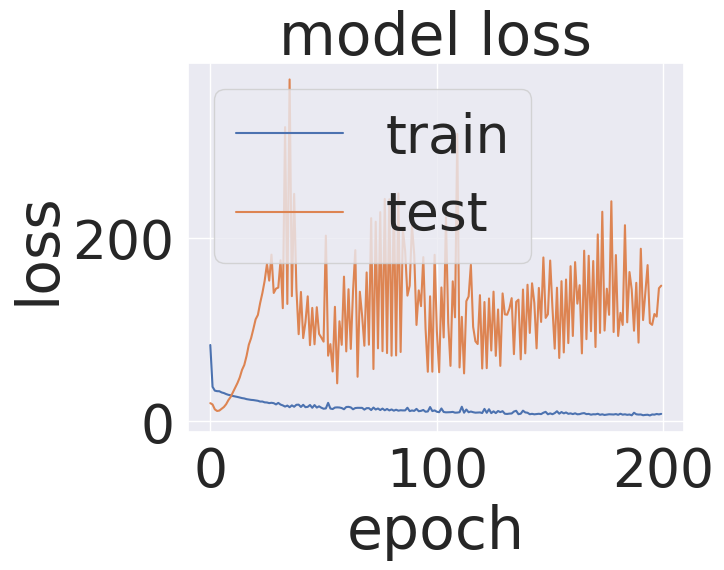

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Forecasting using test data
y_pred = model.predict(X_test)

1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 7ms/step


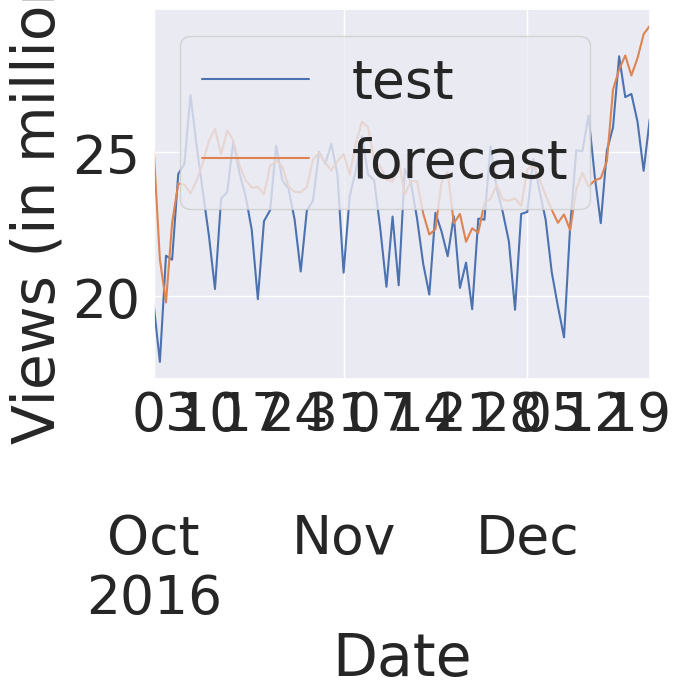

In [ ]:
fig,ax=plt.subplots()
pd.DataFrame({'Date':test.index[:y_test.shape[0]],'Views':y_test}).plot('Date',ax=ax)
pd.DataFrame({'Date':test.index[:y_pred.shape[0]],'Views':y_pred.flatten()}).plot('Date',ax=ax)
plt.legend(['test', 'forecast'], loc='upper left')
plt.ylabel('Views (in million)')
plt.show()

In [ ]:
print('RMSE:'+str(np.sqrt(np.mean(np.square(y_pred.flatten() - y_test)))))


RMSE:2.065835328026919


## 10. CNN1D


In [ ]:
n_features=1
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, n_features)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/200


 1/26 [>.............................] - ETA: 17s - loss: 329.5175

26/26 [==============================] - 1s 9ms/step - loss: 76.2493 - val_loss: 213.8478


Epoch 2/200


 1/26 [>.............................] - ETA: 0s - loss: 9.4002

26/26 [==============================] - 0s 3ms/step - loss: 20.1142 - val_loss: 138.6189


Epoch 3/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9970

26/26 [==============================] - ETA: 0s - loss: 20.9418

26/26 [==============================] - 0s 4ms/step - loss: 20.9418 - val_loss: 123.1701


Epoch 4/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4329

26/26 [==============================] - 0s 3ms/step - loss: 18.4517 - val_loss: 129.9290


Epoch 5/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4920

26/26 [==============================] - 0s 3ms/step - loss: 18.2040 - val_loss: 128.3116


Epoch 6/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4559

26/26 [==============================] - 0s 3ms/step - loss: 18.1332 - val_loss: 126.7777


Epoch 7/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4337

26/26 [==============================] - 0s 3ms/step - loss: 17.9861 - val_loss: 126.1174


Epoch 8/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4269

26/26 [==============================] - 0s 3ms/step - loss: 17.8253 - val_loss: 126.0441


Epoch 9/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4260

26/26 [==============================] - 0s 3ms/step - loss: 17.6820 - val_loss: 126.0780


Epoch 10/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4244

26/26 [==============================] - 0s 3ms/step - loss: 17.6019 - val_loss: 125.8353


Epoch 11/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4247

26/26 [==============================] - 0s 3ms/step - loss: 17.4646 - val_loss: 126.2723


Epoch 12/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4245

26/26 [==============================] - 0s 3ms/step - loss: 17.4042 - val_loss: 126.2819


Epoch 13/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4260

26/26 [==============================] - 0s 3ms/step - loss: 17.3486 - val_loss: 126.8944


Epoch 14/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4236

26/26 [==============================] - 0s 3ms/step - loss: 17.2473 - val_loss: 127.5103


Epoch 15/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4271

26/26 [==============================] - 0s 3ms/step - loss: 17.2250 - val_loss: 127.7928


Epoch 16/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4256

26/26 [==============================] - 0s 3ms/step - loss: 17.1455 - val_loss: 128.9053


Epoch 17/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4301

26/26 [==============================] - 0s 3ms/step - loss: 17.1510 - val_loss: 129.9709


Epoch 18/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4370

26/26 [==============================] - 0s 3ms/step - loss: 17.1732 - val_loss: 140.0247


Epoch 19/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6195

26/26 [==============================] - 0s 3ms/step - loss: 17.0656 - val_loss: 138.4066


Epoch 20/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6288

26/26 [==============================] - 0s 3ms/step - loss: 17.0509 - val_loss: 131.7922


Epoch 21/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4590

26/26 [==============================] - 0s 3ms/step - loss: 16.9073 - val_loss: 133.8618


Epoch 22/200


 1/26 [>.............................] - ETA: 0s - loss: 0.4933

26/26 [==============================] - 0s 3ms/step - loss: 16.9189 - val_loss: 141.9442


Epoch 23/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6814

26/26 [==============================] - 0s 3ms/step - loss: 16.8084 - val_loss: 142.7188


Epoch 24/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7057

26/26 [==============================] - 0s 3ms/step - loss: 16.7119 - val_loss: 144.1570


Epoch 25/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7674

26/26 [==============================] - 0s 3ms/step - loss: 16.6610 - val_loss: 143.3662


Epoch 26/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7672

26/26 [==============================] - 0s 3ms/step - loss: 16.5570 - val_loss: 141.7608


Epoch 27/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7308

26/26 [==============================] - 0s 3ms/step - loss: 16.5010 - val_loss: 143.4431


Epoch 28/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7682

26/26 [==============================] - 0s 3ms/step - loss: 16.5827 - val_loss: 137.9306


Epoch 29/200


 1/26 [>.............................] - ETA: 0s - loss: 0.5517

26/26 [==============================] - 0s 3ms/step - loss: 16.3027 - val_loss: 140.5966


Epoch 30/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6677

26/26 [==============================] - 0s 3ms/step - loss: 16.3280 - val_loss: 148.1855


Epoch 31/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8114

26/26 [==============================] - 0s 3ms/step - loss: 16.0328 - val_loss: 150.0040


Epoch 32/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0045

26/26 [==============================] - 0s 3ms/step - loss: 15.9718 - val_loss: 149.2486


Epoch 33/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9716

26/26 [==============================] - 0s 3ms/step - loss: 15.9504 - val_loss: 151.7993


Epoch 34/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0585

26/26 [==============================] - 0s 4ms/step - loss: 15.8699 - val_loss: 150.2629


Epoch 35/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0370

26/26 [==============================] - 0s 3ms/step - loss: 15.8542 - val_loss: 152.5136


Epoch 36/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1215

26/26 [==============================] - 0s 3ms/step - loss: 15.6576 - val_loss: 152.7696


Epoch 37/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0563

26/26 [==============================] - 0s 3ms/step - loss: 15.5786 - val_loss: 154.0314


Epoch 38/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2207

26/26 [==============================] - 0s 3ms/step - loss: 15.5529 - val_loss: 155.8224


Epoch 39/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2975

26/26 [==============================] - 0s 3ms/step - loss: 15.4326 - val_loss: 157.1272


Epoch 40/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2333

26/26 [==============================] - 0s 3ms/step - loss: 15.2668 - val_loss: 154.0306


Epoch 41/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0839

26/26 [==============================] - 0s 3ms/step - loss: 15.1365 - val_loss: 160.0800


Epoch 42/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3618

26/26 [==============================] - 0s 3ms/step - loss: 14.9650 - val_loss: 162.2111


Epoch 43/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4320

26/26 [==============================] - 0s 3ms/step - loss: 14.9780 - val_loss: 163.6217


Epoch 44/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5386

26/26 [==============================] - 0s 3ms/step - loss: 14.8531 - val_loss: 166.9164


Epoch 45/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7948

26/26 [==============================] - 0s 4ms/step - loss: 14.7767 - val_loss: 162.7136


Epoch 46/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4754

26/26 [==============================] - 0s 3ms/step - loss: 14.5230 - val_loss: 167.5732


Epoch 47/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6599

26/26 [==============================] - 0s 3ms/step - loss: 14.5275 - val_loss: 168.3417


Epoch 48/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6095

26/26 [==============================] - 0s 3ms/step - loss: 14.3048 - val_loss: 168.3005


Epoch 49/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6365

26/26 [==============================] - 0s 3ms/step - loss: 14.2443 - val_loss: 172.3050


Epoch 50/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7765

26/26 [==============================] - 0s 3ms/step - loss: 14.1572 - val_loss: 178.0031


Epoch 51/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6294

26/26 [==============================] - 0s 3ms/step - loss: 14.0254 - val_loss: 172.5282


Epoch 52/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7168

26/26 [==============================] - 0s 3ms/step - loss: 13.9264 - val_loss: 173.8880


Epoch 53/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5890

26/26 [==============================] - 0s 3ms/step - loss: 13.8486 - val_loss: 176.6845


Epoch 54/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9288

26/26 [==============================] - 0s 7ms/step - loss: 13.6993 - val_loss: 178.4574


Epoch 55/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9473

26/26 [==============================] - 0s 3ms/step - loss: 13.6144 - val_loss: 179.9598


Epoch 56/200


 1/26 [>.............................] - ETA: 0s - loss: 1.8889

26/26 [==============================] - 0s 3ms/step - loss: 13.7379 - val_loss: 183.7271


Epoch 57/200


 1/26 [>.............................] - ETA: 0s - loss: 1.8059

26/26 [==============================] - 0s 3ms/step - loss: 13.6200 - val_loss: 178.0288


Epoch 58/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4138

26/26 [==============================] - 0s 3ms/step - loss: 13.6164 - val_loss: 196.0693


Epoch 59/200


 1/26 [>.............................] - ETA: 0s - loss: 2.4839

26/26 [==============================] - 0s 3ms/step - loss: 13.4933 - val_loss: 187.8983


Epoch 60/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9253

26/26 [==============================] - 0s 3ms/step - loss: 13.5359 - val_loss: 191.7115


Epoch 61/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0431

26/26 [==============================] - 0s 3ms/step - loss: 13.2540 - val_loss: 187.6605


Epoch 62/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6616

26/26 [==============================] - 0s 3ms/step - loss: 13.1769 - val_loss: 193.4066


Epoch 63/200


 1/26 [>.............................] - ETA: 0s - loss: 2.2620

26/26 [==============================] - 0s 3ms/step - loss: 12.9757 - val_loss: 184.6067


Epoch 64/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6457

26/26 [==============================] - 0s 3ms/step - loss: 12.9043 - val_loss: 193.2572


Epoch 65/200


 1/26 [>.............................] - ETA: 0s - loss: 2.1449

26/26 [==============================] - 0s 3ms/step - loss: 12.7372 - val_loss: 184.8174


Epoch 66/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6869

26/26 [==============================] - 0s 3ms/step - loss: 12.7980 - val_loss: 190.8456


Epoch 67/200


 1/26 [>.............................] - ETA: 0s - loss: 2.0454

26/26 [==============================] - 0s 3ms/step - loss: 12.5753 - val_loss: 189.9131


Epoch 68/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5120

26/26 [==============================] - 0s 3ms/step - loss: 12.4176 - val_loss: 201.8974


Epoch 69/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9375

26/26 [==============================] - 0s 3ms/step - loss: 12.6728 - val_loss: 192.0471


Epoch 70/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5041

26/26 [==============================] - 0s 3ms/step - loss: 12.8525 - val_loss: 202.1617


Epoch 71/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9825

26/26 [==============================] - 0s 3ms/step - loss: 12.5015 - val_loss: 192.1848


Epoch 72/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5092

26/26 [==============================] - 0s 3ms/step - loss: 12.4300 - val_loss: 202.2557


Epoch 73/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6779

26/26 [==============================] - 0s 3ms/step - loss: 11.9343 - val_loss: 196.5437


Epoch 74/200


 1/26 [>.............................] - ETA: 0s - loss: 1.9346

26/26 [==============================] - 0s 3ms/step - loss: 12.4650 - val_loss: 203.0668


Epoch 75/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5477

26/26 [==============================] - 0s 3ms/step - loss: 11.8193 - val_loss: 196.1332


Epoch 76/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1633

26/26 [==============================] - 0s 3ms/step - loss: 11.8814 - val_loss: 213.8229


Epoch 77/200


 1/26 [>.............................] - ETA: 0s - loss: 2.1513

26/26 [==============================] - 0s 3ms/step - loss: 11.8835 - val_loss: 201.7815


Epoch 78/200


 1/26 [>.............................] - ETA: 0s - loss: 1.8302

26/26 [==============================] - 0s 4ms/step - loss: 11.9779 - val_loss: 206.3217


Epoch 79/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4412

26/26 [==============================] - 0s 3ms/step - loss: 11.5870 - val_loss: 197.1283


Epoch 80/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3828

26/26 [==============================] - 0s 3ms/step - loss: 11.7288 - val_loss: 217.8790


Epoch 81/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5820

26/26 [==============================] - 0s 3ms/step - loss: 11.5326 - val_loss: 202.5812


Epoch 82/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2975

26/26 [==============================] - 0s 3ms/step - loss: 11.4228 - val_loss: 217.8736


Epoch 83/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6797

26/26 [==============================] - 0s 3ms/step - loss: 11.3928 - val_loss: 203.1679


Epoch 84/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6792

26/26 [==============================] - 0s 3ms/step - loss: 11.9880 - val_loss: 211.6904


Epoch 85/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5942

26/26 [==============================] - 0s 3ms/step - loss: 11.6909 - val_loss: 196.8596


Epoch 86/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1072

26/26 [==============================] - 0s 3ms/step - loss: 11.4922 - val_loss: 202.2033


Epoch 87/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3804

26/26 [==============================] - 0s 3ms/step - loss: 11.3904 - val_loss: 201.1483


Epoch 88/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5762

26/26 [==============================] - 0s 3ms/step - loss: 11.5764 - val_loss: 216.1621


Epoch 89/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3150

26/26 [==============================] - 0s 3ms/step - loss: 11.4793 - val_loss: 203.0791


Epoch 90/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6877

26/26 [==============================] - 0s 3ms/step - loss: 11.9101 - val_loss: 218.3222


Epoch 91/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2008

26/26 [==============================] - 0s 3ms/step - loss: 11.1475 - val_loss: 203.9257


Epoch 92/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7083

26/26 [==============================] - 0s 3ms/step - loss: 10.6664 - val_loss: 218.4007


Epoch 93/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4797

26/26 [==============================] - 0s 3ms/step - loss: 10.8525 - val_loss: 216.3347


Epoch 94/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2046

26/26 [==============================] - 0s 3ms/step - loss: 10.8047 - val_loss: 222.6069


Epoch 95/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4150

26/26 [==============================] - 0s 3ms/step - loss: 10.7159 - val_loss: 211.9265


Epoch 96/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2275

26/26 [==============================] - 0s 3ms/step - loss: 10.6824 - val_loss: 213.9799


Epoch 97/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6071

26/26 [==============================] - 0s 3ms/step - loss: 10.3448 - val_loss: 208.5393


Epoch 98/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4852

26/26 [==============================] - 0s 3ms/step - loss: 10.6898 - val_loss: 211.2469


Epoch 99/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5415

26/26 [==============================] - 0s 3ms/step - loss: 10.5206 - val_loss: 207.2516


Epoch 100/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4675

26/26 [==============================] - 0s 3ms/step - loss: 10.8694 - val_loss: 225.5347


Epoch 101/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2459

26/26 [==============================] - 0s 3ms/step - loss: 10.6648 - val_loss: 208.8783


Epoch 102/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3055

26/26 [==============================] - 0s 3ms/step - loss: 10.9621 - val_loss: 218.9185


Epoch 103/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1041

26/26 [==============================] - 0s 3ms/step - loss: 10.4791 - val_loss: 212.0390


Epoch 104/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3536

26/26 [==============================] - 0s 3ms/step - loss: 10.9232 - val_loss: 209.5593


Epoch 105/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8993

26/26 [==============================] - 0s 3ms/step - loss: 10.2649 - val_loss: 209.8119


Epoch 106/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1418

26/26 [==============================] - 0s 3ms/step - loss: 10.4813 - val_loss: 225.2626


Epoch 107/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0477

26/26 [==============================] - 0s 3ms/step - loss: 9.9374 - val_loss: 206.8810


Epoch 108/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1230

26/26 [==============================] - 0s 3ms/step - loss: 10.1013 - val_loss: 222.3611


Epoch 109/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2765

26/26 [==============================] - 0s 3ms/step - loss: 9.8005 - val_loss: 209.6164


Epoch 110/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2832

26/26 [==============================] - 0s 3ms/step - loss: 9.9840 - val_loss: 231.5151


Epoch 111/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1694

26/26 [==============================] - 0s 3ms/step - loss: 9.7716 - val_loss: 211.4578


Epoch 112/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1363

26/26 [==============================] - 0s 3ms/step - loss: 9.9221 - val_loss: 228.3666


Epoch 113/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3924

26/26 [==============================] - 0s 3ms/step - loss: 9.7262 - val_loss: 210.1479


Epoch 114/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1981

26/26 [==============================] - 0s 3ms/step - loss: 9.8393 - val_loss: 226.3135


Epoch 115/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4637

26/26 [==============================] - 0s 3ms/step - loss: 10.0572 - val_loss: 211.9695


Epoch 116/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0906

26/26 [==============================] - 0s 3ms/step - loss: 10.2639 - val_loss: 237.9689


Epoch 117/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2908

26/26 [==============================] - 0s 3ms/step - loss: 10.3737 - val_loss: 221.1978


Epoch 118/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1938

26/26 [==============================] - 0s 3ms/step - loss: 10.6081 - val_loss: 217.9611


Epoch 119/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7008

26/26 [==============================] - 0s 3ms/step - loss: 9.8528 - val_loss: 218.2705


Epoch 120/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2454

26/26 [==============================] - 0s 3ms/step - loss: 10.1628 - val_loss: 218.3339


Epoch 121/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0539

26/26 [==============================] - 0s 3ms/step - loss: 9.2838 - val_loss: 215.5848


Epoch 122/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2264

26/26 [==============================] - 0s 3ms/step - loss: 9.7724 - val_loss: 229.9498


Epoch 123/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0302

26/26 [==============================] - 0s 3ms/step - loss: 9.6146 - val_loss: 218.0949


Epoch 124/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0056

26/26 [==============================] - 0s 3ms/step - loss: 9.8697 - val_loss: 225.6090


Epoch 125/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1891

26/26 [==============================] - 0s 3ms/step - loss: 9.7894 - val_loss: 210.8675


Epoch 126/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9891

26/26 [==============================] - 0s 3ms/step - loss: 9.6225 - val_loss: 218.0096


Epoch 127/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2251

26/26 [==============================] - 0s 3ms/step - loss: 9.5313 - val_loss: 216.3056


Epoch 128/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1513

26/26 [==============================] - 0s 3ms/step - loss: 9.6244 - val_loss: 242.2638


Epoch 129/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4136

26/26 [==============================] - 0s 3ms/step - loss: 9.3962 - val_loss: 214.4791


Epoch 130/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0628

26/26 [==============================] - 0s 4ms/step - loss: 9.3736 - val_loss: 232.7336


Epoch 131/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2889

26/26 [==============================] - 0s 3ms/step - loss: 9.4031 - val_loss: 214.4440


Epoch 132/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0833

26/26 [==============================] - 0s 3ms/step - loss: 9.3646 - val_loss: 229.1587


Epoch 133/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5880

26/26 [==============================] - 0s 3ms/step - loss: 9.4957 - val_loss: 219.5475


Epoch 134/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1111

26/26 [==============================] - 0s 3ms/step - loss: 9.3616 - val_loss: 234.5580


Epoch 135/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2301

26/26 [==============================] - 0s 3ms/step - loss: 9.1152 - val_loss: 220.0873


Epoch 136/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1817

26/26 [==============================] - 0s 3ms/step - loss: 9.3673 - val_loss: 230.3538


Epoch 137/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3615

26/26 [==============================] - 0s 3ms/step - loss: 9.0446 - val_loss: 217.9246


Epoch 138/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3635

26/26 [==============================] - 0s 4ms/step - loss: 9.4861 - val_loss: 216.7849


Epoch 139/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0812

26/26 [==============================] - 0s 3ms/step - loss: 9.2014 - val_loss: 227.9669


Epoch 140/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7140

26/26 [==============================] - 0s 3ms/step - loss: 9.7883 - val_loss: 232.9342


Epoch 141/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9079

26/26 [==============================] - 0s 3ms/step - loss: 9.0236 - val_loss: 222.6021


Epoch 142/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5004

26/26 [==============================] - 0s 4ms/step - loss: 9.8476 - val_loss: 222.3230


Epoch 143/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8533

26/26 [==============================] - 0s 3ms/step - loss: 9.2806 - val_loss: 224.3033


Epoch 144/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3207

26/26 [==============================] - 0s 3ms/step - loss: 9.6739 - val_loss: 218.5007


Epoch 145/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9750

26/26 [==============================] - 0s 3ms/step - loss: 9.2048 - val_loss: 215.9551


Epoch 146/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0903

26/26 [==============================] - 0s 3ms/step - loss: 9.1867 - val_loss: 220.1111


Epoch 147/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3068

26/26 [==============================] - 0s 4ms/step - loss: 8.8311 - val_loss: 216.6262


Epoch 148/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0614

26/26 [==============================] - 0s 3ms/step - loss: 8.9816 - val_loss: 234.1806


Epoch 149/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2661

26/26 [==============================] - 0s 3ms/step - loss: 8.9046 - val_loss: 227.1453


Epoch 150/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4587

26/26 [==============================] - 0s 3ms/step - loss: 9.5764 - val_loss: 220.8407


Epoch 151/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8693

26/26 [==============================] - 0s 3ms/step - loss: 8.9768 - val_loss: 220.7494


Epoch 152/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2001

26/26 [==============================] - 0s 4ms/step - loss: 9.2378 - val_loss: 236.5657


Epoch 153/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9332

26/26 [==============================] - 0s 3ms/step - loss: 8.7803 - val_loss: 220.9738


Epoch 154/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0298

26/26 [==============================] - 0s 3ms/step - loss: 9.0241 - val_loss: 234.3747


Epoch 155/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1925

26/26 [==============================] - 0s 3ms/step - loss: 9.0330 - val_loss: 220.8873


Epoch 156/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9980

26/26 [==============================] - 0s 3ms/step - loss: 9.0370 - val_loss: 228.1502


Epoch 157/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2874

26/26 [==============================] - 0s 3ms/step - loss: 9.2693 - val_loss: 215.9792


Epoch 158/200


 1/26 [>.............................] - ETA: 0s - loss: 0.9338

26/26 [==============================] - 0s 3ms/step - loss: 8.9398 - val_loss: 226.5982


Epoch 159/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4898

26/26 [==============================] - 0s 3ms/step - loss: 8.7703 - val_loss: 216.8029


Epoch 160/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1280

26/26 [==============================] - 0s 3ms/step - loss: 8.7283 - val_loss: 238.6519


Epoch 161/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3932

26/26 [==============================] - 0s 3ms/step - loss: 8.5440 - val_loss: 224.4986


Epoch 162/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1829

26/26 [==============================] - 0s 3ms/step - loss: 8.6816 - val_loss: 229.2738


Epoch 163/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2663

26/26 [==============================] - 0s 3ms/step - loss: 8.6537 - val_loss: 225.0312


Epoch 164/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2287

26/26 [==============================] - 0s 3ms/step - loss: 8.8500 - val_loss: 240.6814


Epoch 165/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3058

26/26 [==============================] - 0s 3ms/step - loss: 8.7399 - val_loss: 218.8339


Epoch 166/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1315

26/26 [==============================] - 0s 3ms/step - loss: 8.9325 - val_loss: 230.3202


Epoch 167/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1442

26/26 [==============================] - 0s 3ms/step - loss: 8.8192 - val_loss: 221.1365


Epoch 168/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0658

26/26 [==============================] - 0s 3ms/step - loss: 8.9151 - val_loss: 225.2547


Epoch 169/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1752

26/26 [==============================] - 0s 3ms/step - loss: 8.9036 - val_loss: 217.8448


Epoch 170/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1247

26/26 [==============================] - 0s 3ms/step - loss: 8.8239 - val_loss: 229.4308


Epoch 171/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1987

26/26 [==============================] - 0s 3ms/step - loss: 8.3201 - val_loss: 215.4538


Epoch 172/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2323

26/26 [==============================] - 0s 3ms/step - loss: 8.4486 - val_loss: 222.5018


Epoch 173/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3881

26/26 [==============================] - 0s 3ms/step - loss: 8.2505 - val_loss: 220.3130


Epoch 174/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3254

26/26 [==============================] - 0s 3ms/step - loss: 8.3811 - val_loss: 220.8626


Epoch 175/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2729

26/26 [==============================] - 0s 3ms/step - loss: 8.1059 - val_loss: 220.6383


Epoch 176/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4697

26/26 [==============================] - 0s 3ms/step - loss: 8.5128 - val_loss: 222.7326


Epoch 177/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1959

26/26 [==============================] - 0s 3ms/step - loss: 8.5834 - val_loss: 224.0220


Epoch 178/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1495

26/26 [==============================] - 0s 3ms/step - loss: 8.7020 - val_loss: 217.9421


Epoch 179/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1811

26/26 [==============================] - 0s 3ms/step - loss: 8.2945 - val_loss: 216.0543


Epoch 180/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2369

26/26 [==============================] - 0s 3ms/step - loss: 8.5237 - val_loss: 213.5384


Epoch 181/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1221

26/26 [==============================] - 0s 3ms/step - loss: 8.3288 - val_loss: 220.8868


Epoch 182/200


 1/26 [>.............................] - ETA: 0s - loss: 1.5888

26/26 [==============================] - 0s 3ms/step - loss: 8.7718 - val_loss: 235.4679


Epoch 183/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0797

26/26 [==============================] - 0s 3ms/step - loss: 8.2449 - val_loss: 220.0014


Epoch 184/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4091

26/26 [==============================] - 0s 3ms/step - loss: 8.6583 - val_loss: 226.0918


Epoch 185/200


 1/26 [>.............................] - ETA: 0s - loss: 1.0376

26/26 [==============================] - 0s 3ms/step - loss: 7.9888 - val_loss: 222.0117


Epoch 186/200


 1/26 [>.............................] - ETA: 0s - loss: 1.2129

26/26 [==============================] - 0s 3ms/step - loss: 8.2831 - val_loss: 228.3119


Epoch 187/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3525

26/26 [==============================] - 0s 3ms/step - loss: 8.2310 - val_loss: 217.2671


Epoch 188/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1564

26/26 [==============================] - 0s 3ms/step - loss: 8.5139 - val_loss: 226.4935


Epoch 189/200


 1/26 [>.............................] - ETA: 0s - loss: 1.3542

26/26 [==============================] - 0s 3ms/step - loss: 8.7918 - val_loss: 217.5756


Epoch 190/200


 1/26 [>.............................] - ETA: 0s - loss: 1.1581

26/26 [==============================] - 0s 3ms/step - loss: 8.9107 - val_loss: 234.3686


Epoch 191/200


 1/26 [>.............................] - ETA: 0s - loss: 1.4169

26/26 [==============================] - 0s 3ms/step - loss: 9.2251 - val_loss: 211.9193


Epoch 192/200


 1/26 [>.............................] - ETA: 0s - loss: 0.7753

26/26 [==============================] - 0s 3ms/step - loss: 8.6635 - val_loss: 224.8012


Epoch 193/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7058

26/26 [==============================] - 0s 3ms/step - loss: 8.7058 - val_loss: 208.7571


Epoch 194/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8345

26/26 [==============================] - 0s 3ms/step - loss: 8.3035 - val_loss: 226.5976


Epoch 195/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6790

26/26 [==============================] - 0s 3ms/step - loss: 8.4162 - val_loss: 217.5773


Epoch 196/200


 1/26 [>.............................] - ETA: 0s - loss: 0.8301

26/26 [==============================] - 0s 3ms/step - loss: 8.1971 - val_loss: 227.6186


Epoch 197/200


 1/26 [>.............................] - ETA: 0s - loss: 1.7481

26/26 [==============================] - 0s 3ms/step - loss: 8.6321 - val_loss: 219.7294


Epoch 198/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6916

26/26 [==============================] - 0s 3ms/step - loss: 8.2556 - val_loss: 223.9220


Epoch 199/200


 1/26 [>.............................] - ETA: 0s - loss: 1.6439

26/26 [==============================] - 0s 3ms/step - loss: 9.0199 - val_loss: 212.3161


Epoch 200/200


 1/26 [>.............................] - ETA: 0s - loss: 0.6942

26/26 [==============================] - 0s 3ms/step - loss: 8.4312 - val_loss: 223.2111


In [ ]:
#forecasting
y_pred = model.predict(X_test)

1/3 [=========>....................] - ETA: 0s

3/3 [==============================] - 0s 2ms/step


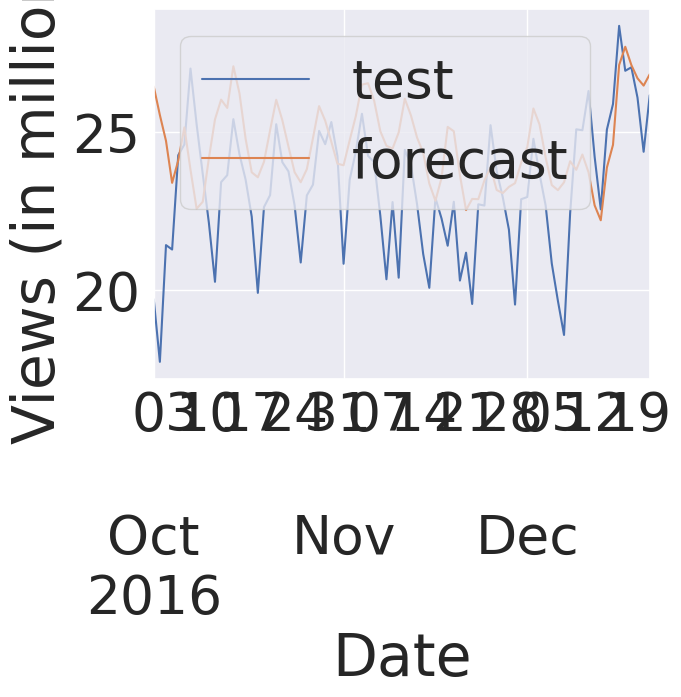

In [ ]:
fig,ax=plt.subplots()
pd.DataFrame({'Date':test.index[:y_test.shape[0]],'Views':y_test}).plot('Date',ax=ax)
pd.DataFrame({'Date':test.index[:y_pred.shape[0]],'Views':y_pred.flatten()}).plot('Date',ax=ax)
plt.legend(['test', 'forecast'], loc='upper left')
plt.ylabel('Views (in million)')
plt.show()

In [ ]:
print('RMSE:'+str(np.sqrt(np.mean(np.square(y_pred.flatten() - y_test)))))


RMSE:2.3879847782306727


## Conclusion

LSTMs outperforms all approaches.